The most recent version of this notebook is at https://github.com/nickjeffrey/cisis23igpl

# Comments and questions for discussion


- What are "test loss" and "test accuracy" for the DL models, and how do they compare (if at all) to TP, TN, FP, FN in traditional classifiers?
- What metric should be used to compare DL models to traditional classification models?  We don't really have TP,TN,FP,FN on DL models.
- DL models typically need larger datasets than traditional classifiers like SVM, KNN, MLP, RF, etc.  Since we are only using 1% of the original dataset (which was fine for traditional classifiers), is the accuracy suffering in the DL models because we do not have enough of the original dataset?
[link text](https:// [link text](https://))

Try adding the following to Sequential

ReLU (Rectified Linear Unit):
tf.nn.relu(x)
Sigmoid:
tf.nn.sigmoid(x)
Tanh (Hyperbolic Tangent):
tf.nn.tanh(x)
Softmax:
tf.nn.softmax(x)
Softplus:
tf.nn.softplus(x)
Softsign:
tf.nn.softsign(x)
ELU (Exponential Linear Unit):
tf.nn.elu(x)
SELU (Scaled Exponential Linear Unit):
tf.nn.selu(x)
Swish:
tf.nn.swish(x)
ReLU6 (ReLU with upper limit of 6):
tf.nn.relu6(x)
Leaky ReLU:
tf.nn.leaky_relu(x)
PReLU (Parametric ReLU):
tf.keras.layers.PReLU(alpha_initializer='zeros')
Thresholded ReLU:
tf.keras.layers.ThresholdedReLU(theta=1.0)


Optimization algorithms: adam,

Try changing activation functions and optimization algorithms in the hyperparameter optimizations


MLP
FNN feed Forward Neural Network, fully connected neural network (includes sequential but not LSTM)

Just focus on MLP and Sequential




with FNN:
1. change activation functions -> calculate metrics for each
2. change optimization algorithms in NN
3. Regularization Techniques
4. Learning Rate
5. Number of hidden layers
6. Number of neurons in each layer
7. Batch Normalization


In [1]:
## WARNING - breaking change with pandas 3.0 for copy on write

# https://towardsdatascience.com/deep-dive-into-pandas-copy-on-write-mode-part-iii-c024eaa16ed4

# The change described in the above URL is causing this error message to appear:
# ValueError: cannot set WRITEABLE flag to True of this array

# The error only appears if we run: !pip install scikeras
# We run the above command to get the KerasClassifier package so we can do hyperparameter optimization for
# Sequential,SimpleRNN,GRU models, but a side-effect is that pandas also gets upgraded to 3.0,
# which introduces a breaking change as described in the URL above.



Table showing accuracy with 10 epochs, notebook runtime 4 minutes

10 epochs  | Training Accuracy | Training Loss | Test Accuracy | Test Loss
-----------|-------------------|---------------|---------------|-----------
Sequential |0.8427             | 0.4011        |0.8952         |0.2912     
SimpleRNN  |0.8176             | 0.3603        |0.5796         |0.7341     
GRU        |0.8207             | 0.3666        |0.7491         |0.6363     



Table showing accuracy with 100 epochs, notebook runtime 11 minutes

100 epochs | Training Accuracy | Training Loss | Test Accuracy | Test Loss
-----------|-------------------|---------------|---------------|-----------
Sequential |0.8452             | 0.2849        |0.9092         |0.2935     
SimpleRNN  |0.7995             | 1.3725        |0.6409         |1.5846     
GRU        |0.7927             | 1.5171        |0.4384         |3.6082


# Definitions:

In the context of neural network models, the test loss and test accuracy are performance metrics used to evaluate the model's performance on unseen data, specifically the test set.

Test Loss:

- The test loss measures how well the model is performing on the test set. It represents the average loss (e.g., cross-entropy loss) incurred by the model when making predictions on the test data.
- Lower test loss indicates better performance, as it means that the model's predictions are closer to the actual labels.
However, it's important to consider the scale and nature of the loss function used. For instance, a test loss of 0.1 might be good for one problem but poor for another, depending on the context.


Test Accuracy:

- The test accuracy measures the proportion of correctly classified samples in the test set.
It is calculated by dividing the number of correctly classified samples by the total number of samples in the test set.
- Higher test accuracy indicates better performance, as it means that the model is making more correct predictions.
However, accuracy alone might not provide a complete picture, especially if the classes are imbalanced or if different types of errors have different costs.


In summary, test loss and test accuracy are two important metrics used to assess the performance of a SimpleRNN model on unseen data. Lower test loss and higher test accuracy generally indicate better performance, but it's essential to consider other factors such as the nature of the problem, class imbalance, and potential costs associated with different types of errors.

# Description of Experiment

This jupyter notebook builds on previous works at https://github.com/nickjeffrey/ensemble_learning

This notebook explores the use of Deep Learning classifiers, which are then fed to an Ensemble Learning model to see if the accuracy can be improved.

# Import Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing   import LabelEncoder
from collections import Counter

# Miscellaneous packages
import time                                           #for calculating elapsed time for training tasks
import os                                             #for checking if file exists
import socket                                         #for getting FQDN of local machine
import math                                           #square root function
import sys


# Packages from scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV       #for hyperparameter optimization
from sklearn.model_selection import cross_val_score    #for cross fold validation
from sklearn.metrics         import make_scorer        #used by GridSearchCV
from sklearn.metrics         import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LogisticRegression
from sklearn.naive_bayes     import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm             import SVC
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.neural_network  import MLPClassifier      #neural network classifier
from sklearn.ensemble        import BaggingClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier, GradientBoostingClassifier   #Packages for Ensemble Learning

# packages for balancing classes
from imblearn.under_sampling import RandomUnderSampler  #may need to install with: conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling  import SMOTE               #may need to install with: conda install -c conda-forge imbalanced-learn

# Deep Learning classifiers

import tensorflow as tf
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Dense, Dropout, LSTM, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses     import binary_crossentropy
from tensorflow.keras.metrics    import Accuracy






In [3]:
# # KerasClassifier was moved to scikeras in version 2.13.0, so you will need to install the package, but this will break other things!

# import importlib.util

# # Check if scikeras is installed
# if importlib.util.find_spec("scikeras") is None:
#   print("scikeras is not installed, attempting installation now.")
#   !pip install scikeras
# else:
#   print("scikeras is already installed.")


# # after confirming the scikeras package was installed, you can now import KerasClassifier,
# #  which is used for SimpleRNN hyperparameter optimization
# from scikeras.wrappers import KerasClassifier, KerasRegressor

In [4]:
# WARNING: do not use tensorflow.keras.wrappers.scikit_learn
# DEPRECATED. Use [Sci-Keras](https://github.com/adriangb/scikeras) instead.
# See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


# import pkg_resources

# # Get a list of installed packages and their versions
# installed_packages = {package.key: package.version for package in pkg_resources.working_set}

# # Uninstall TensorFlow if installed version is greater than 2.12.0
# if 'tensorflow' in installed_packages and installed_packages['tensorflow'] > '2.12.0':
#   pip.main(['uninstall', '-y', 'tensorflow'])
#   print("TensorFlow uninstalled successfully")
# else:
#   print("Did not find a version of TensorFlow greater than 2.12.0")



# # Check if TensorFlow is installed and its version is greater than 2.12.0
# if 'tensorflow' in installed_packages and installed_packages['tensorflow'] == '2.12.0':
#   print("TensorFlow 2.12.0 is already installed")
# else:
#   print("Installing TensorFlow 2.12.0")
#   pip.main(['install', 'tensorflow==2.12.0'])



# # At this point, tensorflow 2.12.0 is installed, so import the package we want
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# # Print the installed version of KerasClassifier
# #print("Installed version of KerasClassifier:", KerasClassifier.__version__)
# KerasClassifier

# #!pip uninstall -y tensorflow
# #!pip install tensorflow==2.12.0

# Define functions

In [5]:
# function to show missing values in dataset

def get_type_missing(df):
    df_types = pd.DataFrame()
    df_types['data_type'] = df.dtypes
    df_types['missing_values'] = df.isnull().sum()
    return df_types.sort_values(by='missing_values', ascending=False)

In [6]:
# function to create a confusion matrix

def visualize_confusion_matrix(y_test, y_pred):
    #
    ## Calculate accuracy
    #accuracy = accuracy_score(y_test, y_pred)
    #print("Accuracy:", accuracy)
    #
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    #
    # visualize confusion matrix with more detailed labels
    # https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
    #
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(3.5, 2.0))  #default figsize is 6.4" wide x 4.8" tall, shrink to 3.5" wide 2.0" tall
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

    # use the .ravel function to pull out TN,TP,FN,TP
    # https://analytics4all.org/2020/05/07/python-confusion-matrix/
    TN, FP, FN, TP = cm.ravel()

    # calculate different metrics
    Accuracy = (( TP + TN) / ( TP + TN + FP + FN))
    Sensitivity = TP / (TP + FN)
    Specificity = TN / (TN + FP)
    GeometricMean = math.sqrt(Sensitivity * Specificity)

    # Precision is the ratio of true positive predictions to the total number of positive predictions made by the model
    # average=binary for  binary classification models, average=micro for multiclass classification, average=weighted to match classification_report
    Precision = precision_score(y_test, y_pred, average='weighted')

    # Recall is the ratio of true positive predictions to the total number of actual positive instances in the data.
    # average=binary for  binary classification models, average=micro for multiclass classification, average=weighted to match classification_report
    Recall = recall_score(y_test, y_pred, average='weighted')

    # F1-score is a metric that considers both precision and recall, providing a balance between the two.
    # average=binary for  binary classification models, average=micro for multiclass classification, average=weighted to match classification_report
    F1 = f1_score(y_test, y_pred, average='weighted')

    # add details below graph to help interpret results
    print('\n\n')
    print('Confusion matrix\n\n', cm)
    print('\nTrue Negatives  (TN) = ', TN)
    print('False Positives (FP) = ', FP)
    print('False Negatives (FN) = ', FN)
    print('True Positives  (TP) = ', TP)
    print ('\n')
    print ("Accuracy:       ", Accuracy)
    print ("Sensitivity:    ", Sensitivity)
    print ("Specificity:    ", Specificity)
    print ("Geometric Mean: ", GeometricMean)
    print ('\n')
    print ("Precision:       ", Precision)
    print ("Recall:          ", Recall)
    print ("f1-score:        ", F1)

    print('\n------------------------------------------------\n')
    # We want TN and TP to be approximately equal, because this indicates the dataset is well balanced.
    # If TN and TP are very different, it indicates imbalanced data, which can lead to low accuracy due to overfitting
    #if (TN/TP*100 < 40 or TN/TP*100 > 60):   #we want TN and TP to be approximately 50%, if the values are below 40% or over 60%, generate a warning
    #    print("WARNING: the confusion matrix shows that TN and TP are very imbalanced, may lead to low accuracy!")
    #
    return cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1





In [7]:
# function to report on model accuracy (TP, FP, FN, FP), precision, recall, f1-score
# this function does not provide anything additional to the results from the previous function

def model_classification_report(cm, y_test, y_pred):
    report = classification_report(y_test, y_pred, digits=4)
    print('\n')
    print("Classification Report: \n", report)
    print('\n\n\n')



In [8]:
# function to show elapsed time for running notebook

# start a timer so we can calculate the total runtime of this notebook
notebook_start_time = time.time()  #seconds since epoch

def show_elapsed_time():
    #
    # Get the current time as a struct_time object
    current_time_struct = time.localtime()

    # Format the struct_time as a string (yyyy-mm-dd HH:MM:SS format)
    current_time_str = time.strftime("%Y-%m-%d %H:%M:%S", current_time_struct)

    # Display the current time in HH:MM:SS format
    print("Current Time:", current_time_str)

    # show a running total of elapsed time for the entire notebook
    notebook_end_time = time.time()  #seconds since epoch
    print(f"The entire notebook runtime so far is {(notebook_end_time-notebook_start_time)/60:.0f} minutes")

show_elapsed_time()

Current Time: 2024-05-10 14:13:04
The entire notebook runtime so far is 0 minutes


In [9]:
# create a function to plot Training Loss and Validation Loss for Neural Network classifiers

def plot_loss_history(train_loss_history_unoptimized, train_loss_history_optimized, val_loss_history_unoptimized, val_loss_history_optimized, epoch_count):
    # sanity check to confirm the required values have already been collected
    if len(train_loss_history_unoptimized) == 0: print("ERROR: cannot find train_loss_history_unoptimized, using all zeros") ; train_loss_history_unoptimized = [0,0,0,0,0,0,0,0,0,0]
    if len(train_loss_history_optimized)   == 0: print("ERROR: cannot find train_loss_history_optimized, using all zeros")   ; train_loss_history_optimized   = [0,0,0,0,0,0,0,0,0,0]
    if len(val_loss_history_unoptimized)   == 0: print("ERROR: cannot find val_loss_history_unoptimized, using all zeros")   ; val_loss_history_unoptimized   = [0,0,0,0,0,0,0,0,0,0]
    if len(val_loss_history_optimized)     == 0: print("ERROR: cannot find val_loss_history_unoptimized, using all zeros")   ; val_loss_history_optimized     = [0,0,0,0,0,0,0,0,0,0]
    if len(train_loss_history_unoptimized) == 0 or len(train_loss_history_optimized) == 0 or len(val_loss_history_unoptimized) == 0 or len(val_loss_history_optimized) == 0:
        print("ERROR: cannot find loss history, using all zeros")
        raise ValueError ("ERROR: Cannot find loss history, please investigate!")
    #
    # sanity check to confirm the same number of epochs were used before and after hyperparameter optimization
    if len(train_loss_history_unoptimized) != len(train_loss_history_optimized) or len(val_loss_history_unoptimized) != len(val_loss_history_optimized):
        raise ValueError ("ERROR: different number of epochs used before and after hyperparameter optimziation")

    # Create two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # Create two subplots side by side

    # Plot for loss before optimization
    axs[0].plot(train_loss_history_unoptimized, label='Train Loss before optimizing', color='blue', linestyle='--')
    axs[0].plot(val_loss_history_unoptimized, label='Validation Loss before optimizing', color='red', linestyle='--')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].set_title('Train / Val Loss before optimization')
    axs[0].legend()
    axs[0].grid(True)

    # Plot for loss after optimization
    axs[1].plot(train_loss_history_optimized, label='Train Loss after optimizing', color='blue', linestyle='-')
    axs[1].plot(val_loss_history_optimized, label='Validation Loss after optimizing', color='red', linestyle='-')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    axs[1].set_title('Train / Val Loss after optimization')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

    # the lines should be very close to converging by the final epoch
    # since list indexes start at 0 instead of 1, use epoch_count-1 as the index for the last value
    # maximum acceptable divergence
    divergence_threshold = 0.01
    divergence_unoptimized = abs(train_loss_history_unoptimized[epoch_count-1] - val_loss_history_unoptimized[epoch_count-1])
    divergence_optimized   = abs(train_loss_history_optimized[epoch_count-1]   - val_loss_history_optimized[epoch_count-1])
    if divergence_optimized > divergence_threshold:
        print(f"WARNING, after optimization, loss divergence is {divergence_optimized}, which greater than threshold of {divergence_threshold}, please continue tuning this model.")
    else:
        print(f"After optimization, loss divergence is {divergence_optimized:.3f}, which is <= threshold of {divergence_threshold}, this model has acceptable loss.")

# Example usage:
#epoch_count = 10
#train_loss_history_unoptimized = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0.5]
#train_loss_history_optimized = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0.4]
#val_loss_history_unoptimized = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0.5]
#val_loss_history_optimized = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0.4]
#plot_loss_history(train_loss_history_unoptimized, train_loss_history_optimized, val_loss_history_unoptimized, val_loss_history_optimized, epoch_count)



In [10]:
# create a function to plot Training Accuracy and Validation Accuracy for Neural Network classifiers

def plot_accuracy_history(train_accuracy_history_unoptimized, train_accuracy_history_optimized, val_accuracy_history_unoptimized, val_accuracy_history_optimized, epoch_count):
    # sanity check to confirm the required values have already been collected
    if len(train_accuracy_history_unoptimized) == 0 or len(train_accuracy_history_optimized) == 0 or len(val_accuracy_history_unoptimized) == 0 or len(val_accuracy_history_optimized) == 0:
        print("ERROR: cannot find accuracy history")
        raise ValueError ("ERROR: Cannot find accuracy history, please investigate!")
    # sanity check to confirm the same number of epochs were used before and after hyperparameter optimization
    if len(train_accuracy_history_unoptimized) != len(train_accuracy_history_optimized) or len(val_accuracy_history_unoptimized) != len(val_accuracy_history_optimized):
        raise ValueError ("ERROR: different number of epochs used before and after hyperparameter optimziation")


    # Create two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # Create two subplots side by side

    # Plot for accuracy before optimization
    axs[0].plot(train_accuracy_history_unoptimized, label='Train Accuracy before optimizing',      color='blue', linestyle='--')
    axs[0].plot(val_accuracy_history_unoptimized,   label='Validation Accuracy before optimizing', color='red',  linestyle='--')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_title('Train / Val Accuracy before optimization')
    axs[0].legend()
    axs[0].grid(True)

    # Plot for accuracy after optimization
    axs[1].plot(train_accuracy_history_optimized, label='Train Accuracy after optimizing',      color='blue', linestyle='-')
    axs[1].plot(val_accuracy_history_optimized,   label='Validation Accuracy after optimizing', color='red',  linestyle='-')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_title('Train / Val Accuracy after optimization')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

    # the lines should be very close to converging by the final epoch
    # since list indexes start at 0 instead of 1, use epoch_count-1 as the index for the last value
    # maximum acceptable divergence
    divergence_threshold = 0.01
    divergence_unoptimized = abs(train_accuracy_history_unoptimized[epoch_count-1] - val_accuracy_history_unoptimized[epoch_count-1])
    divergence_optimized   = abs(train_accuracy_history_optimized[epoch_count-1]   - val_accuracy_history_optimized[epoch_count-1])
    if divergence_optimized > divergence_threshold:
        print(f"WARNING, after optimization, accuracy divergence is {divergence_optimized}, which greater than threshold of {divergence_threshold}, please continue tuning this model.")
    else:
        print(f"After optimization, accuracy divergence is {divergence_optimized:.3f}, which is <= threshold of {divergence_threshold}, this model has acceptable accuracy.")

# Example usage:
#epoch_count = 10
#train_accuracy_history_unoptimized = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0.5]
#train_accuracy_history_optimized = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0.4]
#val_accuracy_history_unoptimized = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0.5]
#val_accuracy_history_optimized = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0.4]
#plot_accuracy_history(train_accuracy_history_unoptimized, train_accuracy_history_optimized, val_accuracy_history_unoptimized, val_accuracy_history_optimized, epoch_count)



# Initialize variables


In [11]:
# initialize variables to avoid undef errors

accuracy_lr_unoptimized               = 0
accuracy_lr_optimized                 = 0
accuracy_nb_unoptimized               = 0
accuracy_nb_optimized                 = 0
accuracy_knn_unoptimized              = 0
accuracy_knn_optimized                = 0
accuracy_svm_unoptimized              = 0
accuracy_svm_optimized                = 0
accuracy_dt_unoptimized               = 0
accuracy_dt_optimized                 = 0
accuracy_rf_unoptimized               = 0
accuracy_rf_optimized                 = 0
accuracy_gb_unoptimized               = 0
accuracy_gb_optimized                 = 0
accuracy_mlp_unoptimized              = 0
accuracy_mlp_optimized                = 0
accuracy_fnn_unoptimized              = 0
accuracy_fnn_optimized                = 0
accuracy_cnn_unoptimized              = 0
accuracy_cnn_optimized                = 0
accuracy_rnn_unoptimized              = 0
accuracy_rnn_optimized                = 0
accuracy_lstm_unoptimized             = 0
accuracy_lstm_optimized               = 0
accuracy_gru_unoptimized              = 0
accuracy_gru_optimized                = 0



test_accuracy_sequential_unoptimized       = 0
test_loss_sequential_unoptimized           = 0
train_accuracy_sequential_unoptimized      = 0
train_loss_sequential_unoptimized          = 0
test_accuracy_sequential_optimized         = 0
test_loss_sequential_optimized             = 0
train_accuracy_sequential_optimized        = 0
train_loss_sequential_optimized            = 0
val_accuracy_sequential_unoptimized        = 0
val_loss_sequential_unoptimized            = 0
val_accuracy_sequential_optimized          = 0
val_loss_sequential_optimized              = 0

test_accuracy_lstm_unoptimized             = 0
test_loss_lstm_unoptimized                 = 0
train_accuracy_lstm_unoptimized            = 0
train_loss_lstm_unoptimized                = 0
test_accuracy_lstm_optimized               = 0
test_loss_lstm_optimized                   = 0
train_accuracy_lstm_optimized              = 0
train_loss_lstm_optimized                  = 0
val_accuracy_lstm_unoptimized              = 0
val_loss_lstm_unoptimized                  = 0
val_accuracy_lstm_optimized                = 0
val_loss_lstm_optimized                    = 0

test_accuracy_simplernn_unoptimized        = 0
test_loss_simplernn_unoptimized            = 0
train_accuracy_simplernn_unoptimized       = 0
train_loss_simplernn_unoptimized           = 0
test_accuracy_simplernn_optimized          = 0
test_loss_simplernn_optimized              = 0
train_accuracy_simplernn_optimized         = 0
train_loss_simplernn_optimized             = 0
val_accuracy_simplernn_unoptimized         = 0
val_loss_simplernn_unoptimized             = 0
val_accuracy_simplernn_optimized           = 0
val_loss_simplernn_optimized               = 0

test_accuracy_simplernn_lstm_unoptimized   = 0
test_loss_simplernn_lstm_unoptimized       = 0
train_accuracy_simplernn_lstm_unoptimized  = 0
train_loss_simplernn_lstm_unoptimized      = 0
test_accuracy_simplernn_lstm_optimized     = 0
test_loss_simplernn_lstm_optimized         = 0
train_accuracy_simplernn_lstm_optimized    = 0
train_loss_simplernn_lstm_optimized        = 0
val_accuracy_simplernn_lstm_unoptimized    = 0
val_loss_simplernn_lstm_unoptimized        = 0
val_accuracy_simplernn_lstm_optimized      = 0
val_loss_simplernn_lstm_optimized          = 0


test_accuracy_gru_unoptimized              = 0
test_loss_gru_unoptimized                  = 0
train_accuracy_gru_unoptimized             = 0
train_loss_gru_unoptimized                 = 0
test_accuracy_gru_optimized                = 0
test_loss_gru_optimized                    = 0
train_accuracy_gru_optimized               = 0
train_loss_gru_optimized                   = 0
val_accuracy_gru_unoptimized               = 0
val_loss_gru_unoptimized                   = 0
val_accuracy_gru_optimized                 = 0
val_loss_gru_optimized                     = 0

best_params_mlp                       = ""
best_params_sequential                = ""
best_params_lstm                      = ""
best_params_simplernn                 = ""
best_params_simplernn_lstm            = ""
best_params_gru                       = ""


accuracy_ensemble_voting              = 0
accuracy_ensemble_stacking            = 0
accuracy_ensemble_boosting            = 0
accuracy_ensemble_bagging             = 0

cv_count                              = 10  #number of cross-validation folds
epoch_count                           = 25  #number of epochs for neural network classifiers
epoch_verbosity                       = 0   #For NN classifiers with epochs. 0=silent training, 1 will show progress bars, 2 will provide a concise summary per epoch.
verbosity                             = 0   # for MLP, LR, DT classifiers.

In [12]:
# # Load pickled datasets

# # Determine the best location to obtain the source *.pkl file

# # define *.pkl source file
# filename = 'Edge-IIoTset2023_scaled_data_tuple.pkl'
# LAN_location = 'http://datasets.nyx.local:80/datasets/Edge-IIoTset2023/Selected_dataset_for_ML_and_DL'  #high speed local copy on LAN
# WAN_location = 'http://datasets.nyx.ca:8081/datasets/Edge-IIoTset2023/Selected_dataset_for_ML_and_DL'   #accessible to entire internet

# #filename = 'CIC_IOT_Dataset2023_scaled_data_tuple.pkl'
# #LAN_location = 'http://datasets.nyx.local:80/datasets/CIC_IOT_Dataset2023/csv'  #high speed local copy on LAN
# #WAN_location = 'http://datasets.nyx.ca:8081/datasets/CIC_IOT_Dataset2023/csv'   #accessible to entire internet

# # Get the FQDN of the local machine
# fqdn = socket.getfqdn()
# ipv4_address = socket.gethostbyname(socket.gethostname())
# print(f"Fully Qualified Domain Name (FQDN):{fqdn}, IPv4 address:{ipv4_address}")
# if ( "nyx.local" in fqdn ):
#     # If inside the LAN, grab the local copy of the dataset
#     print(f"Detected Fully Qualified Domain Name of {fqdn}, dataset source is:\n{LAN_location}/{filename}")
#     dataset = f"{LAN_location}/{filename}"
# else:
#     # If not inside the LAN, grab the dataset from an internet-accessible URL
#     print(f"Detected Fully Qualified Domain Name of {fqdn}, dataset source is:\n{WAN_location}/{filename}")
#     dataset = f"{WAN_location}/{filename}"




# # Load pickle file from dataset that has already been labeled, scaled, randomly undersampled, and split into train/test/val

# if not os.path.exists(filename):
#   print(f"Retrieving pickle file", dataset)
#   #!wget {dataset}          #wget typically exists on Linux but not Windows
#   !curl -O {dataset}        #curl typically exists on both Linux and Windows
# else:
#   print(f"Pickle file {filename} already exists")




# # Open the pickle file

# # uncomment the filename you want to load
# pickle_file = "Edge-IIoTset2023_scaled_data_tuple.pkl"
# #pickle_file = "CIC_IOT_Dataset2023_scaled_data_tuple.pkl"

# # Load the tuple using pickle
# with open(pickle_file, 'rb') as f:
#     #data_tuple = pickle.load(f)               #syntax for pandas <  version 2.0
#     data_tuple = pd.read_pickle(pickle_file)   #syntax for pandas >= version 2.0

# # split the pickle file into the lists from the source dataset
# X_train, X_test, X_val, y_train, y_test, y_val = data_tuple



# Load raw dataset

In [13]:
# define CSV source file

filename = 'DNN-EdgeIIoT-dataset.csv'
LAN_location = 'http://datasets.nyx.local:80/datasets/Edge-IIoTset2023/Selected_dataset_for_ML_and_DL'  #high speed local copy on LAN
WAN_location = 'http://datasets.nyx.ca:8081/datasets/Edge-IIoTset2023/Selected_dataset_for_ML_and_DL'   #accessible to entire internet



# Get the FQDN of the local machine
fqdn = socket.getfqdn()
ipv4_address = socket.gethostbyname(socket.gethostname())
print(f"Fully Qualified Domain Name (FQDN):{fqdn}, IPv4 address:{ipv4_address}")
if ( "nyx.local" in fqdn ):
    # If inside the LAN, grab the local copy of the dataset
    print(f"Detected Fully Qualified Domain Name of {fqdn}, dataset source is:\n{LAN_location}/{filename}")
    dataset = f"{LAN_location}/{filename}"
else:
    # If not inside the LAN, grab the dataset from an internet-accessible URL
    print(f"Detected Fully Qualified Domain Name of {fqdn}, dataset source is:\n{WAN_location}/{filename}")
    dataset = f"{WAN_location}/{filename}"




Fully Qualified Domain Name (FQDN):621043ad7466, IPv4 address:172.28.0.12
Detected Fully Qualified Domain Name of 621043ad7466, dataset source is:
http://datasets.nyx.ca:8081/datasets/Edge-IIoTset2023/Selected_dataset_for_ML_and_DL/DNN-EdgeIIoT-dataset.csv


In [14]:
# check to see if the dataset has already been retrieved from the remote web server

if not os.path.exists(filename):
  print(f"Retrieving dataset", dataset)
  #!wget {dataset}          #wget typically exists on Linux but not Windows
  !curl -O {dataset}        #curl typically exists on both Linux and Windows
else:
  print(f"File {filename} already exists")


File DNN-EdgeIIoT-dataset.csv already exists


In [15]:
# Confirm the source datafile exists locally, just in case the previous cell failed to load the CSV file
if not os.path.exists(filename):
    raise FileNotFoundError(f"The file '{file_path}' does not exist.")
else:
    print(f"Confirmed existence of filename {filename}")

Confirmed existence of filename DNN-EdgeIIoT-dataset.csv


In [16]:
# Load the CSV file
print(f"Loading dataset from {filename}")
df = pd.read_csv(filename)

Loading dataset from DNN-EdgeIIoT-dataset.csv


<ipython-input-16-974a9d5cb368>:3: DtypeWarning: Columns (2,3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


In [17]:
#view dimensions of dataset (rows and columns)
print ("Rows,columns in dataset:", df.shape)

Rows,columns in dataset: (2219201, 63)


In [18]:
print(f"Dropping rows from the dataset during debugging to speed up this notebook - turn this off when finished debugging!")

# cut dataset in half if > 2 million rows
if ( len(df) > 2000000):
    print(f"Original size of dataset is", len(df), " rows")
    df.drop(df.index[::2], inplace=True)
    print(f"Dataset size after dropping all the even-numbered rows is", len(df), " rows")

# cut dataset in half if > 1 million rows
if ( len(df) > 1000000):
    print(f"Original size of dataset is", len(df), " rows")
    df.drop(df.index[::2], inplace=True)
    print(f"Dataset size after dropping all the even-numbered rows is", len(df), " rows")

# cut dataset in half if > 0.5 million rows
if ( len(df) > 500000):
    print(f"Original size of dataset is", len(df), " rows")
    df.drop(df.index[::2], inplace=True)
    print(f"Dataset size after dropping all the even-numbered rows is", len(df), " rows")

# cut dataset in half if > 0.5 million rows
if ( len(df) > 500000):
    print(f"Original size of dataset is", len(df), " rows")
    df.drop(df.index[::2], inplace=True)
    print(f"Dataset size after dropping all the even-numbered rows is", len(df), " rows")

# cut dataset in half if > 250,000 rows
if ( len(df) > 250000):
    print(f"Original size of dataset is", len(df), " rows")
    df.drop(df.index[::2], inplace=True)
    print(f"Dataset size after dropping all the even-numbered rows is", len(df), " rows")


# cut dataset in half if > 100,000 rows
if ( len(df) > 100000):
    print(f"Original size of dataset is", len(df), " rows")
    df.drop(df.index[::2], inplace=True)
    print(f"Dataset size after dropping all the even-numbered rows is", len(df), " rows")


 # cut dataset in half if > 50,000 rows
if ( len(df) > 50000):
    print(f"Original size of dataset is", len(df), " rows")
    df.drop(df.index[::2], inplace=True)
    print(f"Dataset size after dropping all the even-numbered rows is", len(df), " rows")


# cut dataset in half if > 25,000 rows
if ( len(df) > 25000):
    print(f"Original size of dataset is", len(df), " rows")
    df.drop(df.index[::2], inplace=True)
    print(f"Dataset size after dropping all the even-numbered rows is", len(df), " rows")


Dropping rows from the dataset during debugging to speed up this notebook - turn this off when finished debugging!
Original size of dataset is 2219201  rows
Dataset size after dropping all the even-numbered rows is 1109600  rows
Original size of dataset is 1109600  rows
Dataset size after dropping all the even-numbered rows is 554800  rows
Original size of dataset is 554800  rows
Dataset size after dropping all the even-numbered rows is 277400  rows
Original size of dataset is 277400  rows
Dataset size after dropping all the even-numbered rows is 138700  rows
Original size of dataset is 138700  rows
Dataset size after dropping all the even-numbered rows is 69350  rows
Original size of dataset is 69350  rows
Dataset size after dropping all the even-numbered rows is 34675  rows
Original size of dataset is 34675  rows
Dataset size after dropping all the even-numbered rows is 17337  rows


In [19]:
#view dimensions of dataset (rows and columns)
print ("Rows,columns in dataset:", df.shape)

Rows,columns in dataset: (17337, 63)


In [20]:
# show a running total of elapsed time for the entire notebook
show_elapsed_time()

Current Time: 2024-05-10 14:13:20
The entire notebook runtime so far is 0 minutes


# Exploratory Data Analysis (EDA)

In [21]:
# take a quick look at the data
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
127,2021 11:44:16.240051000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
255,2021 11:44:24.267046000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
383,2021 11:44:32.310917000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
511,2021 11:44:42.310422000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
639,2021 11:44:48.414713000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal


In [22]:
# Display all the data rather than just a portion
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [23]:
# check for any missing values in dataset
df.isna().sum()

frame.time            0
ip.src_host           0
ip.dst_host           0
arp.dst.proto_ipv4    0
arp.opcode            0
                     ..
mbtcp.len             0
mbtcp.trans_id        0
mbtcp.unit_id         0
Attack_label          0
Attack_type           0
Length: 63, dtype: int64

In [24]:
# check for any missing datatypes
get_type_missing(df)

,data_type,missing_values
frame.time,object,0
mqtt.conflags,float64,0
tcp.srcport,object,0
udp.port,float64,0
udp.stream,float64,0
...,...,...
tcp.connection.synack,float64,0
tcp.dstport,float64,0
tcp.flags,float64,0
tcp.flags.ack,float64,0


In [25]:
df.describe()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,...,mqtt.len,mqtt.msg_decoded_as,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
count,17337.000000,17337.000000,17337.000000,17337.000000,1.733700e+04,17337.0,17337.000000,17337.000000,17337.0,1.733700e+04,...,17337.000000,17337.0,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000
mean,0.003057,0.014535,1734.763627,1927.268155,4.416502e+03,0.0,5.093442,0.014189,0.0,2.283297e+07,...,2.041299,0.0,0.786699,0.152045,0.927496,0.152045,0.003115,0.013151,0.000115,0.271962
std,0.065703,0.294968,8501.298575,8962.836449,5.815210e+05,0.0,60.040038,0.118274,0.0,1.646465e+08,...,7.761844,0.0,2.773099,0.764915,4.626110,0.764915,0.289987,1.227403,0.010740,0.444983
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000e+00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,1.000000e+00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,6.000000e+00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,5.900000e+01,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.000000,6.000000,65373.000000,65511.000000,7.656889e+07,0.0,1465.000000,1.000000,0.0,2.139918e+09,...,39.000000,0.0,14.000000,4.000000,24.000000,4.000000,27.000000,122.000000,1.000000,1.000000


In [26]:
# look at all the datatypes of that are objects, in case any can be converted to integers
df.describe(include='object')

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.src.proto_ipv4,http.file_data,http.request.uri.query,http.request.method,http.referer,http.request.full_uri,http.request.version,tcp.options,tcp.payload,tcp.srcport,dns.qry.name.len,mqtt.conack.flags,mqtt.msg,mqtt.protoname,mqtt.topic,Attack_type
count,17337,17337,17337,17337,17337,17337.0,17337.0,17337.0,17337.0,17337.0,17337.0,17337,17337,17337.0,17337,17337,17337,17337,17337,17337
unique,17235,1076,437,8,8,42.0,87.0,6.0,5.0,195.0,5.0,2198,2315,6593.0,9,5,86,4,4,15
top,192.168.0.128,192.168.0.128,192.168.0.128,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1883.0,0,0,0,0,0,Normal
freq,96,7541,7437,13165,12440,15545.0,16313.0,15033.0,16441.0,15033.0,15033.0,11485,10064,5135.0,15417,11945,11952,11963,11952,12622


In [27]:
# look at the values in all of the features

feature_names = df.columns.tolist()

for feature_name in feature_names:
    if feature_name in df.columns:
        print('\n')
        print(f"------------------")
        print(f"{feature_name}")
        print(f"------------------")
        print(df[feature_name].value_counts())




------------------
frame.time
------------------
frame.time
192.168.0.128                96
0.0                           5
6.0                           4
 2021 20:41:43.020677000      1
 2021 20:41:51.125102000      1
                             ..
 2021 20:06:35.000076000      1
 2021 20:06:37.010898000      1
 2021 20:06:38.530847000      1
 2021 20:06:39.914185000      1
 2021 23:24:32.716408000      1
Name: count, Length: 17235, dtype: int64


------------------
ip.src_host
------------------
ip.src_host
192.168.0.128     7541
192.168.0.101     5206
0                 2248
192.168.0.170     1253
0.0.0.0             15
                  ... 
2.220.180.106        1
101.60.160.172       1
103.40.97.143        1
10.220.141.250       1
95.77.69.81          1
Name: count, Length: 1076, dtype: int64


------------------
ip.dst_host
------------------
ip.dst_host
192.168.0.128      7437
192.168.0.101      5175
0                  2968
192.168.0.170      1161
0                   128
    

In [28]:
#view dimensions of dataset (rows and columns)
print ("Rows,columns in dataset:", df.shape)

Rows,columns in dataset: (17337, 63)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337 entries, 127 to 2219135
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   frame.time                 17337 non-null  object 
 1   ip.src_host                17337 non-null  object 
 2   ip.dst_host                17337 non-null  object 
 3   arp.dst.proto_ipv4         17337 non-null  object 
 4   arp.opcode                 17337 non-null  float64
 5   arp.hw.size                17337 non-null  float64
 6   arp.src.proto_ipv4         17337 non-null  object 
 7   icmp.checksum              17337 non-null  float64
 8   icmp.seq_le                17337 non-null  float64
 9   icmp.transmit_timestamp    17337 non-null  float64
 10  icmp.unused                17337 non-null  float64
 11  http.file_data             17337 non-null  object 
 12  http.content_length        17337 non-null  float64
 13  http.request.uri.query     17337 non-null 

# Dataset preprocessing

## Fix up feature names

In [30]:
# look at the column names
df.columns

Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum',
       'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused',
       'http.file_data', 'http.content_length', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options',
       'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len

In [31]:
print(df['frame.time'].value_counts().head())

print("\nNull Values:")
print(df['frame.time'].isna().sum())

frame.time
192.168.0.128                96
0.0                           5
6.0                           4
 2021 20:41:43.020677000      1
 2021 20:41:51.125102000      1
Name: count, dtype: int64

Null Values:
0


In [32]:
# converting to datetime
def convert_to_datetime(value):
    try:
         return pd.to_datetime(value)
    except:
        return np.nan

# skip the time-consuming conversion because we drop this feature later
#df['frame.time'] = df['frame.time'].apply(convert_to_datetime)

In [33]:
# Validating IP address

print(df['ip.src_host'].value_counts().head())
print('_________________________________________________________')
print(df['ip.dst_host'].value_counts().head())
print('_________________________________________________________')
print(df['arp.src.proto_ipv4'].value_counts().head())
print('_________________________________________________________')
print(df['arp.dst.proto_ipv4'].value_counts().head())

ip.src_host
192.168.0.128    7541
192.168.0.101    5206
0                2248
192.168.0.170    1253
0.0.0.0            15
Name: count, dtype: int64
_________________________________________________________
ip.dst_host
192.168.0.128    7437
192.168.0.101    5175
0                2968
192.168.0.170    1161
0                 128
Name: count, dtype: int64
_________________________________________________________
arp.src.proto_ipv4
0                12440
0                 4793
0.0                 62
192.168.0.1         22
192.168.0.128       10
Name: count, dtype: int64
_________________________________________________________
arp.dst.proto_ipv4
0                13165
0                 4025
192.168.0.128      107
192.168.0.147       10
192.168.0.1          9
Name: count, dtype: int64


In [34]:
# just for fun explore these values in the http.file_data column
#df[df['Attack_label'] == 1]['http.file_data'].value_counts()


In [35]:
df['mqtt.topic'].value_counts()

mqtt.topic
0                           11952
0.0                          4665
Temperature_and_Humidity      670
0.0                            50
Name: count, dtype: int64

In [36]:
df['mqtt.protoname'].value_counts()

mqtt.protoname
0       11963
0.0      4665
MQTT      659
0.0        50
Name: count, dtype: int64

In [37]:
df['dns.qry.name.len'].value_counts()

dns.qry.name.len
0                         15417
0                          1857
0.0                          49
0.debian.pool.ntp.org         4
1.debian.pool.ntp.org         3
2.debian.pool.ntp.org         3
3.debian.pool.ntp.org         2
_googlecast._tcp.local        1
1.0                           1
Name: count, dtype: int64

In [38]:
df['http.request.method'].value_counts()

http.request.method
0.0      15033
0         1510
0.0        546
GET        236
POST        11
TRACE        1
Name: count, dtype: int64

In [39]:
# how many 0 (normal) and 1 (attack) values do we have?
df['Attack_label'].value_counts()

Attack_label
0    12622
1     4715
Name: count, dtype: int64

# Visualization of raw dataset

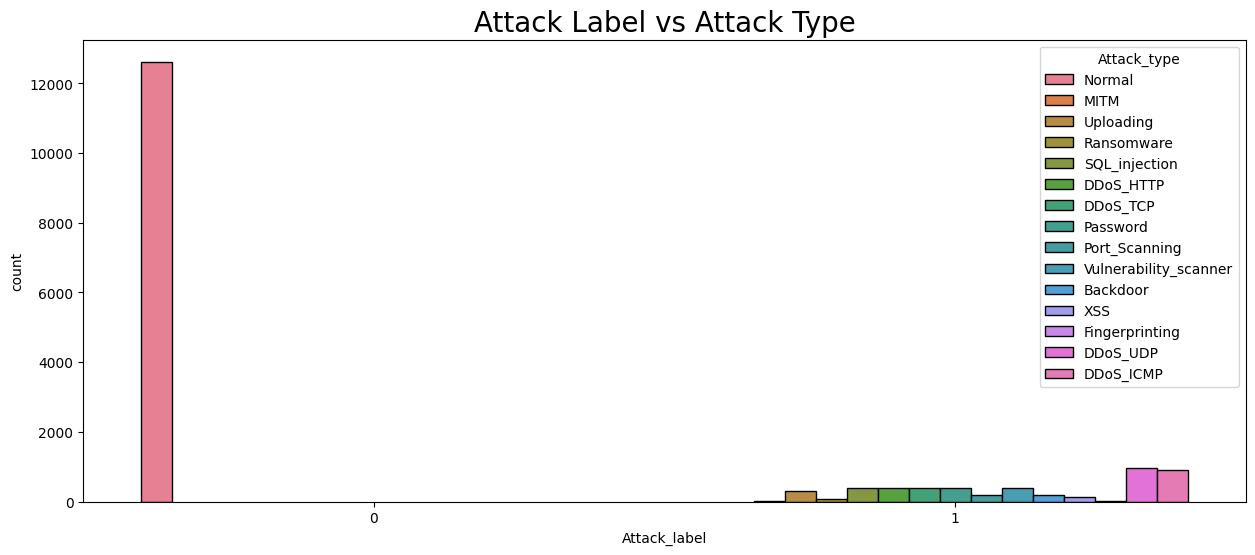

In [40]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Attack_label', hue='Attack_type', edgecolor='black', linewidth=1)
plt.title('Attack Label vs Attack Type', fontsize=20)
plt.show()

In [41]:
import plotly.express as px

fig = px.pie(df, names='Attack_label', title='Distribution of Attack Labels')
fig.show()


In [42]:
fig = px.pie(df, names='Attack_type', title='Distribution of Attack Type')
fig.show()


- class imbalance issue - this can cause the machine learning model to result in biased results

# Drop features
Now using our domain knowledge we will only select useful features from our dataset and drop the rest

In [43]:
#view dimensions of dataset (rows and columns)
print ("Rows,columns in dataset:", df.shape)

Rows,columns in dataset: (17337, 63)


In [44]:
# Identifying columns that are entirely NaN (empty) or have all zero values
empty_or_zero_columns = df.columns[(df.isnull().all())
| (df == 0).all()   | (df == 1).all() | (df == 1.0).all()
| (df == 0.0).all() | (df == 2).all() | (df == 2.0).all()]

# Displaying the identified columns
empty_features = empty_or_zero_columns.tolist()

print("These columns are all empty features:")
print(empty_features)


for feature in empty_features:
  if feature in df.columns:
    df.drop(feature, axis=1, inplace=True)
    print("Dropping empty feature:", feature)

These columns are all empty features:
['icmp.unused', 'http.tls_port', 'dns.qry.type', 'mqtt.msg_decoded_as']
Dropping empty feature: icmp.unused
Dropping empty feature: http.tls_port
Dropping empty feature: dns.qry.type
Dropping empty feature: mqtt.msg_decoded_as


In [45]:
# show the columns to confirm the features have been dropped
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
127,2021 11:44:16.240051000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
255,2021 11:44:24.267046000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
383,2021 11:44:32.310917000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
511,2021 11:44:42.310422000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
639,2021 11:44:48.414713000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal


In [46]:
#view dimensions of dataset (rows and columns)
print ("Rows,columns in dataset:", df.shape)

Rows,columns in dataset: (17337, 59)


In [47]:
# drop these features

feature_names = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4",
                "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
                "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
                "tcp.dstport", "udp.port", "mqtt.msg", "icmp.unused", "http.tls_port", 'dns.qry.type',
                'dns.retransmit_request_in', "mqtt.msg_decoded_as", "mbtcp.trans_id", "mbtcp.unit_id", "http.request.method", "http.referer",
                "http.request.version", "dns.qry.name.len", "mqtt.conack.flags", "mqtt.protoname", "mqtt.topic"]

# potential_drop_list = ['arp.opcode']

for feature_name in feature_names:
  if feature_name in df.columns:
    df.drop(feature_name, axis=1, inplace=True)
    print("Dropping feature:", feature_name)


Dropping feature: frame.time
Dropping feature: ip.src_host
Dropping feature: ip.dst_host
Dropping feature: arp.src.proto_ipv4
Dropping feature: arp.dst.proto_ipv4
Dropping feature: http.file_data
Dropping feature: http.request.full_uri
Dropping feature: icmp.transmit_timestamp
Dropping feature: http.request.uri.query
Dropping feature: tcp.options
Dropping feature: tcp.payload
Dropping feature: tcp.srcport
Dropping feature: tcp.dstport
Dropping feature: udp.port
Dropping feature: mqtt.msg
Dropping feature: dns.retransmit_request_in
Dropping feature: mbtcp.trans_id
Dropping feature: mbtcp.unit_id
Dropping feature: http.request.method
Dropping feature: http.referer
Dropping feature: http.request.version
Dropping feature: dns.qry.name.len
Dropping feature: mqtt.conack.flags
Dropping feature: mqtt.protoname
Dropping feature: mqtt.topic


In [48]:
#view dimensions of dataset (rows and columns)
print ("Rows,columns in dataset after dropping features:", df.shape)

Rows,columns in dataset after dropping features: (17337, 34)


In [49]:
# print(df[df['tcp.flags.ack'] == 1]['Attack_label'].value_counts(normalize=True))
# print(df[df['tcp.flags.ack'] == 0]['Attack_label'].value_counts(normalize=True))

df['Attack_label'].groupby(df['tcp.flags.ack']).value_counts(normalize=True)
# hence we group by is prefered

tcp.flags.ack  Attack_label
0.0            1               0.558176
               0               0.441824
1.0            0               0.826931
               1               0.173069
Name: proportion, dtype: float64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337 entries, 127 to 2219135
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   arp.opcode              17337 non-null  float64
 1   arp.hw.size             17337 non-null  float64
 2   icmp.checksum           17337 non-null  float64
 3   icmp.seq_le             17337 non-null  float64
 4   http.content_length     17337 non-null  float64
 5   http.response           17337 non-null  float64
 6   tcp.ack                 17337 non-null  float64
 7   tcp.ack_raw             17337 non-null  float64
 8   tcp.checksum            17337 non-null  float64
 9   tcp.connection.fin      17337 non-null  float64
 10  tcp.connection.rst      17337 non-null  float64
 11  tcp.connection.syn      17337 non-null  float64
 12  tcp.connection.synack   17337 non-null  float64
 13  tcp.flags               17337 non-null  float64
 14  tcp.flags.ack           17337 non-

In [51]:
#view dimensions of dataset (rows and columns)
print ("Rows,columns in dataset:", df.shape)

Rows,columns in dataset: (17337, 34)


# Label encoding
- Problem: if we use a machine learning model to predict the Attack label, it could predict it as 0.1, 0.2 or 0.99 which is not a valid Attack label
- Solution: Label Encoder

In [52]:
# The final column in the dataset is Attack_type, and will contain either 0 or 1

# Display unique values in the "Attack_type" column
unique_attack_types = df['Attack_type'].unique()
print("Unique Attack Types:")
print(unique_attack_types)

Unique Attack Types:
['Normal' 'MITM' 'Uploading' 'Ransomware' 'SQL_injection' 'DDoS_HTTP'
 'DDoS_TCP' 'Password' 'Port_Scanning' 'Vulnerability_scanner' 'Backdoor'
 'XSS' 'Fingerprinting' 'DDoS_UDP' 'DDoS_ICMP']


In [53]:
# add a column to the dataset called "Attack_label"
# this column will only contain 0 or 1, and an integer representation of the text-based "Attack_type" column
# if Attack_type=Normal, then Attack_label=0, otherwise, Attack_level=1

le = LabelEncoder()    #assumes "from sklearn.preprocessing import LabelEncoder"
df['Attack_label'] = le.fit_transform(df['Attack_label'])

print(f"Converting text-based Attack_type feature to integer-baesd Attack_label feature")
df['Attack_label'].value_counts()

Converting text-based Attack_type feature to integer-baesd Attack_label feature


Attack_label
0    12622
1     4715
Name: count, dtype: int64

In [54]:
# Now that we have encoded the text-based "Attack_type" column into the integer-based "Attack_label" column, we can drop the "Attack_type" column
df.drop('Attack_type', axis=1, inplace=True)

In [55]:
# confirm that the Attack_label column has been added, and the Attack_type column has been removed
df.head()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,http.content_length,http.response,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.fin,...,mqtt.conflag.cleansess,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,mbtcp.len,Attack_label
127,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.150836e+09,33874.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
255,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.911588e+09,53226.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,24782.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
511,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.183727e+09,43301.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
639,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.511028e+09,19720.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [56]:
# separate X and y variables (independent and dependent variables)

X = df.drop(['Attack_label'], axis=1)
y = df['Attack_label']


In [57]:
# Sanity check to confirm X and y have equal number of samples
print(f"X has", len(X), "samples")
print(f"y has", len(y), "samples")
if ( len(X) != len(y) ):
  raise ValueError ("X and y are different lengths, please investigate!")


X has 17337 samples
y has 17337 samples


# Split data into train / test / validation

In [58]:
# Split X and y into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Now further split test set into testing and validation sets because Deep Learning models also have validation data
# In this example, the train/test split in the previous cell was 80/20, so the 0.5 split you see in this cell splits the 20% of test data evenly into test and validation
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)



In [60]:
# Sanity check to confirm X_train and y_train have equal number of samples
print(f"X_train has", len(X_train), "samples")
print(f"y_train has", len(y_train), "samples")
if ( len(X_train) != len(y_train) ):
  raise ValueError ("X_train and y_train are different lengths, please investigate!")

# Sanity check to confirm X_test and y_test have equal number of samples
print('\n')
print(f"X_test has", len(X_test), "samples")
print(f"y_test has", len(y_test), "samples")
if ( len(X_test) != len(y_test) ):
  raise ValueError ("X_test and y_test are different lengths, please investigate!")

# Sanity check to confirm X_val and y_val have equal number of samples
print('\n')
print(f"X_val has", len(X_val), "samples")
print(f"y_val has", len(y_val), "samples")
if ( len(X_val) != len(y_val) ):
  raise ValueError ("X_val and y_val are different lengths, please investigate!")



X_train has 13869 samples
y_train has 13869 samples


X_test has 1734 samples
y_test has 1734 samples


X_val has 1734 samples
y_val has 1734 samples


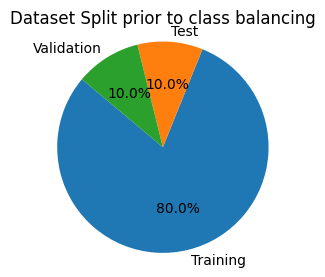

X_train contains 13869 rows, y_train contains 13869 rows
X_test  contains 1734 rows, y_test  contains 1734 rows
X_val   contains 1734 rows, y_val   contains 1734 rows


In [61]:
# create a pie chart showing relative sizes of X_train, X_test, X_val


# Labels for the pie chart
labels = ['Training', 'Test', 'Validation']

# Number of rows in each dataset split
sizes = [len(X_train), len(X_test), len(X_val)]

# Plotting the pie chart
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Dataset Split prior to class balancing')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print(f"X_train contains {len(X_train)} rows, y_train contains {len(y_train)} rows")
print(f"X_test  contains {len(X_test)} rows, y_test  contains {len(y_test)} rows")
print(f"X_val   contains {len(X_val)} rows, y_val   contains {len(y_val)} rows")

if (len(X_train) < len(X_test)):
  print(f"\nWARNING: You will notice in the above chart that X_train has fewer rows than X_test or X_val")
  print(f"This should not be the case, because the dataset has not yet undergone any reduction in the size of the training set.")
  print(f"Please confirm that you are working on a clean dataset.")


This pie chart shows the class balance in the training data.
The y_train data is labeled as 0=normal 1=attack 

  normal class contains 10083 samples
abnormal class contains 3786 samples
This dataset is currently imbalanced, will be balanced in next section.


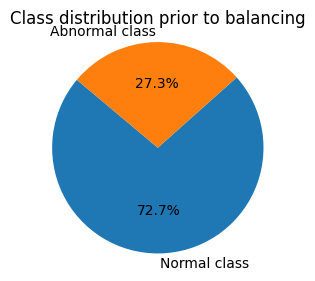

In [62]:
# create a pie chart showing the class balance in the training data

print(f"This pie chart shows the class balance in the training data.")
print(f"The y_train data is labeled as 0=normal 1=attack \n")

# Count the occurrences of each unique value
normal_class   = sum(1 for value in y_train if value == 0)
abnormal_class = sum(1 for value in y_train if value == 1)
print(f"  normal class contains {normal_class} samples")
print(f"abnormal class contains {abnormal_class} samples")
if (normal_class == abnormal_class): print("WARNING: This dataset is not expected to be balanced yet.  Please investigate.")
if (normal_class != abnormal_class): print("This dataset is currently imbalanced, will be balanced in next section.")

# Extract labels and sizes for the pie chart
labels = ["Normal class", "Abnormal class"]
values = [normal_class, abnormal_class]

# Plotting the pie chart
plt.figure(figsize=(3, 3))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Class distribution prior to balancing')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()





# Balance data classes

## SMOTE
This section is only shown as an example, this notebook balances the classes with random undersampling

In [63]:
# If you wanted to balance the classes with SMOTE instead, sample code shown below:

## Create an instance of the SMOTE class
#smote = SMOTE(sampling_strategy='auto')

## Apply SMOTE to the training data
#X_train_resampled, y_train_type_resampled = smote.fit_resample(X_train, y_train)

## sequential undersampling
This section is only shown as an example, this notebook balances the classes with random undersampling

In [64]:
# # sample code to perform sequential undersampling instead of random undersampling

# def sequential_undersample(X, y, minority_class_label, desired_ratio):
#     # Separate majority and minority class samples
#     majority_X = X[y != minority_class_label]
#     majority_y = y[y != minority_class_label]
#     minority_X = X[y == minority_class_label]
#     minority_y = y[y == minority_class_label]

#     print(f"Percentage of minority class samples in y: {sum(y == minority_class_label) / len(y) * 100:.2f}%")
#     print(f"Percentage of minority class samples in minority_y: {sum(minority_y == minority_class_label) / len(minority_y) * 100:.2f}%")

#     # Calculate the number of majority class samples to keep
#     num_minority_samples = len(minority_X)
#     #num_majority_samples = int(num_minority_samples * desired_ratio)
#     num_majority_samples = num_minority_samples

#     # Keep a portion of the majority class samples
#     majority_X_subset = majority_X[:num_majority_samples]
#     majority_y_subset = majority_y[:num_majority_samples]

#     # Combine minority and subset of majority class samples
#     X_balanced = np.concatenate((minority_X, majority_X_subset))
#     y_balanced = np.concatenate((minority_y, majority_y_subset))

#     return X_balanced, y_balanced

# # Usage example
# X_train_balanced, y_train_balanced = sequential_undersample(X_train, y_train, minority_class_label=1, desired_ratio=0.5)


# # Count the occurrences of each unique value
# normal_class   = sum(1 for value in y_train_balanced if value == 0)
# abnormal_class = sum(1 for value in y_train_balanced if value == 1)
# print(f"  normal class contains {normal_class} samples")
# print(f"abnormal class contains {abnormal_class} samples")

# # save the resampled values back to the original variable names so we can use consistent names throughout this notebook
# X_train = X_train_balanced
# y_train = y_train_balanced


## random undersampling

In [65]:
# Initialize RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1, random_state=42)

# Apply Random Under Sampling
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

print("Class balance before resampling")
print(y_train.value_counts())
print('\n')
print("Class balance after resampling")
print(y_train_resampled.value_counts())

# save the resampled values back to the original variable names so we can use consistent names throughout this notebook
X_train = X_train_resampled
y_train = y_train_resampled


Class balance before resampling
Attack_label
0    10083
1     3786
Name: count, dtype: int64


Class balance after resampling
Attack_label
0    3786
1    3786
Name: count, dtype: int64


In [66]:
# confirm the classes are balanced
# Figure out how many rows of each class exist in y_train (0=normal, 1=abnormal)

# Count occurrences of 0 and 1
normal_class   = sum(1 for value in y_train if value == 0)
abnormal_class = sum(1 for value in y_train if value == 1)

print(f"Count of   normal class: {normal_class}")
print(f"Count of abnormal class: {abnormal_class}")

total_rows = abnormal_class + normal_class
print(f"Total Number of rows (normal+abnormal): {total_rows}" )

balance = abnormal_class / total_rows * 100
balance = round(balance,2)

print(f"Percentage of abnormal class in dataset (abnormal/total*100): {balance}%")
if (balance  < 10): print("This dataset is very imbalanced, please beware of overfitting.")
if (balance != 50): print("WARNING: This dataset is supposed to be balanced.  Please investigate.")
if (balance == 50): print("This dataset is perfectly balanced.")

Count of   normal class: 3786
Count of abnormal class: 3786
Total Number of rows (normal+abnormal): 7572
Percentage of abnormal class in dataset (abnormal/total*100): 50.0%
This dataset is perfectly balanced.


In [67]:
# Sanity check to confirm X_train and y_train have equal number of samples
print(f"X_train has", len(X_train), "samples")
print(f"y_train has", len(y_train), "samples")
if ( len(X_train) != len(y_train) ):
  raise ValueError ("X_train and y_train are different lengths, please investigate!")

# Sanity check to confirm X_test and y_test have equal number of samples
print('\n')
print(f"X_test has", len(X_test), "samples")
print(f"y_test has", len(y_test), "samples")
if ( len(X_test) != len(y_test) ):
  raise ValueError ("X_test and y_test are different lengths, please investigate!")

# Sanity check to confirm X_val and y_val have equal number of samples
print('\n')
print(f"X_val has", len(X_val), "samples")
print(f"y_val has", len(y_val), "samples")
if ( len(X_val) != len(y_val) ):
  raise ValueError ("X_val and y_val are different lengths, please investigate!")


X_train has 7572 samples
y_train has 7572 samples


X_test has 1734 samples
y_test has 1734 samples


X_val has 1734 samples
y_val has 1734 samples


In [68]:
# show a running total of elapsed time for the entire notebook
show_elapsed_time()

Current Time: 2024-05-10 14:13:22
The entire notebook runtime so far is 0 minutes


# Feature Scaling

In [69]:
# perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)  # Only transform the test       set, don't fit
X_val_scaled   = scaler.transform(X_val)   # Only transform the validation set, don't fit

# Save the values under original names so we can use consistent names in subsequent sections
X_train = X_train_scaled
X_test  = X_test_scaled
X_val   = X_val_scaled

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

Current Time: 2024-05-10 14:13:22
The entire notebook runtime so far is 0 minutes


# Save progress in a pickle file
We don't actually use this pickle file anywhere, but it is nice to have available for debugging

In [70]:
import pickle

output_file = "Edge-IIoTset2023_scaled_data_tuple.pkl"
print(f"Saving progress to pickle file: ", output_file)

# Create a tuple
data_tuple = (X_train, X_test, X_val, y_train, y_test, y_val)

# Save the tuple using pickle
with open(output_file, 'wb') as f:
    pickle.dump(data_tuple, f)

Saving progress to pickle file:  Edge-IIoTset2023_scaled_data_tuple.pkl


In [71]:
# show a running total of elapsed time for the entire notebook
show_elapsed_time()

Current Time: 2024-05-10 14:13:22
The entire notebook runtime so far is 0 minutes


# Visualization after processing raw dataset

In [72]:
# sanity check

print(f"X_train contains {len(X_train)} rows, y_train contains {len(y_train)} rows")
print(f"X_test  contains {len(X_test)} rows, y_test  contains {len(y_test)} rows")
print(f"X_val   contains {len(X_val)} rows, y_val   contains {len(y_val)} rows")


X_train contains 7572 rows, y_train contains 7572 rows
X_test  contains 1734 rows, y_test  contains 1734 rows
X_val   contains 1734 rows, y_val   contains 1734 rows


In [73]:
# sanity check
X_train

array([[-0.04076997, -0.04303884, -0.28286262, ..., -0.16764816,
        -0.166395  , -0.01149273],
       [-0.04076997, -0.04303884, -0.28286262, ..., -0.16764816,
        -0.166395  , -0.01149273],
       [-0.04076997, -0.04303884, -0.28286262, ..., -0.16764816,
        -0.166395  , -0.01149273],
       ...,
       [-0.04076997, -0.04303884, -0.28286262, ..., -0.16764816,
        -0.166395  , -0.01149273],
       [-0.04076997, -0.04303884,  5.00296205, ..., -0.16764816,
        -0.166395  , -0.01149273],
       [-0.04076997, -0.04303884, -0.28286262, ..., -0.16764816,
        -0.166395  , -0.01149273]])

In [74]:
# sanity check
X_test

array([[-0.04076997, -0.04303884, -0.28286262, ..., -0.16764816,
        -0.166395  , -0.01149273],
       [-0.04076997, -0.04303884, -0.28286262, ..., -0.16764816,
        -0.166395  , -0.01149273],
       [-0.04076997, -0.04303884, -0.28286262, ..., -0.16764816,
        -0.166395  , -0.01149273],
       ...,
       [-0.04076997, -0.04303884, -0.28286262, ..., -0.16764816,
        -0.166395  , -0.01149273],
       [-0.04076997, -0.04303884, -0.28286262, ..., -0.16764816,
        -0.166395  , -0.01149273],
       [-0.04076997, -0.04303884, -0.28286262, ..., -0.16764816,
        -0.166395  , -0.01149273]])

In [75]:
# sanity check
y_train

0       0
1       0
2       0
3       0
4       0
       ..
7567    1
7568    1
7569    1
7570    1
7571    1
Name: Attack_label, Length: 7572, dtype: int64

In [76]:
# sanity check
y_test

1539199    0
83455      0
1752959    1
190591     0
2107263    1
          ..
2066943    1
2135039    1
2041855    1
438015     0
1518719    0
Name: Attack_label, Length: 1734, dtype: int64

In [77]:
# show a running total of elapsed time for the entire notebook
show_elapsed_time()

Current Time: 2024-05-10 14:13:22
The entire notebook runtime so far is 0 minutes


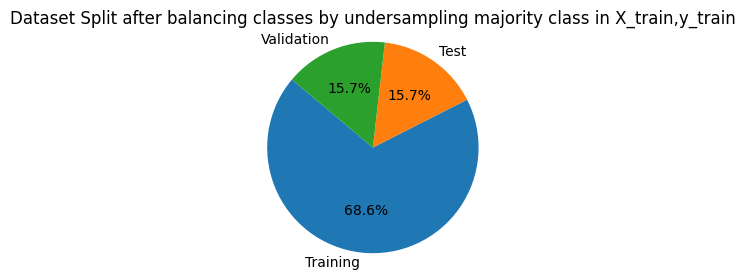

X_train contains 7572 rows, y_train contains 7572  rows
X_test  contains 1734 rows, y_test  contains 1734  rows
X_val   contains 1734 rows, y_val   contains 1734  rows
Please note that this data is after undersampling the majority class for balancing, so it is expected that the 80/10/10 split is changed here.


In [78]:
# create a pie chart showing relative sizes of X_train, X_test, X_val


# Labels for the pie chart
labels = ['Training', 'Test', 'Validation']

# Number of rows in each dataset split
sizes = [len(X_train), len(X_test), len(X_val)]

# Plotting the pie chart
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Dataset Split after balancing classes by undersampling majority class in X_train,y_train')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print(f"X_train contains", len(X_train), "rows, y_train contains", len(y_train), " rows")
print(f"X_test  contains", len(X_test), "rows, y_test  contains", len(y_test), " rows")
print(f"X_val   contains", len(X_val), "rows, y_val   contains", len(y_val), " rows")
print(f"Please note that this data is after undersampling the majority class for balancing, so it is expected that the 80/10/10 split is changed here.")

if (len(X_train) < len(X_test)):
  print(f"\nWARNING: You will notice in the above chart that X_train has fewer rows than X_test or X_val")
  print(f"This should not be the case, because the dataset has not yet undergone any reduction in the size of the training set.")
  print(f"Please confirm that you are working on a clean dataset.")


This pie chart shows the class balance in the training data.
The y_train data is labeled as 0=normal 1=attack 

This dataset is perfectly balanced.


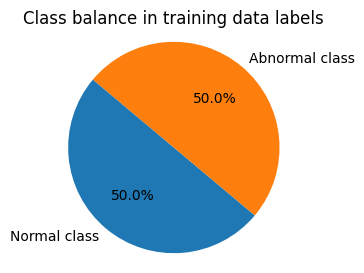

In [79]:
# create a pie chart showing the class balance in the training data

print(f"This pie chart shows the class balance in the training data.")
print(f"The y_train data is labeled as 0=normal 1=attack \n")

# Count the occurrences of each unique value
normal_class   = sum(1 for value in y_train if value == 0)
abnormal_class = sum(1 for value in y_train if value == 1)
if (normal_class != abnormal_class): print("WARNING: This dataset is supposed to be balanced.  Please investigate.")
if (normal_class == abnormal_class): print("This dataset is perfectly balanced.")

# Extract labels and sizes for the pie chart
labels = ["Normal class", "Abnormal class"]
values = [normal_class, abnormal_class]

# Plotting the pie chart
plt.figure(figsize=(3, 3))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Class balance in training data labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [80]:
# show a running total of elapsed time for the entire notebook
show_elapsed_time()

Current Time: 2024-05-10 14:13:22
The entire notebook runtime so far is 0 minutes


# Reduce dataset size to speed up analysis

NOTE: When reducing the size of your dataset to speed up training, it's generally recommended to sample only from the training data and leave the validation and test data untouched. Here's why:

Training Data:
- Sampling from the training data allows you to create a smaller subset that can be used for training the model.
- Since the training data is used to update the model's parameters during training, reducing its size can significantly speed up the training process without affecting the evaluation of the model.

Validation Data:
- The validation data is used to tune hyperparameters and monitor the model's performance during training.
- It's important to keep the validation data separate from the training data to ensure an unbiased evaluation of the model's performance.
- Sampling from the validation data could lead to overfitting on the validation set and biased performance estimates.

Test Data:
- Similarly, the test data serves as an unbiased evaluation of the model's performance on unseen data.
- Sampling from the test data could lead to overly optimistic performance estimates, as the model is evaluated on a different distribution than it will encounter in real-world scenarios.

In summary, while it's common to reduce the size of the training data to speed up training, it's important to keep the validation and test data separate and unchanged to ensure unbiased evaluation of the model's performance.

In [81]:
# save these values for comparison at the end of this section
X_train_len = len(X_train)  #re-calculate after subsampling
X_test_len  = len(X_test)   #re-calculate after subsampling
X_val_len   = len(X_val)    #re-calculate after subsampling
y_train_len = len(y_train)  #re-calculate after subsampling
y_test_len  = len(y_test)   #re-calculate after subsampling
y_val_len   = len(y_val)    #re-calculate after subsampling


print(f"X_train contains", len(X_train), "rows, y_train contains", len(y_train), " rows")
print(f"X_test  contains", len(X_test), "rows, y_test  contains", len(y_test), " rows")
print(f"X_val   contains", len(X_val), "rows, y_val   contains", len(y_val), " rows")

print(f"\nThe objective of this section is to see if we can speed up the training process by reducing the size of the dataset, but not losing too much accuracy.")

X_train contains 7572 rows, y_train contains 7572  rows
X_test  contains 1734 rows, y_test  contains 1734  rows
X_val   contains 1734 rows, y_val   contains 1734  rows

The objective of this section is to see if we can speed up the training process by reducing the size of the dataset, but not losing too much accuracy.


In [82]:
# Define a list of fractions to keep
#fractions_to_keep = [0.01, 0.02, 0.05, 0.10, 0.25, 0.50, 0.75, 1.0]
fractions_to_keep = [0.25, 0.50, 0.75, 1.0]


#initialize variables
best_accuracy         = 0
best_fraction_to_keep = 0
accuracy_001          = 0
accuracy_002          = 0
accuracy_005          = 0
accuracy_010          = 0
accuracy_025          = 0
accuracy_050          = 0
accuracy_075          = 0
accuracy_100          = 0

# Iterate through different fractions
for fraction_to_keep in fractions_to_keep:
    # Randomly subsample the training set
    num_samples_to_keep = int(len(X_train) * fraction_to_keep)
    random_indices = np.random.choice(len(X_train), num_samples_to_keep, replace=False)

    X_train_subsampled = X_train[random_indices]
    y_train_subsampled = y_train.iloc[random_indices]   #use .iloc becaue y_train is a 1-dimensional array

    # Train your model on the subsampled data
    #clf = LogisticRegression(max_iter=800, random_state=42)
    clf = MLPClassifier(random_state=42)
    clf.fit(X_train_subsampled, y_train_subsampled)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on the test set (fraction_to_keep={fraction_to_keep:.4f}): {accuracy:.4f}")

    # Save the accuracy levels for later comparison
    if fraction_to_keep == 0.01: accuracy_001 = accuracy
    if fraction_to_keep == 0.02: accuracy_002 = accuracy
    if fraction_to_keep == 0.05: accuracy_005 = accuracy
    if fraction_to_keep == 0.10: accuracy_010 = accuracy
    if fraction_to_keep == 0.25: accuracy_025 = accuracy
    if fraction_to_keep == 0.50: accuracy_050 = accuracy
    if fraction_to_keep == 0.75: accuracy_075 = accuracy
    if fraction_to_keep == 1.0:  accuracy_100 = accuracy

    # keep track of the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_fraction_to_keep = fraction_to_keep


print(f"The highest accuracy is {best_accuracy:.4f} using the {best_fraction_to_keep} fraction of the dataset\n")

# show a running total of elapsed time for the entire notebook
show_elapsed_time()


Accuracy on the test set (fraction_to_keep=0.2500): 0.8725
Accuracy on the test set (fraction_to_keep=0.5000): 0.8731
Accuracy on the test set (fraction_to_keep=0.7500): 0.8835
Accuracy on the test set (fraction_to_keep=1.0000): 0.8956
The highest accuracy is 0.8956 using the 1.0 fraction of the dataset

Current Time: 2024-05-10 14:13:37
The entire notebook runtime so far is 1 minutes


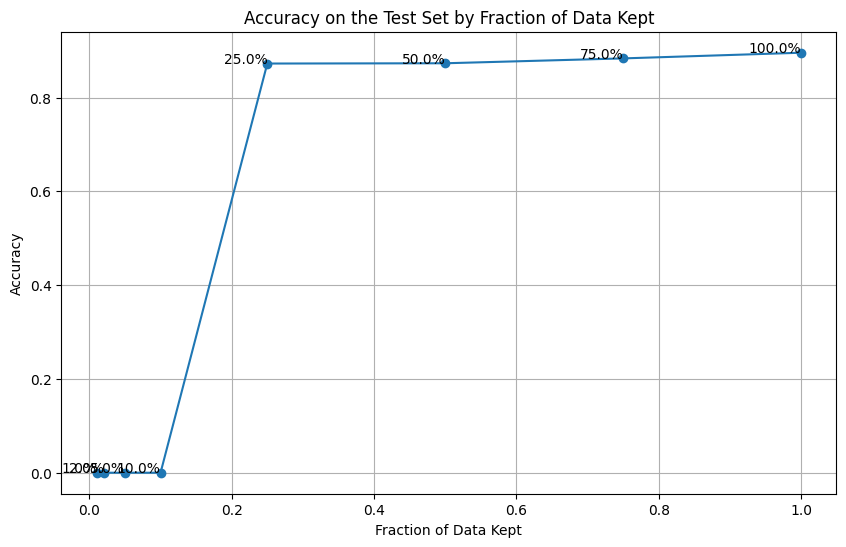

In [83]:
# Visualize the results from the previous cell

# Data extracted from the image
data = {
    'fraction_to_keep': [0.01, 0.02, 0.05, 0.10, 0.25, 0.50, 0.75, 1.00],
    'accuracy': [accuracy_001, accuracy_002, accuracy_005, accuracy_010, accuracy_025, accuracy_050, accuracy_075, accuracy_100]
}

# Create a DataFrame
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.plot(df['fraction_to_keep'], df['accuracy'], marker='o')

# Adding titles and labels
plt.title('Accuracy on the Test Set by Fraction of Data Kept')
plt.xlabel('Fraction of Data Kept')
plt.ylabel('Accuracy')

# Adding text for each data point
for i in range(len(df)):
    plt.text(df['fraction_to_keep'][i], df['accuracy'][i], f"{df['fraction_to_keep'][i]*100}%", ha='right')

# Adding grid for better readability
plt.grid(True)

# Save the figure with texts
fig_path_with_text = 'accuracy_vs_data_fraction_with_text.png'
plt.savefig(fig_path_with_text)

# Show the figure
plt.show()


In [84]:
# This cell will programnmatically determine the best_fraction_to_keep, by sacrificing some (small) amount of accuracy for speed.
# Exactly how small?  Let's go with an acceptable loss of 1% of accuracy for better speed.

acceptable_loss_of_accuracy = 0.0100  # 0.01*100= 1%  Tweak this value depending on how much accuracy you are willing to sacrifice

if ((best_accuracy - acceptable_loss_of_accuracy) <= accuracy_100):
    print(f"Using 100% of the dataset gives {accuracy_100*100:.2f}% accuracy, which is an acceptable trade-off between accuracy and speed.")
    best_fraction_to_keep = 1.0

if ((best_accuracy - acceptable_loss_of_accuracy) <= accuracy_075):
    print(f"Using  75% of the dataset gives {accuracy_075*100:.2f}% accuracy, which is an acceptable trade-off between accuracy and speed.")
    best_fraction_to_keep = 0.75

if ((best_accuracy - acceptable_loss_of_accuracy) <= accuracy_050):
    print(f"Using  50% of the dataset gives {accuracy_050*100:.2f}% accuracy, which is an acceptable trade-off between accuracy and speed.")
    best_fraction_to_keep = 0.50

if ((best_accuracy - acceptable_loss_of_accuracy) <= accuracy_025):
    print(f"Using  25% of the dataset gives {accuracy_025*100:.2f}% accuracy, which is an acceptable trade-off between accuracy and speed.")
    best_fraction_to_keep = 0.25

if ((best_accuracy - acceptable_loss_of_accuracy) <= accuracy_010):
    print(f"Using  10% of the dataset gives {accuracy_010*100:.2f}% accuracy, which is an acceptable trade-off between accuracy and speed.")
    best_fraction_to_keep = 0.10

if ((best_accuracy - acceptable_loss_of_accuracy) <= accuracy_005):
    print(f"Using   5% of the dataset gives {accuracy_005*100:.2f}% accuracy, which is an acceptable trade-off between accuracy and speed.")
    best_fraction_to_keep = 0.05

if ((best_accuracy - acceptable_loss_of_accuracy) <= accuracy_002):
    print(f"Using   2% of the dataset gives {accuracy_002*100:.2f}% accuracy, which is an acceptable trade-off between accuracy and speed.")
    best_fraction_to_keep = 0.02

if ((best_accuracy - acceptable_loss_of_accuracy) <= accuracy_001):
    print(f"Using   1% of the dataset gives {accuracy_001*100:.2f}% accuracy, which is an acceptable trade-off between accuracy and speed.")
    best_fraction_to_keep = 0.01

print(f"\nBased on the above calculations, we will keep {best_fraction_to_keep*100:.0f}% of the dataset, which will still provide acceptable accuracy.")


Using 100% of the dataset gives 89.56% accuracy, which is an acceptable trade-off between accuracy and speed.

Based on the above calculations, we will keep 100% of the dataset, which will still provide acceptable accuracy.


In [85]:
# Based on the accuracy calculations in the previous cell, decide how much of the dataset to keep
fraction_to_keep = best_fraction_to_keep

# Randomly subsample the training set
num_samples_to_keep = int(len(X_train) * fraction_to_keep)
random_indices = np.random.choice(len(X_train), num_samples_to_keep, replace=False)

#save the sub-sampled data to temporary variable names
X_train_subsampled = X_train[random_indices]
y_train_subsampled = y_train.iloc[random_indices]   #use .iloc becaue y_train is a 1-dimensional array

#save the sub-sampled data back to the original variable names that are used in subsequent sections
X_train = X_train_subsampled
y_train = y_train_subsampled

print(f"\nPrior to downsampling the dataset sizes were:")
print(f"---------------------------------------------")
print(f"X_train previously contained {X_train_len} rows, y_train previously contained {y_train_len} rows")  #these values were calculated prior to subsampling
print(f"X_test  previously contained {X_test_len} rows, y_test  previously contained {y_test_len} rows")
print(f"X_val   previously contained {X_val_len} rows, y_val   previously contained {y_val_len} rows")



print(f"\nAfter downsampling the training data without losing too much accuracy, the new size of the dataset is:")
print(f"------------------------------------------------------------------------------------------------------")
X_train_len = len(X_train)  #re-calculate after subsampling
X_test_len  = len(X_test)   #re-calculate after subsampling
X_val_len   = len(X_val)    #re-calculate after subsampling
y_train_len = len(y_train)  #re-calculate after subsampling
y_test_len  = len(y_test)   #re-calculate after subsampling
y_val_len   = len(y_val)    #re-calculate after subsampling

print(f"X_train now contains {X_train_len} rows, y_train now contains {y_train_len} rows")  #these values were calculated prior to subsampling
print(f"X_test  now contains {X_test_len} rows, y_test  now contains {y_test_len} rows")
print(f"X_val   now contains {X_val_len} rows, y_val   now contains {y_val_len} rows")

if (len(X_train) < len(X_test)):
  print(f"\nWARNING: You have reduced the size of X_train by too much!  X_train should not be smaller than X_test")
  print(f"This is because the training data was reduced via subsampling to speed up processing, but the test and validation data was not reduced in size.")
  print(f"Please go back to the dataset reduction setting and adjust the sizes of of the fractions_to_keep list")
  raise ValueError ("X_train has been reduced by too much, please investigate!")




Prior to downsampling the dataset sizes were:
---------------------------------------------
X_train previously contained 7572 rows, y_train previously contained 7572 rows
X_test  previously contained 1734 rows, y_test  previously contained 1734 rows
X_val   previously contained 1734 rows, y_val   previously contained 1734 rows

After downsampling the training data without losing too much accuracy, the new size of the dataset is:
------------------------------------------------------------------------------------------------------
X_train now contains 7572 rows, y_train now contains 7572 rows
X_test  now contains 1734 rows, y_test  now contains 1734 rows
X_val   now contains 1734 rows, y_val   now contains 1734 rows


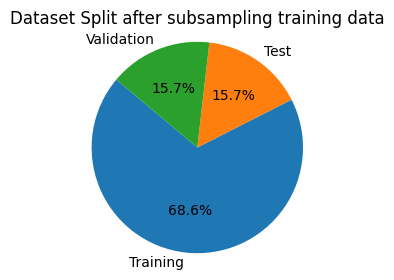

X_train contains 7572 rows, y_train contains 7572  rows
X_test  contains 1734 rows, y_test  contains 1734  rows
X_val   contains 1734 rows, y_val   contains 1734  rows


In [86]:
# create a pie chart showing relative sizes of X_train, X_test, X_val


# Labels for the pie chart
labels = ['Training', 'Test', 'Validation']

# Number of rows in each dataset split
sizes = [len(X_train), len(X_test), len(X_val)]

# Plotting the pie chart
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Dataset Split after subsampling training data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print(f"X_train contains", len(X_train), "rows, y_train contains", len(y_train), " rows")
print(f"X_test  contains", len(X_test), "rows, y_test  contains", len(y_test), " rows")
print(f"X_val   contains", len(X_val), "rows, y_val   contains", len(y_val), " rows")

if (len(X_train) < len(X_test)):
  print(f"\nWARNING: You have reduced the size of X_train by too much!  X_train should not be smaller than X_test")
  print(f"This is because the training data was reduced via subsampling to speed up processing, but the test and validation data was not reduced in size.")
  print(f"Please go back to the dataset reduction setting and adjust the sizes of of the fractions_to_keep list")
  raise ValueError ("X_train has been reduced by too much, please investigate!")


This pie chart shows the class balance in the training data.
The y_train data is labeled as 0=normal 1=attack 



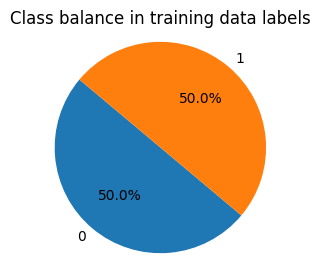

In [87]:
# create a pie chart showing the class balance in the training data

print(f"This pie chart shows the class balance in the training data.")
print(f"The y_train data is labeled as 0=normal 1=attack \n")

# Count the occurrences of each unique value
value_counts = Counter(y_train)    #assumes "from collections import Counter"

# Extract labels and sizes for the pie chart
labels = list(value_counts.keys())
sizes = list(value_counts.values())

# Plotting the pie chart
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Class balance in training data labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [88]:
# show a running total of elapsed time for the entire notebook
show_elapsed_time()

Current Time: 2024-05-10 14:13:38
The entire notebook runtime so far is 1 minutes


# Model training with traditional classifiers

## Logistic Regression

### default params
LR

Training model with default hyperparameters of: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy: 0.8760092272202998


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



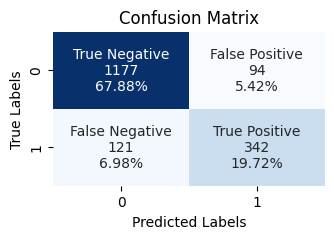




Confusion matrix

 [[1177   94]
 [ 121  342]]

True Negatives  (TN) =  1177
False Positives (FP) =  94
False Negatives (FN) =  121
True Positives  (TP) =  342


Accuracy:        0.8760092272202998
Sensitivity:     0.7386609071274298
Specificity:     0.9260424862313139
Geometric Mean:  0.8270618978759466


Precision:        0.8741037187053697
Recall:           0.8760092272202998
f1-score:         0.8747988637429019

------------------------------------------------

Current Time: 2024-05-10 14:13:38
The entire notebook runtime so far is 1 minutes


In [89]:
# Create an instance of the LogisticRegression model
clf = LogisticRegression()

default_params = clf.get_params()
print(f"Training model with default hyperparameters of: {default_params}")

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# save accuracy for later comparison
accuracy_lr_unoptimized = accuracy

# call previously defined function to create confusion matrix
# We want to see approximately equal results from TN and TP
cm = visualize_confusion_matrix(y_test, y_pred)

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

### optimized params
LR

The LogisticRegression() class in scikit-learn provides several parameters that can be adjusted to customize the logistic regression model. Here are some of the commonly used parameters:
- penalty: Specifies the norm used in the penalization. It can take values like 'l1' (L1 regularization), 'l2' (L2 regularization), or 'none' (no regularization). The default is 'l2'.
- C: Inverse of regularization strength. Smaller values specify stronger regularization. The default value is 1.0.
- solver: Algorithm to use in the optimization problem. Options include 'liblinear', 'newton-cg', 'lbfgs', 'sag', and 'saga'. The default is 'lbfgs'.
- max_iter: Maximum number of iterations taken for the solvers to converge. The default is 100.
- multi_class: Specifies the strategy to use for multiclass classification. Options include 'auto', 'ovr' (one-vs-rest), and 'multinomial' (softmax). The default is 'auto'.
- verbose: Controls the verbosity of the output. Set to an integer value greater than 0 for more verbosity. The default is 0.
- random_state: Seed used by the random number generator. It ensures reproducibility of results. Set to an integer for reproducible output. The default is None.
- tol: Tolerance for stopping criteria. The default is 1e-4.
class_weight: Weights associated with classes. This can be used to handle class imbalance by assigning higher weights to minority classes.

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call 

Best Parameters: {'C': 1.0, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}
Best Scores: 0.838615315977874


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Cross validation scores: [0.83377309 0.84828496 0.86393659 0.84280053 0.84412153 0.82034346
 0.82694848 0.82562748 0.84676354 0.8335535 ]
Mean cross validation score: 0.838615315977874
Standard Deviation cross validation score: 0.012396071391792211
Accuracy: 0.8760092272202998


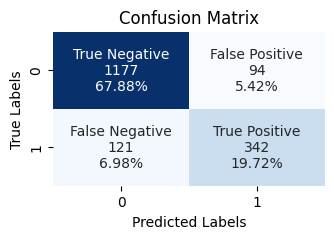




Confusion matrix

 [[1177   94]
 [ 121  342]]

True Negatives  (TN) =  1177
False Positives (FP) =  94
False Negatives (FN) =  121
True Positives  (TP) =  342


Accuracy:        0.8760092272202998
Sensitivity:     0.7386609071274298
Specificity:     0.9260424862313139
Geometric Mean:  0.8270618978759466


Precision:        0.8741037187053697
Recall:           0.8760092272202998
f1-score:         0.8747988637429019

------------------------------------------------

Current Time: 2024-05-10 14:13:42
The entire notebook runtime so far is 1 minutes


In [90]:
# Create an instance of the  model
clf = LogisticRegression()

# Define the hyperparameters to tune
param_grid = {
    'penalty': ['None', 'l2'],
    'C': [0.1, 1.0],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200],
    'multi_class': ['auto'],
    'random_state': [42]                 #for reproducible results
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=cv_count, n_jobs=-1, verbose=verbosity)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_scores = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Scores:", best_scores)

# Create a new instance of the model with the best hyperparameters
clf = LogisticRegression(**best_params)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# final cross validation
cross_val_score_result = cross_val_score(clf, X_train, y_train, cv=cv_count)
print(f"Cross validation scores: {cross_val_score_result}")
print(f"Mean cross validation score: {cross_val_score_result.mean()}")
print(f"Standard Deviation cross validation score: {cross_val_score_result.std()}")
lr_crossval_score_all  = cross_val_score_result         #save all folds in a list for later comparison
lr_crossval_score_mean = cross_val_score_result.mean()  #save mean   crossval score in a variable for later comparison
lr_crossval_score_std  = cross_val_score_result.std()   #save stddev crossval score in a variable for later comparison

# Evaluate the model
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy)

# save best parameters for later comparison
best_params_lr = best_params

# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_lr_optimized      = Accuracy
sensitivity_lr_optimized   = Sensitivity
specificity_lr_optimized   = Specificity
geometricmean_lr_optimized = GeometricMean
precision_lr_optimized     = Precision
recall_lr_optimized        = Recall
f1_lr_optimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

## Naive Bayes

### default params
NB

Training model with default hyperparameters of: {'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}
Accuracy: 0.7629757785467128


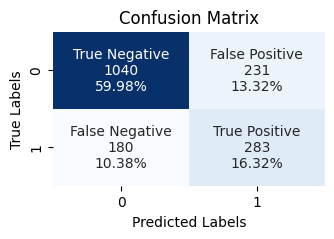




Confusion matrix

 [[1040  231]
 [ 180  283]]

True Negatives  (TN) =  1040
False Positives (FP) =  231
False Negatives (FN) =  180
True Positives  (TP) =  283


Accuracy:        0.7629757785467128
Sensitivity:     0.6112311015118791
Specificity:     0.8182533438237608
Geometric Mean:  0.7072071073321984


Precision:        0.7718544655704155
Recall:           0.7629757785467128
f1-score:         0.766735801473732

------------------------------------------------

Current Time: 2024-05-10 14:13:42
The entire notebook runtime so far is 1 minutes


In [91]:

# Create an instance of the model
#clf = GaussianNB()    # suitable for continuous features
#clf = MultinomialNB() # used for discrete data like word counts
clf = BernoulliNB()    # suitable for binary data, gives best accuracy for this dataset

default_params = clf.get_params()
print(f"Training model with default hyperparameters of: {default_params}")

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# save accuracy for later comparison
accuracy_nb_unoptimized = accuracy

# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_nb_unoptimized      = Accuracy
sensitivity_nb_unoptimized   = Sensitivity
specificity_nb_unoptimized   = Specificity
geometricmean_nb_unoptimized = GeometricMean
precision_nb_unoptimized     = Precision
recall_nb_unoptimized        = Recall
f1_nb_unoptimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

### optimized params
NB

he BernoulliNB class in scikit-learn represents a naive Bayes classifier for Bernoulli-distributed data. Here are the parameters of the BernoulliNB class:

- alpha: (float, default=1.0 or 1e-10)
Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
- binarize: (float or None, default=None)
Threshold for binarizing (mapping to boolean) of sample features. If None, no binarization is performed.
- fit_prior: (bool, default=True)
Whether to learn class prior probabilities or not. If False, a uniform prior will be used.
- class_prior: (array-like of shape (n_classes,), default=None)
Prior probabilities of the classes. If specified, the priors are not adjusted according to the data.
- min_df: (float or int, default=1)
When building the vocabulary, ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature.
- max_df: (float or int, default=1.0)
When building the vocabulary, ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts.
- max_features: (int, default=None)
If not None, build a vocabulary that only considers the top max_features ordered by term frequency across the corpus.
- binary: (bool, default=False)
Whether to treat all values greater than zero as 1, and all others as 0.
- n_jobs: (int, default=None)
The number of parallel jobs to run. -1 means using all processors.


These parameters allow you to customize the behavior of the Bernoulli Naive Bayes classifier according to your specific needs and the characteristics of your data.

Performing GridSearchCV
Best Parameters: {'alpha': 0.1}
Best Scores: 0.7275511235504682
Fitting the model
Cross validation scores: [0.71503958 0.72295515 0.74636724 0.72258917 0.73976222 0.71598415
 0.71466314 0.70805812 0.75825627 0.7318362 ]
Mean cross validation score: 0.7275511235504682
Standard Deviation cross validation score: 0.015318224381318345
Accuracy: 0.7629757785467128


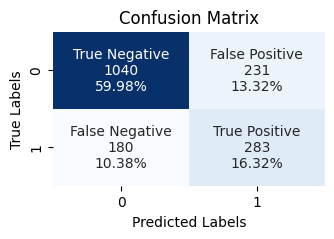




Confusion matrix

 [[1040  231]
 [ 180  283]]

True Negatives  (TN) =  1040
False Positives (FP) =  231
False Negatives (FN) =  180
True Positives  (TP) =  283


Accuracy:        0.7629757785467128
Sensitivity:     0.6112311015118791
Specificity:     0.8182533438237608
Geometric Mean:  0.7072071073321984


Precision:        0.7718544655704155
Recall:           0.7629757785467128
f1-score:         0.766735801473732

------------------------------------------------

Current Time: 2024-05-10 14:13:42
The entire notebook runtime so far is 1 minutes


In [92]:
# Create an instance of the model
clf = BernoulliNB()

# Define the hyperparameters to tune
# skip the sigmoid and poly kernels, rarely used
param_grid = {
    'alpha': [1.0, 0.1, 0.01, 0.001]
}


# Create an instance of GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=cv_count, n_jobs=-1, verbose=verbosity)

# Fit the grid search to the training data
print("Performing GridSearchCV")
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_scores = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Scores:", best_scores)

# Create a new instance of model with the best hyperparameters
clf = BernoulliNB(**best_params)

# Fit the model to the training data
print("Fitting the model")
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# final cross validation
cross_val_score_result = cross_val_score(clf, X_train, y_train, cv=cv_count)
print(f"Cross validation scores: {cross_val_score_result}")
print(f"Mean cross validation score: {cross_val_score_result.mean()}")
print(f"Standard Deviation cross validation score: {cross_val_score_result.std()}")
nb_crossval_score_all  = cross_val_score_result         #save all folds in a list for later comparison
nb_crossval_score_mean = cross_val_score_result.mean()  #save mean   crossval score in a variable for later comparison
nb_crossval_score_std  = cross_val_score_result.std()   #save stddev crossval score in a variable for later comparison

# Evaluate the model
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy)

# save best parameters for later comparison
best_params_nb = best_params

# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_nb_optimized      = Accuracy
sensitivity_nb_optimized   = Sensitivity
specificity_nb_optimized   = Specificity
geometricmean_nb_optimized = GeometricMean
precision_nb_optimized     = Precision
recall_nb_optimized        = Recall
f1_nb_optimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

# KNN

### default params
KNN

Training model with default hyperparameters of: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Accuracy: 0.8356401384083045


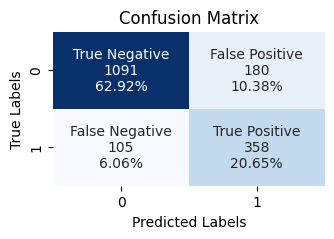




Confusion matrix

 [[1091  180]
 [ 105  358]]

True Negatives  (TN) =  1091
False Positives (FP) =  180
False Negatives (FN) =  105
True Positives  (TP) =  358


Accuracy:        0.8356401384083045
Sensitivity:     0.7732181425485961
Specificity:     0.8583792289535799
Geometric Mean:  0.814686683955116


Precision:        0.8463140072909106
Recall:           0.8356401384083045
f1-score:         0.83929909938693

------------------------------------------------

Current Time: 2024-05-10 14:13:43
The entire notebook runtime so far is 1 minutes


In [93]:
# Create an instance of the model with the desired number of neighbors (you can adjust n_neighbors)
clf = KNeighborsClassifier(n_neighbors=5)  # You can change the value of n_neighbors as needed

default_params = clf.get_params()
print(f"Training model with default hyperparameters of: {default_params}")

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# save accuracy for later comparison
accuracy_knn_unoptimized = accuracy

# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_knn_unoptimized      = Accuracy
sensitivity_knn_unoptimized   = Sensitivity
specificity_knn_unoptimized   = Specificity
geometricmean_knn_unoptimized = GeometricMean
precision_knn_unoptimized     = Precision
recall_knn_unoptimized        = Recall
f1_knn_unoptimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

### optimized params
KNN

In [94]:
# # Create an instance of the model
# clf = KNeighborsClassifier()

# # Define the hyperparameters to tune
# param_grid = {
#     'n_neighbors': [5,10,15,20,30],
#     'weights': ['uniform', 'distance']
# }



# # Create an instance of GridSearchCV
# grid_search = GridSearchCV(clf, param_grid, cv=cv_count, n_jobs=-1)

# # Fit the grid search to the training data
# print(f"Performing grid_search to find optimal parameters")
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# best_scores = grid_search.best_score_
# print("Best Parameters:", best_params)
# print("Best Scores:", best_scores)

# # Create a new instance of the model with the best hyperparameters
# clf = KNeighborsClassifier(**best_params)

# # Fit the model to the training data
# clf.fit(X_train, y_train)

# # Predict the labels for the test data
# y_pred = clf.predict(X_test)

# # final cross validation
# cross_val_score_result = cross_val_score(clf, X_train, y_train, cv=cv_count)
# print(f"Cross validation scores: {cross_val_score_result}")
# print(f"Mean cross validation score: {cross_val_score_result.mean()}")
# print(f"Standard Deviation cross validation score: {cross_val_score_result.std()}")
# knn_crossval_score_all  = cross_val_score_result         #save all folds in a list for later comparison
# knn_crossval_score_mean = cross_val_score_result.mean()  #save mean   crossval score in a variable for later comparison
# knn_crossval_score_std  = cross_val_score_result.std()   #save stddev crossval score in a variable for later comparison

# # Evaluate the model
# Accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", Accuracy)

# # save best parameters for later comparison
# best_params_knn = best_params

# # call previously defined function to create confusion matrix
# cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# # save results calculated for this model for later comparison to other models
# accuracy_knn_optimized      = Accuracy
# sensitivity_knn_optimized   = Sensitivity
# specificity_knn_optimized   = Specificity
# geometricmean_knn_optimized = GeometricMean
# precision_knn_optimized     = Precision
# recall_knn_optimized        = Recall
# f1_knn_optimized            = F1

# # show a running total of elapsed time for the entire notebook
# show_elapsed_time()

## SVM

### default params
SVM

In [95]:
# # Create an instance of the model
# clf = SVC()

# default_params = clf.get_params()
# print(f"Training model with default hyperparameters of: {default_params}")

# # Fit the model to the training data
# clf.fit(X_train, y_train)

# # Predict the labels for the test data
# y_pred = clf.predict(X_test)

# # Evaluate the model
# accuracy = clf.score(X_test, y_test)
# print("Accuracy:", accuracy)

# # save accuracy for later comparison
# accuracy_svm_undersampled_unoptimized = accuracy

# # call previously defined function to create confusion matrix
# cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# # save results calculated for this model for later comparison to other models
# accuracy_svm_unoptimized      = Accuracy
# sensitivity_svm_unoptimized   = Sensitivity
# specificity_svm_unoptimized   = Specificity
# geometricmean_svm_unoptimized = GeometricMean
# precision_svm_unoptimized     = Precision
# recall_svm_unoptimized        = Recall
# f1_svm_unoptimized            = F1

# # show a running total of elapsed time for the entire notebook
# show_elapsed_time()

### optimized params
SVM

In [96]:
print("WARNING: SVM hyperparameter optimization is very CPU-intensive, this will take some time...")

# use the accuracy value prior to hyperparameter optimization so we still have something to copmare to at the end of this notebook
accuracy_svm_optimized = accuracy_svm_unoptimized

In [97]:
# # Create an instance of the model
# clf = SVC()

# # Define the hyperparameters to tune
# # skip the sigmoid and poly kernels, rarely used
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['rbf', 'linear'],
#     'probability': [True],               #probability=True is required for VotingClassifier
#     'random_state': [42]                 #for reproducible results
# }



# # Create an instance of GridSearchCV
# grid_search = GridSearchCV(clf, param_grid, cv=cv_count, n_jobs=-1, verbose=verbosity)

# # Fit the grid search to the training data
# print("Performing GridSearchCV")
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# best_scores = grid_search.best_score_
# print("Best Parameters:", best_params)
# print("Best Scores:", best_scores)

# # Create a new instance of model with the best hyperparameters
# clf = SVC(**best_params)

# # Fit the model to the training data
# print("Fitting the model")
# clf.fit(X_train, y_train)

# # Predict the labels for the test data
# y_pred = clf.predict(X_test)

# # final cross validation
# cross_val_score_result = cross_val_score(clf, X_train, y_train, cv=cv_count)
# print(f"Cross validation scores: {cross_val_score_result}")
# print(f"Mean cross validation score: {cross_val_score_result.mean()}")
# print(f"Standard Deviation cross validation score: {cross_val_score_result.std()}")
# svm_crossval_score_all  = cross_val_score_result         #save all folds in a list for later comparison
# svm_crossval_score_mean = cross_val_score_result.mean()  #save mean   crossval score in a variable for later comparison
# svm_crossval_score_std  = cross_val_score_result.std()   #save stddev crossval score in a variable for later comparison

# # Evaluate the model
# Accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", Accuracy)

# # save best parameters for later comparison
# best_params_svm = best_params

# # call previously defined function to create confusion matrix
# cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# # save results calculated for this model for later comparison to other models
# accuracy_svm_optimized      = Accuracy
# sensitivity_svm_optimized   = Sensitivity
# specificity_svm_optimized   = Specificity
# geometricmean_svm_optimized = GeometricMean
# precision_svm_optimized     = Precision
# recall_svm_optimized        = Recall
# f1_svm_optimized            = F1

# # show a running total of elapsed time for the entire notebook
# show_elapsed_time()

## Decision Tree

### default params

Training model with default hyperparameters of: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Accuracy: 0.9342560553633218


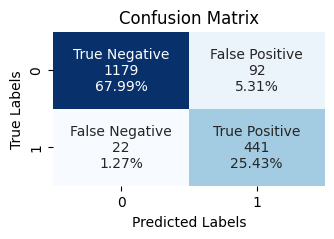




Confusion matrix

 [[1179   92]
 [  22  441]]

True Negatives  (TN) =  1179
False Positives (FP) =  92
False Negatives (FN) =  22
True Positives  (TP) =  441


Accuracy:        0.9342560553633218
Sensitivity:     0.9524838012958964
Specificity:     0.9276160503540519
Geometric Mean:  0.9399676918832439


Precision:        0.9404845944725468
Recall:           0.9342560553633218
f1-score:         0.9356354939022392

------------------------------------------------

Current Time: 2024-05-10 14:13:43
The entire notebook runtime so far is 1 minutes


In [98]:
# Create an instance of the DecisionTreeClassifier model
clf = DecisionTreeClassifier()

default_params = clf.get_params()
print(f"Training model with default hyperparameters of: {default_params}")

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# save accuracy for later comparison
accuracy_dt_unoptimized = accuracy

# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_dt_unoptimized      = Accuracy
sensitivity_dt_unoptimized   = Sensitivity
specificity_dt_unoptimized   = Specificity
geometricmean_dt_unoptimized = GeometricMean
precision_dt_unoptimized     = Precision
recall_dt_unoptimized        = Recall
f1_dt_unoptimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

### optimized params
DT

Performing grid_search to find optimal parameters
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'random_state': 42}
Best Scores: 0.9471729120992112
Cross validation scores: [0.94986807 0.95118734 0.95640687 0.95508587 0.94980185 0.94055482
 0.93923382 0.9339498  0.94848085 0.94715984]
Mean cross validation score: 0.9471729120992112
Standard Deviation cross validation score: 0.006793831306129648
Accuracy: 0.9532871972318339


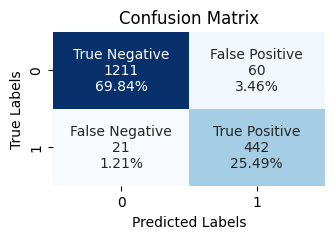




Confusion matrix

 [[1211   60]
 [  21  442]]

True Negatives  (TN) =  1211
False Positives (FP) =  60
False Negatives (FN) =  21
True Positives  (TP) =  442


Accuracy:        0.9532871972318339
Sensitivity:     0.9546436285097192
Specificity:     0.9527930763178599
Geometric Mean:  0.9537179035726547


Precision:        0.9555920310579011
Recall:           0.9532871972318339
f1-score:         0.9538672115432902

------------------------------------------------

Current Time: 2024-05-10 14:13:47
The entire notebook runtime so far is 1 minutes


In [99]:
# Create an instance of the DecisionTreeClassifier model
clf = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]                 #for reproducible results
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=cv_count,n_jobs=-1, verbose=verbosity)

# Fit the grid search to the training data
print(f"Performing grid_search to find optimal parameters")
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_scores = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Scores:", best_scores)

# Create a new instance of the model with the best hyperparameters
clf = DecisionTreeClassifier(**best_params)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# final cross validation
cross_val_score_result = cross_val_score(clf, X_train, y_train, cv=cv_count)
print(f"Cross validation scores: {cross_val_score_result}")
print(f"Mean cross validation score: {cross_val_score_result.mean()}")
print(f"Standard Deviation cross validation score: {cross_val_score_result.std()}")
dt_crossval_score_all  = cross_val_score_result         #save all folds in a list for later comparison
dt_crossval_score_mean = cross_val_score_result.mean()  #save mean   crossval score in a variable for later comparison
dt_crossval_score_std  = cross_val_score_result.std()   #save stddev crossval score in a variable for later comparison

# Evaluate the model
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy)

# save best parameters for later comparison
best_params_dt = best_params

# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_dt_optimized      = Accuracy
sensitivity_dt_optimized   = Sensitivity
specificity_dt_optimized   = Specificity
geometricmean_dt_optimized = GeometricMean
precision_dt_optimized     = Precision
recall_dt_optimized        = Recall
f1_dt_optimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

## Random Forest

### default params

Training model with default hyperparameters of: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Accuracy: 0.9504036908881199


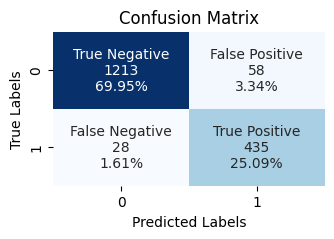




Confusion matrix

 [[1213   58]
 [  28  435]]

True Negatives  (TN) =  1213
False Positives (FP) =  58
False Negatives (FN) =  28
True Positives  (TP) =  435


Accuracy:        0.9504036908881199
Sensitivity:     0.9395248380129589
Specificity:     0.9543666404405979
Geometric Mean:  0.9469166612035742


Precision:        0.9520487533307868
Recall:           0.9504036908881199
f1-score:         0.9508857193501096

------------------------------------------------

Current Time: 2024-05-10 14:13:48
The entire notebook runtime so far is 1 minutes


In [100]:
# Create an instance of the RandomForestClassifier model
clf = RandomForestClassifier(n_jobs=-1, random_state=42)

default_params = clf.get_params()
print(f"Training model with default hyperparameters of: {default_params}")

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# save accuracy for later comparison
accuracy_rf_unoptimized = accuracy

# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_rf_unoptimized      = Accuracy
sensitivity_rf_unoptimized   = Sensitivity
specificity_rf_unoptimized   = Specificity
geometricmean_rf_unoptimized = GeometricMean
precision_rf_unoptimized     = Precision
recall_rf_unoptimized        = Recall
f1_rf_unoptimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

### optimized params
RF

The RandomForestClassifier() class in scikit-learn provides several parameters that can be adjusted to customize the random forest model. Here are some of the commonly used parameters:

- n_estimators: The number of trees in the forest. Higher values usually yield better performance, but also increase computational cost. The default is 100.
- criterion: The function used to measure the quality of a split. It can be 'gini' for the Gini impurity or 'entropy' for the information gain. The default is 'gini'.
- max_depth: The maximum depth of the tree. If None, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. The default is None.
- min_samples_split: The minimum number of samples required to split an internal node. The default is 2.
min_samples_leaf: The minimum number of samples required to be at a leaf node. The default is 1.
Vmax_features: The number of features to consider when looking for the best split. It can be 'auto' (sqrt(n_features)), 'sqrt' (sqrt(n_features)), 'log2' (log2(n_features)), or a number between 0 and 1 (fraction of total features). The default is 'auto'.
- bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree. The default is True.
- random_state: Seed used by the random number generator. It ensures reproducibility of results. Set to an integer for reproducible output. The default is None.
- n_jobs: The number of jobs to run in parallel for both fit and predict. -1 means using all processors. The default is 1.
- verbose: Controls the verbosity of the output. Set to an integer value greater than 0 for more verbosity. The default is 0.
- class_weight: Weights associated with classes. This can be used to handle class imbalance by assigning higher weights to minority classes.

Best Parameters: {'criterion': 'entropy', 'random_state': 42}
Best Scores: 0.946643987689219
Cross validation scores: [0.94986807 0.95514512 0.95640687 0.95904888 0.94848085 0.93659181
 0.93791281 0.9326288  0.94980185 0.94055482]
Mean cross validation score: 0.946643987689219
Standard Deviation cross validation score: 0.008694759361341316
Accuracy: 0.9527104959630911


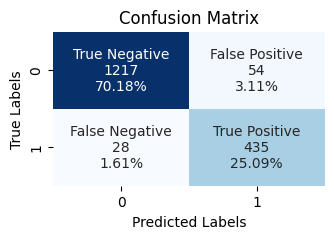




Confusion matrix

 [[1217   54]
 [  28  435]]

True Negatives  (TN) =  1217
False Positives (FP) =  54
False Negatives (FN) =  28
True Positives  (TP) =  435


Accuracy:        0.9527104959630911
Sensitivity:     0.9395248380129589
Specificity:     0.957513768686074
Geometric Mean:  0.9484766567607036


Precision:        0.9540290811351491
Recall:           0.9527104959630911
f1-score:         0.9531119143626776

------------------------------------------------

Current Time: 2024-05-10 14:13:56
The entire notebook runtime so far is 1 minutes


In [101]:
# Create an instance of the RandomForestClassifier model
clf = RandomForestClassifier(n_jobs=-1)

# Define the hyperparameters to tune
param_grid = {
    #'n_estimators': [100, 200, 300, 500],
    'criterion': ['gini', 'entropy'],
    #'max_depth': ['None', 5, 10],
    #'class_weight': ['None', 'balanced'],
    'random_state': [42]                 #for reproducible results
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=cv_count, n_jobs=-1, verbose=verbosity)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_scores = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Scores:", best_scores)

# Create a new instance of the model with the best hyperparameters
clf = RandomForestClassifier(**best_params)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# final cross validation
cross_val_score_result = cross_val_score(clf, X_train, y_train, cv=cv_count)
print(f"Cross validation scores: {cross_val_score_result}")
print(f"Mean cross validation score: {cross_val_score_result.mean()}")
print(f"Standard Deviation cross validation score: {cross_val_score_result.std()}")
rf_crossval_score_all  = cross_val_score_result         #save all folds in a list for later comparison
rf_crossval_score_mean = cross_val_score_result.mean()  #save mean   crossval score in a variable for later comparison
rf_crossval_score_std  = cross_val_score_result.std()   #save stddev crossval score in a variable for later comparison

# Evaluate the model
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy)

# save best parameters for later comparison
best_params_rf = best_params

# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_rf_optimized      = Accuracy
sensitivity_rf_optimized   = Sensitivity
specificity_rf_optimized   = Specificity
geometricmean_rf_optimized = GeometricMean
precision_rf_optimized     = Precision
recall_rf_optimized        = Recall
f1_rf_optimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

## Gradient Boosting

Gradient Boosting is a popular machine learning technique used for both regression and classification tasks. It is an ensemble learning method that builds a strong predictive model by combining the predictions of multiple weaker models, typically decision trees. Here's how gradient boosting works:

1. Base Learners (Weak Models): Gradient Boosting combines the predictions of multiple weak models, often decision trees, to create a strong predictive model. These weak models are referred to as base learners or weak learners.
2. Sequential Training: Gradient Boosting trains the weak models sequentially. Each new model is trained to correct the errors made by the previous models.
3. Loss Function: During training, Gradient Boosting minimizes a loss function, which measures the difference between the actual target values and the predicted values of the ensemble model. Common loss functions include mean squared error (MSE) for regression tasks and cross-entropy loss for classification tasks.
4. Gradient Descent Optimization: Gradient Boosting optimizes the loss function using gradient descent. In each iteration, the algorithm calculates the gradient of the loss function with respect to the current predictions and adjusts the predictions in the direction that minimizes the loss.
5. Gradient Boosting Algorithm:
- Initialize the ensemble model with a simple base learner (e.g., a decision stump).
- Train the base learner on the training data and calculate the residuals (the differences between the actual and predicted values).
- Fit a new base learner to the residuals, focusing on the areas where the previous model made errors.
- Combine the predictions of all base learners to make the final ensemble prediction.
- Repeat the process until a predefined number of base learners have been added, or until the loss function converges.
6. Regularization: Gradient Boosting typically includes regularization techniques to prevent overfitting, such as limiting the depth of the trees, adding shrinkage (learning rate), and using subsampling (training on random subsets of the data).
7. Hyperparameter Tuning: Gradient Boosting involves tuning several hyperparameters, such as the learning rate, tree depth, number of trees, and regularization parameters, to optimize the performance of the model.
8. Scalability: Gradient Boosting can handle large datasets and high-dimensional feature spaces. However, training time and memory usage can increase with the complexity of the model and the size of the dataset.


Overall, Gradient Boosting is a powerful and versatile technique that often achieves state-of-the-art performance on a wide range of machine learning tasks. It is widely used in practice due to its effectiveness and ease of implementation. Popular implementations of Gradient Boosting include XGBoost, LightGBM, and CatBoost.

### default params
GB

Training model with default hyperparameters of: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Accuracy: 0.9480968858131488


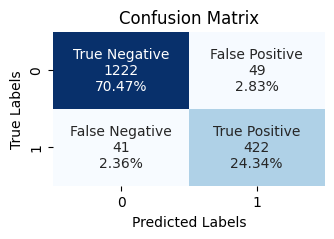




Confusion matrix

 [[1222   49]
 [  41  422]]

True Negatives  (TN) =  1222
False Positives (FP) =  49
False Negatives (FN) =  41
True Positives  (TP) =  422


Accuracy:        0.9480968858131488
Sensitivity:     0.9114470842332614
Specificity:     0.9614476789929189
Geometric Mean:  0.9361136061723132


Precision:        0.9484270891771339
Recall:           0.9480968858131488
f1-score:         0.9482372382325769

------------------------------------------------

Current Time: 2024-05-10 14:13:57
The entire notebook runtime so far is 1 minutes


In [102]:
# Create an instance of the model
clf = GradientBoostingClassifier(random_state=42)

default_params = clf.get_params()
print(f"Training model with default hyperparameters of: {default_params}")

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# save accuracy for later comparison
accuracy_gb_unoptimized = accuracy

# call previously defined function to create confusion matrix
cm = visualize_confusion_matrix(y_test, y_pred)

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

### optimized params
GB

Performing grid_search to find optimal parameters
Best Parameters: {'learning_rate': 1.0, 'max_depth': 3, 'n_estimators': 100, 'random_state': 42}
Best Scores: 0.94057033213316
Fitting the model with these parameters: {'learning_rate': 1.0, 'max_depth': 3, 'n_estimators': 100, 'random_state': 42}
Cross validation scores: [0.93667546 0.94591029 0.95376486 0.95376486 0.95376486 0.92998679
 0.9326288  0.92602378 0.94319683 0.92998679]
Mean cross validation score: 0.94057033213316
Standard Deviation cross validation score: 0.010351634592204083
Accuracy: 0.9452133794694348


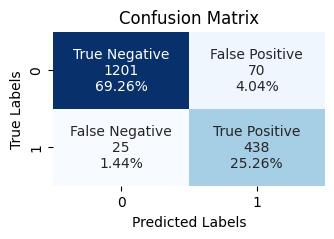




Confusion matrix

 [[1201   70]
 [  25  438]]

True Negatives  (TN) =  1201
False Positives (FP) =  70
False Negatives (FN) =  25
True Positives  (TP) =  438


Accuracy:        0.9452133794694348
Sensitivity:     0.9460043196544277
Specificity:     0.94492525570417
Geometric Mean:  0.9454646337366138


Precision:        0.9482601898101357
Recall:           0.9452133794694348
f1-score:         0.94598922237213

------------------------------------------------

Current Time: 2024-05-10 14:14:12
The entire notebook runtime so far is 1 minutes


In [103]:
# Create an instance of the model
clf = GradientBoostingClassifier()

#default_params = clf.get_params()
#print(f"Training model with default hyperparameters of: {default_params}")

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100],               #10,200 reduced accuracy
    'learning_rate': [0.1, 1.0],
    'max_depth': [3],                    #add higher numbers reduces accuracy
    'random_state': [42]                 #for reproducible results
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=cv_count, n_jobs=-1, verbose=verbosity)

# Fit the grid search to the training data
print(f"Performing grid_search to find optimal parameters")
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_scores = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Scores:", best_scores)

# Create a new instance of the model with the best hyperparameters
print(f"Fitting the model with these parameters: {best_params}")
clf = GradientBoostingClassifier(**best_params)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# final cross validation
cross_val_score_result = cross_val_score(clf, X_train, y_train, cv=cv_count)
print(f"Cross validation scores: {cross_val_score_result}")
print(f"Mean cross validation score: {cross_val_score_result.mean()}")
print(f"Standard Deviation cross validation score: {cross_val_score_result.std()}")
gb_crossval_score_all  = cross_val_score_result         #save all folds in a list for later comparison
gb_crossval_score_mean = cross_val_score_result.mean()  #save mean   crossval score in a variable for later comparison
gb_crossval_score_std  = cross_val_score_result.std()   #save stddev crossval score in a variable for later comparison

# Evaluate the model
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy)

# save best parameters for later comparison
best_params_gb = best_params

# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_gb_optimized      = Accuracy
sensitivity_gb_optimized   = Sensitivity
specificity_gb_optimized   = Specificity
geometricmean_gb_optimized = GeometricMean
precision_gb_optimized     = Precision
recall_gb_optimized        = Recall
f1_gb_optimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

# Compare accuracy of LR, NB, KNN, SVM, DT, GB, RF

In [104]:
# this section compares the accuracy of different methods:

from tabulate import tabulate
# Define headers for the table
headers = ["Model", "Accuracy Un-optimized", "Accuracy Optimized"]
# Define data for the trable
data = [
    ["LR",  accuracy_lr_unoptimized,   accuracy_lr_optimized],
    ["NB",  accuracy_nb_unoptimized,   accuracy_nb_optimized],
    ["KNN", accuracy_knn_unoptimized,  accuracy_knn_optimized],
    ["SVM", accuracy_svm_unoptimized,  accuracy_svm_optimized],
    ["DT",  accuracy_dt_unoptimized,   accuracy_dt_optimized],
    ["RF",  accuracy_rf_unoptimized,   accuracy_rf_optimized],
    ["GB",  accuracy_gb_unoptimized,   accuracy_gb_optimized]
]

# Round all floats in the data list to 4 decimal places
data_rounded = [[elem if isinstance(elem, str) else round(elem, 4) for elem in row] for row in data]

# Generate the table
table = tabulate(data_rounded, headers=headers, tablefmt="fancy_grid")

# Print the table
print(table)


# sanity checks to confirm that hyperparameter optimization did not make things worse instead of better
if accuracy_lr_unoptimized  > accuracy_lr_optimized:  print("WARNING: LR optimization made the accuracy worse, please tweak hyperparameters")
if accuracy_nb_unoptimized  > accuracy_nb_optimized:  print("WARNING: NB optimization made the accuracy worse, please tweak hyperparameters")
if accuracy_knn_unoptimized > accuracy_knn_optimized: print("WARNING: KNN optimization made the accuracy worse, please tweak hyperparameters")
if accuracy_svm_unoptimized > accuracy_svm_optimized: print("WARNING: SVM optimization made the accuracy worse, please tweak hyperparameters")
if accuracy_dt_unoptimized  > accuracy_dt_optimized:  print("WARNING: DT optimization made the accuracy worse, please tweak hyperparameters")
if accuracy_rf_unoptimized  > accuracy_rf_optimized:  print("WARNING: RF optimization made the accuracy worse, please tweak hyperparameters")
if accuracy_gb_unoptimized  > accuracy_gb_optimized:  print("WARNING: GB optimization made the accuracy worse, please tweak hyperparameters")


╒═════════╤═════════════════════════╤══════════════════════╕
│ Model   │   Accuracy Un-optimized │   Accuracy Optimized │
╞═════════╪═════════════════════════╪══════════════════════╡
│ LR      │                  0.876  │               0.876  │
├─────────┼─────────────────────────┼──────────────────────┤
│ NB      │                  0.763  │               0.763  │
├─────────┼─────────────────────────┼──────────────────────┤
│ KNN     │                  0.8356 │               0      │
├─────────┼─────────────────────────┼──────────────────────┤
│ SVM     │                  0      │               0      │
├─────────┼─────────────────────────┼──────────────────────┤
│ DT      │                  0.9343 │               0.9533 │
├─────────┼─────────────────────────┼──────────────────────┤
│ RF      │                  0.9504 │               0.9527 │
├─────────┼─────────────────────────┼──────────────────────┤
│ GB      │                  0.9481 │               0.9452 │
╘═════════╧═════════════

# Model training with Deep Learning classifiers

## MLP Multi-Layer Perceptron

MLPClassifier is a class in scikit-learn that represents a Multi-layer Perceptron (MLP) classifier, which is a type of artificial neural network.

An MLP is a feedforward neural network that consists of multiple layers of nodes (neurons) and can learn complex patterns and relationships in data.

The MLPClassifier is specifically designed for classification tasks.

Example of all hyperparameters:
- hidden_layer_sizes=(100, 50),  # Architecture of hidden layers
- activation='relu',             # Activation function ('relu' is common)
- solver='adam',                 # Optimization solver
- alpha=0.0001,                  # L2 penalty (regularization)
- batch_size='auto',             # Size of mini-batches ('auto' is adaptive)
- learning_rate='constant',      # Learning rate schedule
- learning_rate_init=0.001,      # Initial learning rate
- max_iter=500,                  # Maximum number of iterations
- shuffle=True,                  # Shuffle data in each iteration
- random_state=42,               # Random seed for reproducibility
- verbose=True                   # Print progress during training


Multi-Layer Perceptron (MLP) classifier with three or more hidden layers is typically considered a deep learning model. The term "deep" in deep learning refers to the presence of multiple layers in the neural network architecture. While there's no strict definition of how many layers constitute a "deep" network, models with three or more hidden layers are commonly regarded as deep neural networks.

MLP classifiers, being feedforward neural networks (FNN) with multiple layers, can learn complex patterns and representations from data, making them suitable for various classification tasks. The depth of the network allows it to learn hierarchical features and capture intricate relationships within the data, leading to improved performance on tasks with large and complex datasets.

https://en.wikipedia.org/wiki/Feedforward_neural_network
A feedforward neural network (FNN) is one of the two broad types of artificial neural network, characterized by direction of the flow of information between its layers.[2] Its flow is uni-directional, meaning that the information in the model flows in only one direction—forward—from the input nodes, through the hidden nodes (if any) and to the output nodes, without any cycles or loops,[2] in contrast to recurrent neural networks,[3] which have a bi-directional flow. Modern feedforward networks are trained using the backpropagation method[4][5][6][7][8] and are colloquially referred to as the "vanilla" neural networks.[9]







In [105]:
# Sanity check to confirm X_train and y_train have equal number of samples
print(f"X_train has ", len(X_train), "samples")
print(f"y_train has ", len(y_train), "samples")
if ( len(X_train) != len(y_train) ):
  raise ValueError ("X_train and y_train are different lengths, please investigate!")


X_train has  7572 samples
y_train has  7572 samples


### default params
MLP


Training model with default hyperparameters of: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
-----------------------------------------
Training Accuracy: 0.8563127311146329
Test Accuracy: 0.8794694348327566
Validation Accuracy: 0.8823529411764706
-----------------------------------------


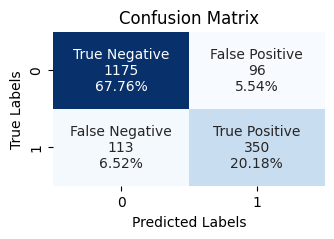




Confusion matrix

 [[1175   96]
 [ 113  350]]

True Negatives  (TN) =  1175
False Positives (FP) =  96
False Negatives (FN) =  113
True Positives  (TP) =  350


Accuracy:        0.8794694348327566
Sensitivity:     0.755939524838013
Specificity:     0.9244689221085759
Geometric Mean:  0.8359680602189696


Precision:        0.8782193003472993
Recall:           0.8794694348327566
f1-score:         0.8787427168721299

------------------------------------------------

Current Time: 2024-05-10 14:14:18
The entire notebook runtime so far is 1 minutes


In [106]:
# Create an instance of the model
clf = MLPClassifier(random_state=42)   #hidden_layer_sizes can be added here as tuples, see hyperparameter cell for an example

default_params = clf.get_params()
print(f"Training model with default hyperparameters of: {default_params}")

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the model on training data
print(f"-----------------------------------------")
train_accuracy = clf.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on test data
test_accuracy = clf.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Evaluate the model on val data
val_accuracy = clf.score(X_val, y_val)
print("Validation Accuracy:", val_accuracy)
print(f"-----------------------------------------")

# save results calculated for this model for later comparison to other models
test_accuracy_mlp_unoptimized  = test_accuracy
train_accuracy_mlp_unoptimized = train_accuracy
val_accuracy_mlp_unoptimized   = val_accuracy

# save accuracy for later comparison
accuracy_mlp_unoptimized = accuracy

# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_mlp_unoptimized      = Accuracy
sensitivity_mlp_unoptimized   = Sensitivity
specificity_mlp_unoptimized   = Specificity
geometricmean_mlp_unoptimized = GeometricMean
precision_mlp_unoptimized     = Precision
recall_mlp_unoptimized        = Recall
f1_mlp_unoptimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

### optimized params
MLP

Performing grid_search to find optimal parameters
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200, 'random_state': 42}
Best Scores: 0.8503699856746009
Fitting the model with best_params {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200, 'random_state': 42}
Cross validation scores: [0.83641161 0.86279683 0.87318362 0.84940555 0.85336856 0.8348745
 0.84544254 0.8348745  0.86922061 0.84412153]
Mean cross validation score: 0.8503699856746009
Standard Deviation cross validation score: 0.013336172761137707
-----------------------------------------
Training Accuracy: 0.8563127311146329
Test Accuracy: 0.8794694348327566
Validation Accuracy: 0.8823529411764706
-----------------------------------------


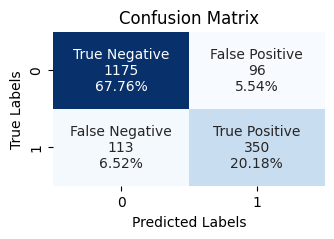




Confusion matrix

 [[1175   96]
 [ 113  350]]

True Negatives  (TN) =  1175
False Positives (FP) =  96
False Negatives (FN) =  113
True Positives  (TP) =  350


Accuracy:        0.8794694348327566
Sensitivity:     0.755939524838013
Specificity:     0.9244689221085759
Geometric Mean:  0.8359680602189696


Precision:        0.8782193003472993
Recall:           0.8794694348327566
f1-score:         0.8787427168721299

------------------------------------------------

Current Time: 2024-05-10 14:15:14
The entire notebook runtime so far is 2 minutes


In [107]:

# Create an instance of the model
clf = MLPClassifier()

# Define the hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(100,)],  #also tried (64,32)), (64,32,16), (128,64,32) as tuples for hidden layers, but default (100,) was best
    'max_iter': [200],                        # also tried 100, 300
    'alpha': [0.0001],                        #also tried 0.001, 0.01
    'activation': ['relu'],                   #also tried tanh
    'learning_rate': ['constant'],            #also tried adaptive
    'random_state': [42]                      #for reproducible results
}



# Create an instance of GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=cv_count, n_jobs=-1, verbose=verbosity)

# Fit the grid search to the training data
print(f"Performing grid_search to find optimal parameters")
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_scores = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Scores:", best_scores)

# Create a new instance of the model with the best hyperparameters
clf = MLPClassifier(**best_params)

# Fit the model to the training data
print(f"Fitting the model with best_params {best_params}")
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# final cross validation
cross_val_score_result = cross_val_score(clf, X_train, y_train, cv=cv_count)
print(f"Cross validation scores: {cross_val_score_result}")
print(f"Mean cross validation score: {cross_val_score_result.mean()}")
print(f"Standard Deviation cross validation score: {cross_val_score_result.std()}")
mlp_crossval_score_all  = cross_val_score_result         #save all folds in a list for later comparison
mlp_crossval_score_mean = cross_val_score_result.mean()  #save mean   crossval score in a variable for later comparison
mlp_crossval_score_std  = cross_val_score_result.std()   #save stddev crossval score in a variable for later comparison

# Evaluate the model on training data
print(f"-----------------------------------------")
train_accuracy = clf.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on test data
test_accuracy = clf.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Evaluate the model on val data
val_accuracy = clf.score(X_val, y_val)
print("Validation Accuracy:", val_accuracy)
print(f"-----------------------------------------")

# save results calculated for this model for later comparison to other models
test_accuracy_mlp_optimized  = test_accuracy
train_accuracy_mlp_optimized = train_accuracy
val_accuracy_mlp_optimized   = val_accuracy


# save best parameters for later comparison
best_params_mlp = best_params

# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_mlp_optimized      = Accuracy
sensitivity_mlp_optimized   = Sensitivity
specificity_mlp_optimized   = Specificity
geometricmean_mlp_optimized = GeometricMean
precision_mlp_optimized     = Precision
recall_mlp_optimized        = Recall
f1_mlp_optimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

## Sequential FNN
(does not require time steps)



In the context of the Keras library, Sequential() is not a classifier itself, but rather a type of model architecture. It is used to create sequential models, which are a linear stack of layers.

These models are typically used for building feedforward neural networks (FNNs), where the data flows sequentially from the input layer through one or more hidden layers to the output layer. Each layer in a sequential model has connections only to the layers that follow it in the model.

You can use different types of layers such as Dense, Dropout, Conv1D, Conv2D, LSTM, etc., in a Sequential() model depending on the type of problem you are solving. Once the layers are added to the model, you compile it with an optimizer, a loss function, and optionally, performance metrics. After compilation, you can train the model on your data using the fit() method.

In [108]:
# row, columns in X_train
print(X_train.shape)

(7572, 32)


In [109]:
# sanity check
print(X_train)

[[-0.04076997 -0.04303884 -0.28286262 ... -0.16764816 -0.166395
  -0.01149273]
 [-0.04076997 -0.04303884 -0.28286262 ... -0.16764816 -0.166395
  -0.01149273]
 [-0.04076997 -0.04303884 -0.28286262 ... -0.16764816 -0.166395
  -0.01149273]
 ...
 [-0.04076997 -0.04303884 -0.28286262 ... -0.16764816 -0.166395
  -0.01149273]
 [-0.04076997 -0.04303884 -0.28286262 ... -0.16764816 -0.166395
  -0.01149273]
 [-0.04076997 -0.04303884 -0.28286262 ...  5.96487302 -0.166395
  -0.01149273]]


In [110]:
# Sanity check to confirm X_train and y_train have equal number of samples
print(f"X_train has ", len(X_train), "samples")
print(f"y_train has ", len(y_train), "samples")
if ( len(X_train) != len(y_train) ):
  raise ValueError ("X_train and y_train are different lengths, please investigate!")


X_train has  7572 samples
y_train has  7572 samples


### default params

-----------------------------------------
Model Summary
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4225 (16.50 KB)
Trainable params: 4225 (16.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
-----------------------------------------
Training the model
Epoch 1/25
190/190 [============

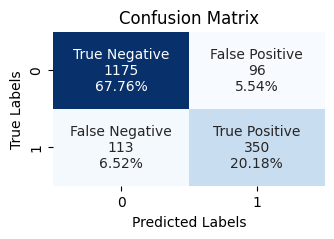




Confusion matrix

 [[1175   96]
 [ 113  350]]

True Negatives  (TN) =  1175
False Positives (FP) =  96
False Negatives (FN) =  113
True Positives  (TP) =  350


Accuracy:        0.8794694348327566
Sensitivity:     0.755939524838013
Specificity:     0.9244689221085759
Geometric Mean:  0.8359680602189696


Precision:        0.8782193003472993
Recall:           0.8794694348327566
f1-score:         0.8787427168721299

------------------------------------------------

Current Time: 2024-05-10 14:15:28
The entire notebook runtime so far is 2 minutes


In [111]:
# to-do: add another dropout after dense(32), and another dense layer with 16 neurons

# Sequential (prior to optimization) -- Backup

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define input shape based on the features in X_train
input_shape = X_train.shape[1]

# Define the model
model = Sequential([                                           #Initializes a sequential neural network model
    Dense(64, activation='relu', input_shape=(input_shape,)),  #Add a fully connected layer (also known as a dense layer) with 64 neurons
    Dropout(0.5),                                              #Optional dropout layer for regularization to randomly sets a fraction of input units to zero during training to prevent overfitting
    Dense(32, activation='relu'),                              #Adds another fully connected layer with 32 neurons and ReLU activation function.
    Dense(1, activation='sigmoid')                             # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
print(f"-----------------------------------------")
print(f"Model Summary")
print(model.summary())

# Train the model
print(f"-----------------------------------------")
print(f"Training the model")
history = model.fit(X_train, y_train, epochs=epoch_count, batch_size=32, validation_split=0.2)

# Evaluate the model on training data
print(f"-----------------------------------------")
print(f"Evaluating the model on training data")
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)


# Evaluate the model on test data
print(f"-----------------------------------------")
print(f"Evaluating the model on test data")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


# Evaluate the model on validation data
print(f"-----------------------------------------")
print(f"Evaluating the model on validation data")
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Val Loss:", val_loss)
print("Val Accuracy:", val_accuracy)
print(f"-----------------------------------------")


# save results calculated for this model for later comparison to other models
test_accuracy_sequential_unoptimized  = test_accuracy
test_loss_sequential_unoptimized      = test_loss
train_accuracy_sequential_unoptimized = train_accuracy
train_loss_sequential_unoptimized     = train_loss
val_accuracy_sequential_unoptimized   = val_accuracy
val_loss_sequential_unoptimized       = val_loss

# Extracting accuracy and loss history from the training, will be used later for graphing convergence
train_loss_history_unoptimized     = history.history['loss']
train_accuracy_history_unoptimized = history.history['accuracy']
val_loss_history_unoptimized       = history.history['val_loss']
val_accuracy_history_unoptimized   = history.history['val_accuracy']

# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_sequential_unoptimized      = Accuracy
sensitivity_sequential_unoptimized   = Sensitivity
specificity_sequential_unoptimized   = Specificity
geometricmean_sequential_unoptimized = GeometricMean
precision_sequential_unoptimized     = Precision
recall_sequential_unoptimized        = Recall
f1_sequential_unoptimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

In [112]:
# row, columns in X_train
print(X_train.shape)

(7572, 32)


In [113]:
# # no better than previous cell

# # Sequential (prior to optimization) -- New test - Backup stable version - with validation


# # Define input shape based on the features in X_train
# input_shape = X_train.shape[1]


# # Define the model
# model = Sequential([                                           #Initializes a sequential neural network model
#     Dense(64, activation='relu', input_shape=(input_shape,)),  #Add a fully connected layer (also known as a dense layer) with 64 neurons
#     Dropout(0.5),                                              #Optional dropout layer for regularization to randomly sets a fraction of input units to zero during training to prevent overfitting
#     Dense(32, activation='tanh'),                              #Adds another fully connected layer with 32 neurons and RtanheLU activation function.
#     Dense(1, activation='sigmoid')                             # Output layer with sigmoid activation for binary classification
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # Print model summary
# print(f"-----------------------------------------")
# print(f"Model Summary")
# print(model.summary())

# # Train the model
# print(f"-----------------------------------------")
# print(f"Training the model")
# history = model.fit(X_train, y_train, epochs=epoch_count, batch_size=32, validation_data=(X_val, y_val))

# # Evaluate the model on training data
# print(f"-----------------------------------------")
# print(f"Evaluating the model on training data")
# train_loss, train_accuracy = model.evaluate(X_train, y_train)
# print("Training Loss:", train_loss)
# print("Training Accuracy:", train_accuracy)


# # Evaluate the model on test data
# print(f"-----------------------------------------")
# print(f"Evaluating the model on test data")
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print("Test Loss:", test_loss)
# print("Test Accuracy:", test_accuracy)


# # save results calculated for this model for later comparison to other models
# test_accuracy_sequential_unoptimized  = test_accuracy
# test_loss_sequential_unoptimized      = test_loss
# train_accuracy_sequential_unoptimized = train_accuracy
# train_loss_sequential_unoptimized     = train_loss

# # call previously defined function to create confusion matrix
# cm = visualize_confusion_matrix(y_test, y_pred)

# # show a running total of elapsed time for the entire notebook
# show_elapsed_time()

In [114]:
# # no better than previous cell

# # Sequential (prior to optimization) -- New test


# # Define input shape based on the features in X_train
# input_shape = X_train.shape[1]

# # Define the model
# model = Sequential([
#     Dense(128, activation='relu', input_shape=(input_shape,)),
#     Dropout(0.5),  # Optional dropout layer for regularization
#     Dense(64, activation='tanh'),
#     Dropout(0.5),
#     Dense(32, activation='tanh'),
#     Dropout(0.5),
#     Dense(16, activation='tanh'),   # add another hidden layer
#     Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # Print model summary
# print(f"-----------------------------------------")
# print(f"Model Summary")
# print(model.summary())

# # Train the model
# print(f"-----------------------------------------")
# print(f"Training the model")
# history = model.fit(X_train, y_train, epochs=epoch_count, batch_size=32, validation_data=(X_val, y_val))

# # Evaluate the model on training data
# print(f"-----------------------------------------")
# print(f"Evaluating the model on training data")
# train_loss, train_accuracy = model.evaluate(X_train, y_train)
# print("Training Loss:", train_loss)
# print("Training Accuracy:", train_accuracy)


# # Evaluate the model on test data
# print(f"-----------------------------------------")
# print(f"Evaluating the model on test data")
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print("Test Loss:", test_loss)
# print("Test Accuracy:", test_accuracy)


# # save results calculated for this model for later comparison to other models
# test_accuracy_sequential_unoptimized  = test_accuracy
# test_loss_sequential_unoptimized      = test_loss
# train_accuracy_sequential_unoptimized = train_accuracy
# train_loss_sequential_unoptimized     = train_loss

# # call previously defined function to create confusion matrix
# cm = visualize_confusion_matrix(y_test, y_pred)

# # show a running total of elapsed time for the entire notebook
# show_elapsed_time()

In [115]:
# # no better than previous cell

# # Test FNN on different activation functions:

# # Define a list of activation functions to test
# activation_functions = ['sigmoid', 'linear', 'tanh', 'relu']
# activation_functions = ['relu']  #after testing, relu was the best

# # Dictionary to store results
# results = {'Activation Function': [],
#            'Train Loss': [],
#            'Train Accuracy': [],
#            'Test Loss': [],
#            'Test Accuracy': []}

# # Define input shape based on the features in X_train
# input_shape = X_train.shape[1]

# for activation_function in activation_functions:
#     # Define the model
#     model = Sequential([
#         Dense(64, activation=activation_function, input_shape=(input_shape,)),
#         Dropout(0.5),  # Optional dropout layer for regularization
#         Dense(32, activation=activation_function),
#         Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
#     ])

#     # Compile the model
#     model.compile(optimizer='adam',
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])

#     # Print model summary
#     print(f"-----------------------------------------")
#     print(f"Model Summary - Activation Function: {activation_function}")
#     print(model.summary())

#     # Train the model
#     print(f"-----------------------------------------")
#     print(f"Training the model - Activation Function: {activation_function}")
#     history = model.fit(X_train, y_train, epochs=epoch_count, batch_size=32, validation_split=0.2)

#     # Evaluate the model on training data
#     print(f"-----------------------------------------")
#     print(f"Evaluating the model on training data - Activation Function: {activation_function}")
#     train_loss, train_accuracy = model.evaluate(X_train, y_train)
#     print("Training Loss:", train_loss)
#     print("Training Accuracy:", train_accuracy)

#     # Evaluate the model on test data
#     print(f"-----------------------------------------")
#     print(f"Evaluating the model on test data - Activation Function: {activation_function}")
#     test_loss, test_accuracy = model.evaluate(X_test, y_test)
#     print("Test Loss:", test_loss)
#     print("Test Accuracy:", test_accuracy)

#     # Save results
#     results['Activation Function'].append(activation_function)
#     results['Train Loss'].append(train_loss)
#     results['Train Accuracy'].append(train_accuracy)
#     results['Test Loss'].append(test_loss)
#     results['Test Accuracy'].append(test_accuracy)

# # Convert results to a DataFrame
# results_df = pd.DataFrame(results)

# # Print results DataFrame
# print(results_df)

# # call previously defined function to create confusion matrix
# cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# # show a running total of elapsed time for the entire notebook
# show_elapsed_time()

In [116]:
# show a running total of elapsed time for the entire notebook
show_elapsed_time()

Current Time: 2024-05-10 14:15:28
The entire notebook runtime so far is 2 minutes


### optimized params
FNN

In [117]:
# Sanity check to confirm X_train and y_train have equal number of samples
print(f"X_train has ", len(X_train), "samples")
print(f"y_train has ", len(y_train), "samples")
if ( len(X_train) != len(y_train) ):
  raise ValueError ("X_train and y_train are different lengths, please investigate!")


X_train has  7572 samples
y_train has  7572 samples


--------------------------------------------------
Performing GridSearchCV to find optimal parameters
24/24 [==============================] - 0s 1ms/step
Best Parameters: {'activation': 'tanh', 'dropout': 0.3, 'units': 32}
Best Accuracy: 0.8494449343506341


-----------------------------------------
Cross validation scores: [0.83641161 0.86279683 0.87318362 0.84940555 0.85336856 0.8348745
 0.84544254 0.8348745  0.86922061 0.84412153]
Mean cross validation score: 0.8503699856746009
Standard Deviation cross validation score: 0.013336172761137707
-----------------------------------------
Evaluating the model on training data
237/237 [==============================] - 0s 2ms/step - loss: 0.2806 - accuracy: 0.8549
Train Loss: 0.2806130051612854
Train Accuracy: 0.8548600077629089
-----------------------------------------
Evaluating the model on test data
55/55 [==============================] - 0s 1ms/step - loss: 0.2706 - accuracy: 0.8858
Test Loss: 0.27064400911331177
Test Accuracy: 0.885

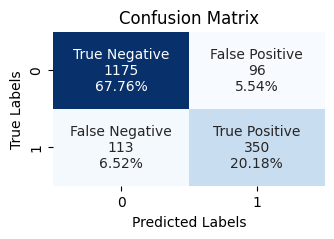




Confusion matrix

 [[1175   96]
 [ 113  350]]

True Negatives  (TN) =  1175
False Positives (FP) =  96
False Negatives (FN) =  113
True Positives  (TP) =  350


Accuracy:        0.8794694348327566
Sensitivity:     0.755939524838013
Specificity:     0.9244689221085759
Geometric Mean:  0.8359680602189696


Precision:        0.8782193003472993
Recall:           0.8794694348327566
f1-score:         0.8787427168721299

------------------------------------------------

Current Time: 2024-05-10 14:18:01
The entire notebook runtime so far is 5 minutes


In [118]:
# perform Sequential hyperparameter optimization

# Define a function to create a model
def create_model(units=64, dropout=0.5):
    model = Sequential([
        Dense(units, activation='relu', input_shape=(input_shape,)),
        Dropout(dropout),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define input shape based on the features in X_train
input_shape = X_train.shape[1]

# Create a wrapper class around the Keras model
class KerasClassifierWrapper:
    def __init__(self, units=64, dropout=0.5, epochs=epoch_count, batch_size=32, verbose=0):
        self.units = units
        self.dropout = dropout
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None

    def fit(self, X, y):
        self.model = create_model(units=self.units, dropout=self.dropout)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)

    def get_params(self, deep=True):
        return {
            'units': self.units,
            'dropout': self.dropout,
            'epochs': self.epochs,
            'batch_size': self.batch_size,
            'verbose': self.verbose
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

# Create an instance of the wrapper class
model = KerasClassifierWrapper()

# Define the hyperparameters grid to search
param_grid = {
    'units': [32],      #also tried 64,128
    'dropout': [0.3],   #also tried 0.5, 0.7
    'activation': ['tanh'] # relu almost as good as tanh ,also tried sigmoid and linear, but accuracy was lower
}
#param_grid = {           #smaller faster version for debugging
#    'units': [32],
#    'dropout': [0.3]
#}

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_count, scoring=make_scorer(accuracy_score), verbose=verbosity)

# Perform grid search
print(f"--------------------------------------------------")
print(f"Performing GridSearchCV to find optimal parameters")
grid_search_result = grid_search.fit(X_train, y_train)

# Print best parameters and results
print("Best Parameters:", grid_search_result.best_params_)
print("Best Accuracy:", grid_search_result.best_score_)
print('\n')

# final cross validation
cross_val_score_result = cross_val_score(clf, X_train, y_train, cv=cv_count)
print(f"-----------------------------------------")
print(f"Cross validation scores: {cross_val_score_result}")
print(f"Mean cross validation score: {cross_val_score_result.mean()}")
print(f"Standard Deviation cross validation score: {cross_val_score_result.std()}")
sequential_crossval_score_all  = cross_val_score_result         #save all folds in a list for later comparison
sequential_crossval_score_mean = cross_val_score_result.mean()  #save mean   crossval score in a variable for later comparison
sequential_crossval_score_std  = cross_val_score_result.std()   #save stddev crossval score in a variable for later comparison

# Evaluate the best model on training data
print(f"-----------------------------------------")
print(f"Evaluating the model on training data")
best_model = grid_search_result.best_estimator_
train_loss, train_accuracy = best_model.model.evaluate(X_train, y_train)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)


# Evaluate the best model on test data
print(f"-----------------------------------------")
print(f"Evaluating the model on test data")
best_model = grid_search_result.best_estimator_
test_loss, test_accuracy = best_model.model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Evaluate the best model on validation data
print(f"-----------------------------------------")
print(f"Evaluating the model on validation data")
best_model = grid_search_result.best_estimator_
val_loss, val_accuracy = best_model.model.evaluate(X_val, y_val)
print("Val Loss:", val_loss)
print("Val Accuracy:", val_accuracy)
print(f"-----------------------------------------")


# save results calculated for this model for later comparison to other models
test_accuracy_sequential_optimized  = test_accuracy
test_loss_sequential_optimized      = test_loss
train_accuracy_sequential_optimized = train_accuracy
train_loss_sequential_optimized     = train_loss
val_accuracy_sequential_optimized   = val_accuracy
val_loss_sequential_optimized       = val_loss

# Extracting accuracy and loss history from the training, will be used later for graphing convergence
train_loss_history_optimized     = history.history['loss']
train_accuracy_history_optimized = history.history['accuracy']
val_loss_history_optimized       = history.history['val_loss']
val_accuracy_history_optimized   = history.history['val_accuracy']

# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_sequential_optimized      = Accuracy
sensitivity_sequential_optimized   = Sensitivity
specificity_sequential_optimized   = Specificity
geometricmean_sequential_optimized = GeometricMean
precision_sequential_optimized     = Precision
recall_sequential_optimized        = Recall
f1_sequential_optimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

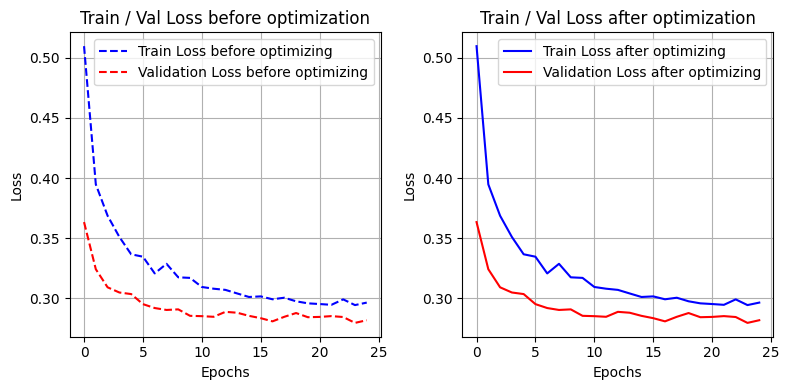

WARNING, after optimization, loss divergence is 0.014659583568572998, which greater than threshold of 0.01, please continue tuning this model.


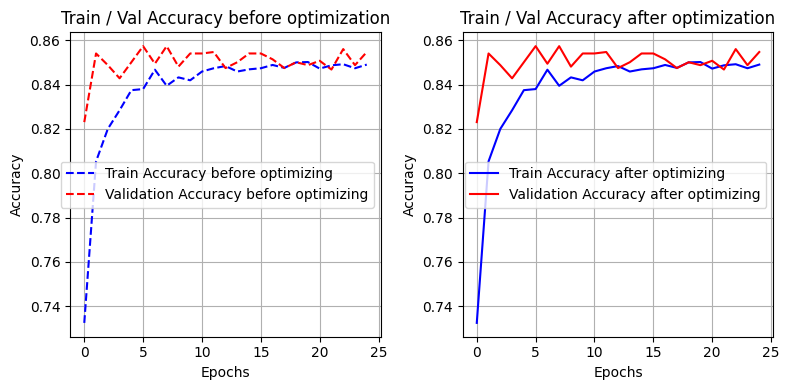

After optimization, accuracy divergence is 0.006, which is <= threshold of 0.01, this model has acceptable accuracy.


In [119]:
# Call previously defined fuctions to create graphs that show how Training/Validation loss and accuracy converge
# It is important that the lines converge, if they do not, add more data, more epochs, or try different hyperparameter optimizations
plot_loss_history(train_loss_history_unoptimized, train_loss_history_optimized, val_loss_history_unoptimized, val_loss_history_optimized, epoch_count)
plot_accuracy_history(train_accuracy_history_unoptimized, train_accuracy_history_optimized, val_accuracy_history_unoptimized, val_accuracy_history_optimized, epoch_count)

In [120]:
# show a running total of elapsed time for the entire notebook
show_elapsed_time()

Current Time: 2024-05-10 14:18:02
The entire notebook runtime so far is 5 minutes


## Sequential FNN + LSTM

### default params

In [121]:
# It’s important to note that LSTM models can be computationally expensive to train.
# Depending on the size of your data and complexity of your model, training may take a significant amount of time.

# NOTE: training the model with model.fit()  is ~10x faster when using a GPU!!

-----------------------------------------
Compiling model
-----------------------------------------
Model Summary
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32, 64)            16896     
                                                                 
 dropout_12 (Dropout)        (None, 32, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_36 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29345 (114.63 KB)
Trainable params: 29345 (114.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
----------------------------

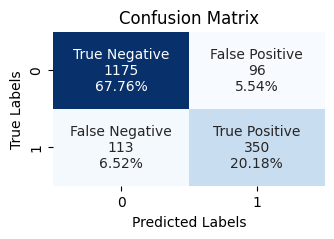




Confusion matrix

 [[1175   96]
 [ 113  350]]

True Negatives  (TN) =  1175
False Positives (FP) =  96
False Negatives (FN) =  113
True Positives  (TP) =  350


Accuracy:        0.8794694348327566
Sensitivity:     0.755939524838013
Specificity:     0.9244689221085759
Geometric Mean:  0.8359680602189696


Precision:        0.8782193003472993
Recall:           0.8794694348327566
f1-score:         0.8787427168721299

------------------------------------------------

Current Time: 2024-05-10 14:20:30
The entire notebook runtime so far is 7 minutes


In [122]:
# FNN-LSTM


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define input shape based on the features in X_train
input_shape = X_train.shape[1]

# Define the model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(input_shape, 1), return_sequences=True),
    Dropout(0.5),  # Optional dropout layer for regularization
    LSTM(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
print(f"-----------------------------------------")
print(f"Compiling model")
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
print(f"-----------------------------------------")
print(f"Model Summary")
print(model.summary())

# Train the model
print(f"-----------------------------------------")
print(f"Training the model")
history = model.fit(X_train, y_train, epochs=epoch_count, batch_size=32, validation_split=0.2)

# Evaluate the model on training data
print(f"-----------------------------------------")
print(f"Evaluating the model on training data")
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)


# Evaluate the model on test data
# Now that we have trained our LSTM model, it’s time to evaluate its performance.
# In TensorFlow, we can do this by using the `evaluate()` method of the model object.
#
# First, we need to load the test data and preprocess it in the same way as we did for the training data.
# Once we have preprocessed the test data, we can evaluate the model using the `evaluate()` method.
# This method takes two arguments: the test data (X_test) and its corresponding labels (y_test).
# Evaluate the model on test data


# Evaluate the model on test data
print(f"-----------------------------------------")
print(f"Evaluating the model on test data")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


# Evaluate the model on validation data
print(f"-----------------------------------------")
print(f"Evaluating the model on validation data")
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Val Loss:", val_loss)
print("Val Accuracy:", val_accuracy)
print(f"-----------------------------------------")

#
# The `evaluate()` method returns two values: the loss and accuracy of the model on the test data.
# The loss is a measure of how well the model is able to predict the correct output, while the accuracy is a measure of how often the model is correct.
#
# It’s important to note that we should only use the test data for evaluation purposes and not for training.
# Using the same data for both training and evaluation can lead to overfitting, where the model performs well on the training data but poorly on new, unseen data.
#
# In addition to evaluating the overall performance of our model, we can also look at individual predictions using the `predict()` method.
# This method takes a single input example and returns its predicted output.
#
## Make a prediction on a single input example
#example = ...
#prediction = model.predict(preprocess_data(example))
#
# By examining individual predictions, we can gain insights into how our model is making decisions and identify areas where it may be making errors.
# This can help us improve our model and make it more accurate for future predictions.


# save results calculated for this model for later comparison to other models
test_accuracy_lstm_unoptimized  = test_accuracy
test_loss_lstm_unoptimized      = test_loss
train_accuracy_lstm_unoptimized = train_accuracy
train_loss_lstm_unoptimized     = train_loss
val_accuracy_lstm_unoptimized   = val_accuracy
val_loss_lstm_unoptimized       = val_loss


# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_lstm_unoptimized      = Accuracy
sensitivity_lstm_unoptimized   = Sensitivity
specificity_lstm_unoptimized   = Specificity
geometricmean_lstm_unoptimized = GeometricMean
precision_lstm_unoptimized     = Precision
recall_lstm_unoptimized        = Recall
f1_lstm_unoptimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

In [123]:
# show a running total of elapsed time for the entire notebook
show_elapsed_time()

Current Time: 2024-05-10 14:20:30
The entire notebook runtime so far is 7 minutes


### optimized params
FNN + LSTM


Looping through all combinations of hyperparameters
Evaluating model with units=32, dropout=0.3
Validation Accuracy: 0.7946943640708923

Best parameters: {'units': 32, 'dropout': 0.3}
Training the final model with the best parameters...
-----------------------------------------
Cross validation scores: [0.83641161 0.86279683 0.87318362 0.84940555 0.85336856 0.8348745
 0.84544254 0.8348745  0.86922061 0.84412153]
Mean cross validation score: 0.8503699856746009
Standard Deviation cross validation score: 0.013336172761137707
-----------------------------------------
Evaluating the model on training data
237/237 [==============================] - 1s 6ms/step - loss: 0.3415 - accuracy: 0.8378
Training Loss: 0.3414962887763977
Training Accuracy: 0.8378235697746277
-----------------------------------------

Evaluating the model on test data
55/55 [==============================] - 0s 6ms/step - loss: 0.3611 - accuracy: 0.8518
Test Loss: 0.361072301864624
Test Accuracy: 0.8517877459526062
---

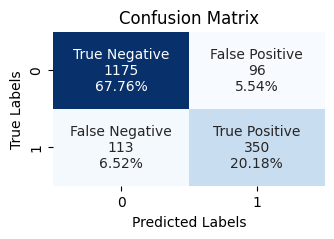




Confusion matrix

 [[1175   96]
 [ 113  350]]

True Negatives  (TN) =  1175
False Positives (FP) =  96
False Negatives (FN) =  113
True Positives  (TP) =  350


Accuracy:        0.8794694348327566
Sensitivity:     0.755939524838013
Specificity:     0.9244689221085759
Geometric Mean:  0.8359680602189696


Precision:        0.8782193003472993
Recall:           0.8794694348327566
f1-score:         0.8787427168721299

------------------------------------------------

Current Time: 2024-05-10 14:24:35
The entire notebook runtime so far is 12 minutes


In [124]:

# perform LSTM hyperparameter optimization  (without GPU, takes approx 60 minutes to run with units=32,64,128 dropout=0.3,0.5,0.7)
# This method is different than Sequential optimization, maybe use the next cell instead for consistency


import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score

# Define a function to create a model
def create_model(units=64, dropout=0.5):
    model = Sequential([
        LSTM(units, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
        Dropout(dropout),
        LSTM(units//2, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameters to search
#units_list = [32, 64, 128]
#dropout_list = [0.3, 0.5, 0.7]
units_list = [32]              #use smaller list of parameters to speed up debugging phase
dropout_list = [0.3]               #use smaller list of parameters to speed up debugging phase


# initialize variables
best_accuracy = 0
best_params = {}

# Loop through all combinations of hyperparameters
print(f"\nLooping through all combinations of hyperparameters")
for units in units_list:
    for dropout in dropout_list:
        print(f"Evaluating model with units={units}, dropout={dropout}")

        # Create and compile the model
        model = create_model(units=units, dropout=dropout)

        # Train the model
        history = model.fit(X_train, y_train, epochs=epoch_count, batch_size=32, validation_split=0.2, verbose=epoch_verbosity)

        # Evaluate the model on validation data
        val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)
        print(f"Validation Accuracy: {val_accuracy}")

        # Update best accuracy and parameters if necessary
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_params = {'units': units, 'dropout': dropout}

# Train the final model with the best parameters
print(f"\nBest parameters: {best_params}")
print(f"Training the final model with the best parameters...")
model = create_model(**best_params)
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

# final cross validation
cross_val_score_result = cross_val_score(clf, X_train, y_train, cv=cv_count)
print(f"-----------------------------------------")
print(f"Cross validation scores: {cross_val_score_result}")
print(f"Mean cross validation score: {cross_val_score_result.mean()}")
print(f"Standard Deviation cross validation score: {cross_val_score_result.std()}")
lstm_crossval_score_all  = cross_val_score_result         #save all folds in a list for later comparison
lstm_crossval_score_mean = cross_val_score_result.mean()  #save mean   crossval score in a variable for later comparison
lstm_crossval_score_std  = cross_val_score_result.std()   #save stddev crossval score in a variable for later comparison

# Evaluate the best model on training data
print(f"-----------------------------------------")
print(f"Evaluating the model on training data")
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)


# Evaluate the best model on test data
print(f"-----------------------------------------")
print(f"\nEvaluating the model on test data")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


# Evaluate the best model on validation data
print(f"-----------------------------------------")
print(f"\nEvaluating the model on validation data")
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Val Loss:", val_loss)
print("Val Accuracy:", val_accuracy)
print(f"-----------------------------------------")


# save results calculated for this model for later comparison to other models
test_accuracy_lstm_optimized  = test_accuracy
test_loss_lstm_optimized      = test_loss
train_accuracy_lstm_optimized = train_accuracy
train_loss_lstm_optimized     = train_loss
val_accuracy_lstm_optimized   = val_accuracy
val_loss_lstm_optimized       = val_loss

# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_lstm_optimized      = Accuracy
sensitivity_lstm_optimized   = Sensitivity
specificity_lstm_optimized   = Specificity
geometricmean_lstm_optimized = GeometricMean
precision_lstm_optimized     = Precision
recall_lstm_optimized        = Recall
f1_lstm_unoptimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

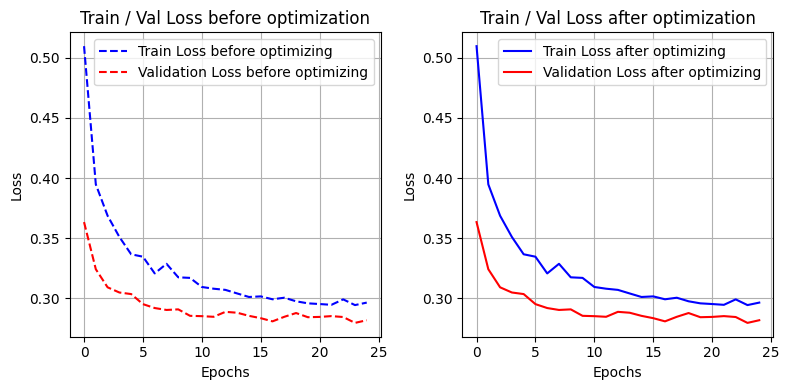

WARNING, after optimization, loss divergence is 0.014659583568572998, which greater than threshold of 0.01, please continue tuning this model.


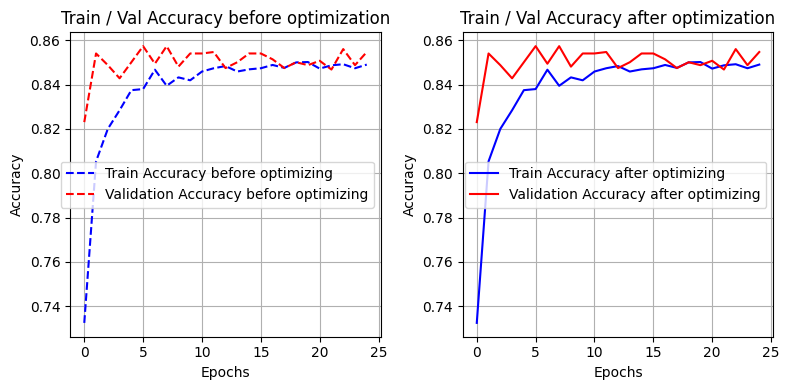

After optimization, accuracy divergence is 0.006, which is <= threshold of 0.01, this model has acceptable accuracy.


In [125]:
# Call previously defined fuctions to create graphs that show how Training/Validation loss and accuracy converge
# It is important that the lines converge, if they do not, add more data, more epochs, or try different hyperparameter optimizations
plot_loss_history(train_loss_history_unoptimized, train_loss_history_optimized, val_loss_history_unoptimized, val_loss_history_optimized, epoch_count)
plot_accuracy_history(train_accuracy_history_unoptimized, train_accuracy_history_optimized, val_accuracy_history_unoptimized, val_accuracy_history_optimized, epoch_count)

In [126]:
# show a running total of elapsed time for the entire notebook
show_elapsed_time()

Current Time: 2024-05-10 14:24:36
The entire notebook runtime so far is 12 minutes


## reshape X_train, X_test to include time steps for SimpleRNN and GRU

The following model expects sequential (ie time-series) data, so the dataset will need  "time steps"  for the SimpleRNN and Gated Recurrent Unit (GRU) models? (which also reshapes X_train,X_test).

If the data does not include time steps, you will get an error about the shape being incorrect.

The error message indicates that the input to the GRU layer has an incorrect shape. The GRU layer expects input data to have three dimensions: (batch size, time steps, features). In this case, the input data only has two dimensions: (batch size, features).

To fix the issue, reshape the input data to have three dimensions. This can be done using the reshape() method.

After reshaping the input data, the model can be trained and evaluated successfully.

In [127]:
# reshape X_train to add time steps (expected by this model)

# Assuming X_train has shape (samples, features)
# Define the number of time steps
time_steps = 1  # Adjust this value based on your data and problem

# Reshape X_train to include time steps
X_train_with_time_steps = np.zeros((X_train.shape[0] - time_steps + 1, time_steps, X_train.shape[1]))
for i in range(len(X_train) - time_steps + 1):
    X_train_with_time_steps[i] = X_train[i:i+time_steps]

# Now X_train_with_time_steps has shape (samples, time_steps, features)


# reshape X_test to add time steps (expected by this model)

# Assuming X_test has shape (samples, features)
# Define the number of time steps
time_steps = 1  # Adjust this value based on your data and problem

# Reshape X_test to include time steps
X_test_with_time_steps = np.zeros((X_test.shape[0] - time_steps + 1, time_steps, X_test.shape[1]))
for i in range(len(X_test) - time_steps + 1):
    X_test_with_time_steps[i] = X_test[i:i+time_steps]

# Reshape X_val to include time steps
X_val_with_time_steps = np.zeros((X_val.shape[0] - time_steps + 1, time_steps, X_val.shape[1]))
for i in range(len(X_val) - time_steps + 1):
    X_val_with_time_steps[i] = X_val[i:i+time_steps]

# Now X_test_with_time_steps has shape (samples, time_steps, features)




## SimpleRNN
### (needed reshaping to add time steps)

### default params

-----------------------------------------
Model Summary
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                6208      
                                                                 
 dense_39 (Dense)            (None, 32)                2080      
                                                                 
 dense_40 (Dense)            (None, 1)                 33        
                                                                 
Total params: 8321 (32.50 KB)
Trainable params: 8321 (32.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
-----------------------------------------
Training the model
Epoch 1/25
190/190 [==============================] - 2s 4ms/step - loss: 0.4263 - accuracy: 0.7898 - val_loss: 0.3357 - val_accuracy: 0.8521
Epoch 2/25
190/190 

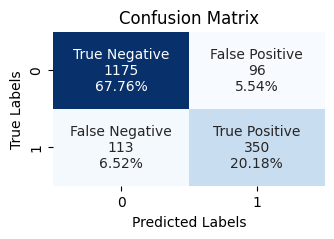




Confusion matrix

 [[1175   96]
 [ 113  350]]

True Negatives  (TN) =  1175
False Positives (FP) =  96
False Negatives (FN) =  113
True Positives  (TP) =  350


Accuracy:        0.8794694348327566
Sensitivity:     0.755939524838013
Specificity:     0.9244689221085759
Geometric Mean:  0.8359680602189696


Precision:        0.8782193003472993
Recall:           0.8794694348327566
f1-score:         0.8787427168721299

------------------------------------------------

Current Time: 2024-05-10 14:24:52
The entire notebook runtime so far is 12 minutes


In [128]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Define input shape based on the features in X_train_with_time_steps
input_shape = X_train_with_time_steps.shape[1:]


# Define the model
model = Sequential([
    SimpleRNN(units=64, input_shape=input_shape),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Print model summary
print(f"-----------------------------------------")
print(f"Model Summary")
print(model.summary())


# Train the model
print(f"-----------------------------------------")
print(f"Training the model")
history = model.fit(X_train_with_time_steps, y_train, epochs=epoch_count, batch_size=32, validation_split=0.2)


# Evaluate the model on training data
print(f"-----------------------------------------")
print(f"Evaluating the model on training data")
train_loss, train_accuracy = model.evaluate(X_train_with_time_steps, y_train)
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)



# Evaluate the model on test data
print(f"-----------------------------------------")
print(f"Evaluating the model on test data")
test_loss, test_accuracy = model.evaluate(X_test_with_time_steps, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


# Evaluate the model on validation data
print(f"-----------------------------------------")
print(f"Evaluating the model on validation data")
val_loss, val_accuracy = model.evaluate(X_val_with_time_steps, y_val)
print("Val Loss:", val_loss)
print("Val Accuracy:", val_accuracy)
print(f"-----------------------------------------")


# save results calculated for this model for later comparison to other models
test_accuracy_simplernn_unoptimized  = test_accuracy
test_loss_simplernn_unoptimized      = test_loss
train_accuracy_simplernn_unoptimized = train_accuracy
train_loss_simplernn_unoptimized     = train_loss
val_accuracy_simplernn_unoptimized   = val_accuracy
val_loss_simplernn_unoptimized       = val_loss


# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_simplernn_unoptimized      = Accuracy
sensitivity_simplernn_unoptimized   = Sensitivity
specificity_simplernn_unoptimized   = Specificity
geometricmean_simplernn_unoptimized = GeometricMean
precision_simplernn_unoptimized     = Precision
recall_simplernn_unoptimized        = Recall
f1_simplernn_unoptimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

### optimized params
RNN

In [129]:
# Sanity check to confirm X_train and y_train have equal number of samples
print(f"X_train_with_time_steps has ", len(X_train_with_time_steps), "samples")
print(f"y_train                 has ", len(y_train),                 "samples")
if ( len(X_train_with_time_steps) != len(y_train) ):
  raise ValueError ("X_train_with_time_steps and y_train are different lengths, please investigate!")


X_train_with_time_steps has  7572 samples
y_train                 has  7572 samples


------------------------------------------
Performing GridSearchCV
24/24 [==============================] - 0s 2ms/step
Best Parameters: {'dropout': 0.3, 'units': 32}
Best Accuracy: 0.8515585406914532
-----------------------------------------
Cross validation scores: [0.83641161 0.86279683 0.87318362 0.84940555 0.85336856 0.8348745
 0.84544254 0.8348745  0.86922061 0.84412153]
Mean cross validation score: 0.8503699856746009
Standard Deviation cross validation score: 0.013336172761137707
------------------------------------------
Evaluating the model on training data
237/237 [==============================] - 1s 2ms/step - loss: 0.2843 - accuracy: 0.8502
Train Loss: 0.28434693813323975
Train Accuracy: 0.8502377271652222
-----------------------------------------
Evaluating the model on test data
55/55 [==============================] - 0s 2ms/step - loss: 0.2652 - accuracy: 0.9037
Test Loss: 0.2652182877063751
Test Accuracy: 0.9036908745765686
-----------------------------------------
Ev

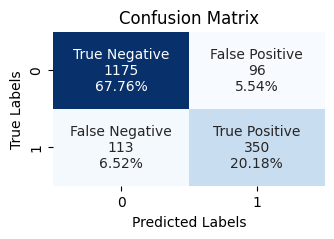




Confusion matrix

 [[1175   96]
 [ 113  350]]

True Negatives  (TN) =  1175
False Positives (FP) =  96
False Negatives (FN) =  113
True Positives  (TP) =  350


Accuracy:        0.8794694348327566
Sensitivity:     0.755939524838013
Specificity:     0.9244689221085759
Geometric Mean:  0.8359680602189696


Precision:        0.8782193003472993
Recall:           0.8794694348327566
f1-score:         0.8787427168721299

------------------------------------------------

Current Time: 2024-05-10 14:28:20
The entire notebook runtime so far is 15 minutes


In [130]:
# SimpleRNN hyperparameter optimization

import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from sklearn.metrics import make_scorer, accuracy_score

# Define input shape based on the features in X_train
input_shape = (X_train_with_time_steps.shape[1], X_train_with_time_steps.shape[2])  # Assuming X_train is 2D

# Define a function to create a model
def create_model(units=64, dropout=0.5):
    model = Sequential([
        SimpleRNN(units, input_shape=input_shape),
        Dropout(dropout),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a wrapper class around the Keras model
class KerasSimpleRNNWrapper:
    def __init__(self, units=64, dropout=0.5, epochs=epoch_count, batch_size=32, verbose=0):
        self.units = units
        self.dropout = dropout
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None

    def fit(self, X, y):
        self.model = create_model(units=self.units, dropout=self.dropout)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)

    def get_params(self, deep=True):
        return {
            'units': self.units,
            'dropout': self.dropout,
            'epochs': self.epochs,
            'batch_size': self.batch_size,
            'verbose': self.verbose
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

# Create an instance of the wrapper class
model = KerasSimpleRNNWrapper()

# Define the hyperparameters grid to search
#param_grid = {
#    'units': [32, 64, 128],
#    'dropout': [0.3, 0.5, 0.7]
#}
param_grid = {        #smaller faster version for testing
    'units': [32],
    'dropout': [0.3]
}


# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_count, scoring=make_scorer(accuracy_score), verbose=epoch_verbosity)

# Perform grid search
print(f"------------------------------------------")
print(f"Performing GridSearchCV")
grid_search_result = grid_search.fit(X_train_with_time_steps, y_train)

# Print best parameters and results
print("Best Parameters:", grid_search_result.best_params_)
print("Best Accuracy:", grid_search_result.best_score_)

# final cross validation
cross_val_score_result = cross_val_score(clf, X_train, y_train, cv=cv_count)
print(f"-----------------------------------------")
print(f"Cross validation scores: {cross_val_score_result}")
print(f"Mean cross validation score: {cross_val_score_result.mean()}")
print(f"Standard Deviation cross validation score: {cross_val_score_result.std()}")
simplernn_crossval_score_all  = cross_val_score_result         #save all folds in a list for later comparison
simplernn_crossval_score_mean = cross_val_score_result.mean()  #save mean   crossval score in a variable for later comparison
simplernn_crossval_score_std  = cross_val_score_result.std()   #save stddev crossval score in a variable for later comparison

# Evaluate the model on training data
print(f"------------------------------------------")
print(f"Evaluating the model on training data")
best_model = grid_search_result.best_estimator_
train_loss, train_accuracy = best_model.model.evaluate(X_train_with_time_steps, y_train)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)


# Evaluate the model on test data
print(f"-----------------------------------------")
print(f"Evaluating the model on test data")
test_loss, test_accuracy = best_model.model.evaluate(X_test_with_time_steps, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


# Evaluate the model on validation data
print(f"-----------------------------------------")
print(f"Evaluating the model on validation data")
print(f"-----------------------------------------")
val_loss, val_accuracy = best_model.model.evaluate(X_val_with_time_steps, y_val)
print("Val Loss:", val_loss)
print("Val Accuracy:", val_accuracy)
print(f"-----------------------------------------")


# save results calculated for this model for later comparison to other models
test_accuracy_simplernn_optimized  = test_accuracy
test_loss_simplernn_optimized      = test_loss
train_accuracy_simplernn_optimized = train_accuracy
train_loss_simplernn_optimized     = train_loss
val_accuracy_simplernn_optimized   = val_accuracy
val_loss_simplernn_optimized       = val_loss


# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_simplernn_optimized      = Accuracy
sensitivity_simplernn_optimized   = Sensitivity
specificity_simplernn_optimized   = Specificity
geometricmean_simplernn_optimized = GeometricMean
precision_simplernn_optimized     = Precision
recall_simplernn_optimized        = Recall
f1_simplernn_optimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

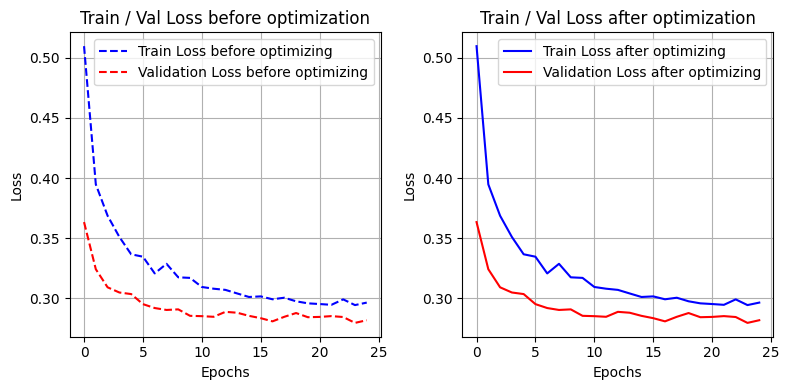

WARNING, after optimization, loss divergence is 0.014659583568572998, which greater than threshold of 0.01, please continue tuning this model.


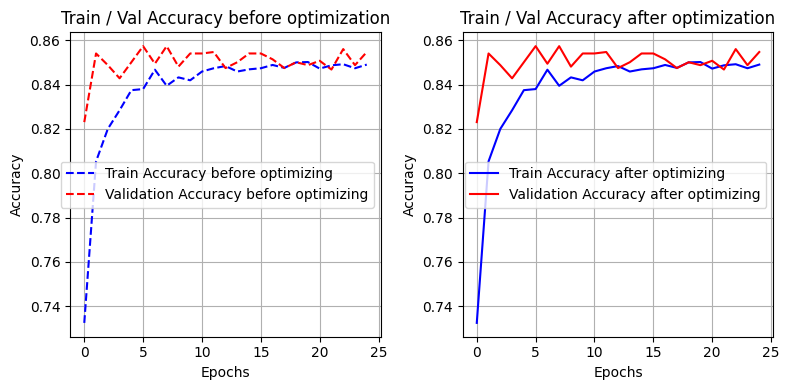

After optimization, accuracy divergence is 0.006, which is <= threshold of 0.01, this model has acceptable accuracy.


In [131]:
# Call previously defined fuctions to create graphs that show how Training/Validation loss and accuracy converge
# It is important that the lines converge, if they do not, add more data, more epochs, or try different hyperparameter optimizations
plot_loss_history(train_loss_history_unoptimized, train_loss_history_optimized, val_loss_history_unoptimized, val_loss_history_optimized, epoch_count)
plot_accuracy_history(train_accuracy_history_unoptimized, train_accuracy_history_optimized, val_accuracy_history_unoptimized, val_accuracy_history_optimized, epoch_count)

## SimpleRNN + LSTM

### default params

-----------------------------------------
Model Summary
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 1, 64)             6208      
                                                                 
 dropout_26 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_6 (LSTM)               (None, 32)                12416     
                                                                 
 dense_63 (Dense)            (None, 1)                 33        
                                                                 
Total params: 18657 (72.88 KB)
Trainable params: 18657 (72.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
-----------------------------------------
Training the model
Epoch 1/25
190/190 [=======

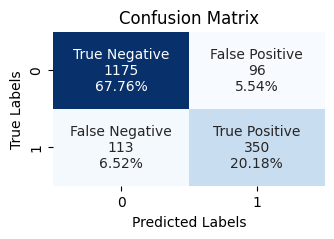




Confusion matrix

 [[1175   96]
 [ 113  350]]

True Negatives  (TN) =  1175
False Positives (FP) =  96
False Negatives (FN) =  113
True Positives  (TP) =  350


Accuracy:        0.8794694348327566
Sensitivity:     0.755939524838013
Specificity:     0.9244689221085759
Geometric Mean:  0.8359680602189696


Precision:        0.8782193003472993
Recall:           0.8794694348327566
f1-score:         0.8787427168721299

------------------------------------------------

Current Time: 2024-05-10 14:28:47
The entire notebook runtime so far is 16 minutes


In [132]:
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

# Define input shape based on the features in X_train_with_time_steps
input_shape = X_train_with_time_steps.shape[1:]

# Define the model
model = Sequential([
    SimpleRNN(64, input_shape=input_shape, return_sequences=True),  # SimpleRNN layer with 64 units
    Dropout(0.5),
    LSTM(32),  # LSTM layer with 32 units
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Print model summary
print(f"-----------------------------------------")
print(f"Model Summary")
print(model.summary())


# Train the model
print(f"-----------------------------------------")
print(f"Training the model")
history = model.fit(X_train_with_time_steps, y_train, epochs=epoch_count, batch_size=32, validation_split=0.2)


# Evaluate the model on training data
print(f"-----------------------------------------")
print(f"Evaluating the model on training data")
train_loss, train_accuracy = model.evaluate(X_train_with_time_steps, y_train)
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)


# Evaluate the model on test data
print(f"-----------------------------------------")
print(f"Evaluating the model on test data")
test_loss, test_accuracy = model.evaluate(X_test_with_time_steps, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


# Evaluate the model on validation data
print(f"-----------------------------------------")
print(f"Evaluating the model on validation data")
val_loss, val_accuracy = model.evaluate(X_val_with_time_steps, y_val)
print("Val Loss:", val_loss)
print("Val Accuracy:", val_accuracy)


# save results calculated for this model for later comparison to other models
test_accuracy_simplernn_lstm_unoptimized  = test_accuracy
test_loss_simplernn_lstm_unoptimized      = test_loss
train_accuracy_simplernn_lstm_unoptimized = train_accuracy
train_loss_simplernn_lstm_unoptimized     = train_loss
val_accuracy_simplernn_lstm_unoptimized   = val_accuracy
val_loss_simplernn_lstm_unoptimized       = val_loss


# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_simplernn_lstm_unoptimized      = Accuracy
sensitivity_simplernn_lstm_unoptimized   = Sensitivity
specificity_simplernn_lstm_unoptimized   = Specificity
geometricmean_simplernn_lstm_unoptimized = GeometricMean
precision_simplernn_lstm_unoptimized     = Precision
recall_simplernn_lstm_unoptimized        = Recall
f1_simplernn_lstm_unoptimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

### optimized params
RNN + LSTM

------------------------------------------
Performing GridSearchCV
24/24 [==============================] - 0s 3ms/step
Best Parameters: {'dropout': 0.5, 'units': 32}
Best Accuracy: 0.8497103550677407
-----------------------------------------
Cross validation scores: [0.83641161 0.86279683 0.87318362 0.84940555 0.85336856 0.8348745
 0.84544254 0.8348745  0.86922061 0.84412153]
Mean cross validation score: 0.8503699856746009
Standard Deviation cross validation score: 0.013336172761137707
------------------------------------------
Evaluating the model on training data
237/237 [==============================] - 1s 3ms/step - loss: 0.2921 - accuracy: 0.8518
Train Loss: 0.2920759916305542
Train Accuracy: 0.8518224954605103
-----------------------------------------
Evaluating the model on test data
55/55 [==============================] - 0s 3ms/step - loss: 0.2729 - accuracy: 0.8800
Test Loss: 0.27289292216300964
Test Accuracy: 0.8800461292266846
-----------------------------------------
Ev

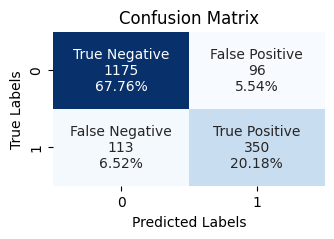




Confusion matrix

 [[1175   96]
 [ 113  350]]

True Negatives  (TN) =  1175
False Positives (FP) =  96
False Negatives (FN) =  113
True Positives  (TP) =  350


Accuracy:        0.8794694348327566
Sensitivity:     0.755939524838013
Specificity:     0.9244689221085759
Geometric Mean:  0.8359680602189696


Precision:        0.8782193003472993
Recall:           0.8794694348327566
f1-score:         0.8787427168721299

------------------------------------------------

Current Time: 2024-05-10 14:33:34
The entire notebook runtime so far is 20 minutes


In [133]:
# SimpleRNN + LSTM hyperparameter optimization

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
#from sklearn.metrics import make_scorer, accuracy_score

# Define input shape based on the features in X_train
#input_shape = (X_train_with_time_steps.shape[1], X_train_with_time_steps.shape[2])  # Assuming X_train is 2D
input_shape = X_train_with_time_steps.shape[1:]


# Define a function to create a model
def create_model(units=64, dropout=0.5):
    model = Sequential([
        SimpleRNN(units, input_shape=input_shape, return_sequences=True),  #input layer
        Dropout(dropout),                                                  #Optional dropout layer for regularization to randomly sets a fraction of input units to zero during training to prevent overfitting
        LSTM(units, dropout=dropout),                                      #hidden layer
        Dropout(dropout),                                                  #Optional dropout layer for regularization to randomly sets a fraction of input units to zero during training to prevent overfitting
        #Dense(32, activation='relu'),                                     #add another hidden layer
        Dense(1, activation='sigmoid')                                     #output layer
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Create a wrapper class around the Keras model
class KerasSimpleRNNWrapper:
    def __init__(self, units=64, dropout=0.5, epochs=epoch_count, batch_size=32, verbose=0):
        self.units = units
        self.dropout = dropout
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None

    def fit(self, X, y):
        self.model = create_model(units=self.units, dropout=self.dropout)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)

    def get_params(self, deep=True):
        return {
            'units': self.units,
            'dropout': self.dropout,
            'epochs': self.epochs,
            'batch_size': self.batch_size,
            'verbose': self.verbose
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

# Create an instance of the wrapper class
model = KerasSimpleRNNWrapper()


# Define the hyperparameters grid to search
#param_grid = {
#    'units': [32, 64, 128],
#    'dropout': [0.3, 0.5, 0.7]
#}
param_grid = {        #smaller faster version for testing
    'units': [32],
    'dropout': [0.5]
}


# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_count, scoring=make_scorer(accuracy_score), verbose=epoch_verbosity)

# Perform grid search
print(f"------------------------------------------")
print(f"Performing GridSearchCV")
grid_search_result = grid_search.fit(X_train_with_time_steps, y_train)

# Print best parameters and results
print("Best Parameters:", grid_search_result.best_params_)
print("Best Accuracy:", grid_search_result.best_score_)

# final cross validation
cross_val_score_result = cross_val_score(clf, X_train, y_train, cv=cv_count)
print(f"-----------------------------------------")
print(f"Cross validation scores: {cross_val_score_result}")
print(f"Mean cross validation score: {cross_val_score_result.mean()}")
print(f"Standard Deviation cross validation score: {cross_val_score_result.std()}")
simplernn_lstm_crossval_score_all  = cross_val_score_result         #save all folds in a list for later comparison
simplernn_lstm_crossval_score_mean = cross_val_score_result.mean()  #save mean   crossval score in a variable for later comparison
simplernn_lstm_crossval_score_std  = cross_val_score_result.std()   #save stddev crossval score in a variable for later comparison

# Evaluate the model on training data
print(f"------------------------------------------")
print(f"Evaluating the model on training data")
best_model = grid_search_result.best_estimator_
train_loss, train_accuracy = best_model.model.evaluate(X_train_with_time_steps, y_train)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)


# Evaluate the model on test data
print(f"-----------------------------------------")
print(f"Evaluating the model on test data")
test_loss, test_accuracy = best_model.model.evaluate(X_test_with_time_steps, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


# Evaluate the model on validation data
print(f"-----------------------------------------")
print(f"Evaluating the model on validation data")
val_loss, val_accuracy = best_model.model.evaluate(X_val_with_time_steps, y_val)
print("Val Loss:", val_loss)
print("Val Accuracy:", val_accuracy)
print(f"-----------------------------------------")


# save results calculated for this model for later comparison to other models
test_accuracy_simplernn_lstm_optimized  = test_accuracy
test_loss_simplernn_lstm_optimized      = test_loss
train_accuracy_simplernn_lstm_optimized = train_accuracy
train_loss_simplernn_lstm_optimized     = train_loss
val_accuracy_simplernn_lstm_optimized   = val_accuracy
val_loss_simplernn_lstm_optimized       = val_loss


# call previously defined function to create confusion matrix
cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# save results calculated for this model for later comparison to other models
accuracy_simplernn_lstm_optimized      = Accuracy
sensitivity_simplernn_lstm_optimized   = Sensitivity
specificity_simplernn_lstm_optimized   = Specificity
geometricmean_simplernn_lstm_optimized = GeometricMean
precision_simplernn_lstm_optimized     = Precision
recall_simplernn_lstm_optimized        = Recall
f1_simplernn_lstm_optimized            = F1

# show a running total of elapsed time for the entire notebook
show_elapsed_time()

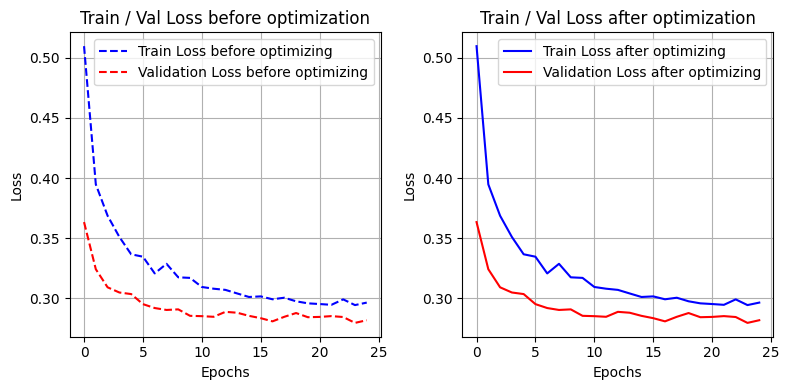

WARNING, after optimization, loss divergence is 0.014659583568572998, which greater than threshold of 0.01, please continue tuning this model.


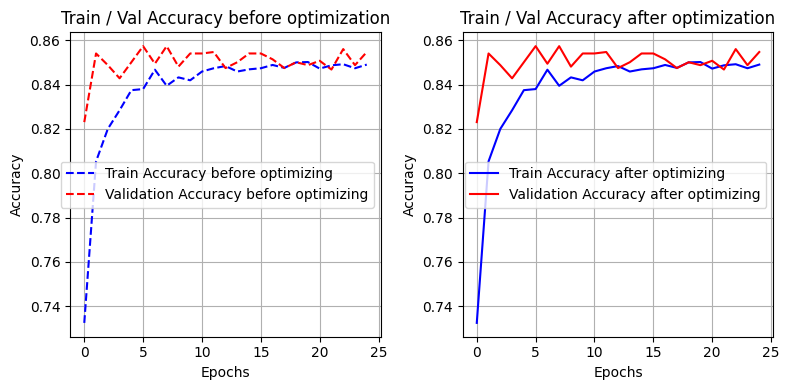

After optimization, accuracy divergence is 0.006, which is <= threshold of 0.01, this model has acceptable accuracy.


In [134]:
# Call previously defined fuctions to create graphs that show how Training/Validation loss and accuracy converge
# It is important that the lines converge, if they do not, add more data, more epochs, or try different hyperparameter optimizations
plot_loss_history(train_loss_history_unoptimized, train_loss_history_optimized, val_loss_history_unoptimized, val_loss_history_optimized, epoch_count)
plot_accuracy_history(train_accuracy_history_unoptimized, train_accuracy_history_optimized, val_accuracy_history_unoptimized, val_accuracy_history_optimized, epoch_count)

## Gated Recurrent Unit (GRU)
### (needed reshaping to add time steps)

Note that it is possible to combine a Gated Recurrent Unit (GRU) layer with a Long Short-Term Memory (LSTM) layer in a neural network architecture. However, it's less common to do so because both GRU and LSTM layers are types of recurrent neural network (RNN) layers designed to address the vanishing gradient problem and capture long-term dependencies in sequential data.

Typically, you would choose either GRU or LSTM based on the specific requirements of your task and the characteristics of your data. Both GRU and LSTM have similar capabilities, but they have slightly different architectures and computational properties.

If you choose to combine GRU and LSTM layers in a neural network, you would stack them sequentially or in parallel depending on your design choices. However, it's important to consider the computational complexity and potential overfitting when stacking multiple types of RNN layers.

In most cases, using either GRU or LSTM layers alone is sufficient to model sequential data effectively.

### default params

In [135]:
# #from tensorflow.keras.layers import Dense, GRU



# # Define input shape based on the features in X_train
# input_shape = X_train_with_time_steps.shape[1:]

# # Define the model
# model = Sequential([
#     GRU(units=64, input_shape=input_shape),
#     Dropout(0.5),
#     Dense(32, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # Print model summary
# print(f"-----------------------------------------")
# print(f"Model Summary")
# print(model.summary())

# # Train the model
# print(f"-----------------------------------------")
# print(f"Training the model")
# history = model.fit(X_train_with_time_steps, y_train, epochs=epoch_count, batch_size=32, validation_split=0.2)

# # Evaluate the model on training data
# print(f"-----------------------------------------")
# print(f"Evaluating the model on training data")
# train_loss, train_accuracy = model.evaluate(X_train_with_time_steps, y_train)
# print("Training Loss:", train_loss)
# print("Training Accuracy:", train_accuracy)


# # Evaluate the model on test data
# print(f"-----------------------------------------")
# print(f"Evaluating the model on test data")
# test_loss, test_accuracy = model.evaluate(X_test_with_time_steps, y_test)
# print("Test Loss:", test_loss)
# print("Test Accuracy:", test_accuracy)


# # Evaluate the model on validation data
# print(f"-----------------------------------------")
# print(f"Evaluating the model on validation data")
# val_loss, val_accuracy = model.evaluate(X_val_with_time_steps, y_val)
# print("Val Loss:", val_loss)
# print("Val Accuracy:", val_accuracy)
# print(f"-----------------------------------------")


# # save results calculated for this model for later comparison to other models
# test_accuracy_gru_unoptimized  = test_accuracy
# test_loss_gru_unoptimized      = test_loss
# train_accuracy_gru_unoptimized = train_accuracy
# train_loss_gru_unoptimized     = train_loss
# val_accuracy_gru_unoptimized   = val_accuracy
# val_loss_gru_unoptimized       = val_loss

# # call previously defined function to create confusion matrix
# cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# # save results calculated for this model for later comparison to other models
# accuracy_gru_unoptimized      = Accuracy
# sensitivity_gru_unoptimized   = Sensitivity
# specificity_gru_unoptimized   = Specificity
# geometricmean_gru_unoptimized = GeometricMean
# precision_gru_unoptimized     = Precision
# recall_gru_unoptimized        = Recall
# f1_gru_unoptimized            = F1

# # show a running total of elapsed time for the entire notebook
# show_elapsed_time()

### optimized params
Gated Recurrent Unit (GRU)

In [136]:
# Sanity check to confirm X_train and y_train have equal number of samples
print(f"X_train_with_time_steps has ", len(X_train_with_time_steps), "samples")
print(f"y_train                 has ", len(y_train),                 "samples")
if ( len(X_train_with_time_steps) != len(y_train) ):
  raise ValueError ("X_train_with_time_steps and y_train are different lengths, please investigate!")


X_train_with_time_steps has  7572 samples
y_train                 has  7572 samples


In [137]:
# # NOTE: Crashed on this step after using all available RAM!  2025-04-19

# # GRU hyperparameter optimization

# #import numpy as np
# #from sklearn.model_selection import GridSearchCV
# #from tensorflow.keras.models import Sequential
# #from tensorflow.keras.layers import Dense, GRU, Dropout
# #from sklearn.metrics import make_scorer, accuracy_score

# # Define input shape based on the features in X_train
# input_shape = (X_train_with_time_steps.shape[1], X_train_with_time_steps.shape[2])  # Assuming X_train is 3D

# # Define a function to create a model
# def create_model(units=64, dropout=0.5):
#     model = Sequential([
#         GRU(units, input_shape=input_shape),
#         Dropout(dropout),
#         Dense(32, activation='relu'),
#         Dropout(0.5),
#         Dense(1, activation='sigmoid')
#     ])
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# # Create a wrapper class around the Keras model
# class KerasGRUWrapper:
#     def __init__(self, units=64, dropout=0.5, epochs=epoch_count, batch_size=32, verbose=0):
#         self.units = units
#         self.dropout = dropout
#         self.epochs = epochs
#         self.batch_size = batch_size
#         self.verbose = verbose
#         self.model = None

#     def fit(self, X, y):
#         self.model = create_model(units=self.units, dropout=self.dropout)
#         self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)

#     def predict(self, X):
#         return (self.model.predict(X) > 0.5).astype(int)

#     def get_params(self, deep=True):
#         return {
#             'units': self.units,
#             'dropout': self.dropout,
#             'epochs': self.epochs,
#             'batch_size': self.batch_size,
#             'verbose': self.verbose
#         }

#     def set_params(self, **params):
#         for param, value in params.items():
#             setattr(self, param, value)
#         return self

# # Create an instance of the wrapper class
# model = KerasGRUWrapper()

# # Define the hyperparameters grid to search
# #param_grid = {
# #    'units': [32, 64, 128],
# #    'dropout': [0.3, 0.5, 0.7]
# #}
# param_grid = {          #smaller faster version for testing
#     'units': [64],
#     'dropout': [0.5]
# }

# # Create GridSearchCV instance
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_count, scoring=make_scorer(accuracy_score), verbose=epoch_verbosity)

# # Perform grid search
# print(f"Performing grid search")
# grid_search_result = grid_search.fit(X_train_with_time_steps, y_train)

# # Print best parameters and results
# print("Best Parameters:", grid_search_result.best_params_)
# print("Best Accuracy:", grid_search_result.best_score_)

# # final cross validation
# cross_val_score_result = cross_val_score(clf, X_train, y_train, cv=cv_count)
# print(f"-----------------------------------------")
# print(f"Cross validation scores: {cross_val_score_result}")
# print(f"Mean cross validation score: {cross_val_score_result.mean()}")
# print(f"Standard Deviation cross validation score: {cross_val_score_result.std()}")
# gru_crossval_score_all  = cross_val_score_result         #save all folds in a list for later comparison
# gru_crossval_score_mean = cross_val_score_result.mean()  #save mean   crossval score in a variable for later comparison
# gru_crossval_score_std  = cross_val_score_result.std()   #save stddev crossval score in a variable for later comparison

# # Evaluate the model on training data
# print(f"------------------------------------------")
# print(f"Evaluating the model on training data")
# best_model = grid_search_result.best_estimator_
# train_loss, train_accuracy = best_model.model.evaluate(X_train_with_time_steps, y_train)
# print("Train Loss:", train_loss)
# print("Train Accuracy:", train_accuracy)


# # Evaluate the model on test data
# print(f"-----------------------------------------")
# print(f"Evaluating the model on test data")
# test_loss, test_accuracy = best_model.model.evaluate(X_test_with_time_steps, y_test)
# print("Test Loss:", test_loss)
# print("Test Accuracy:", test_accuracy)


# # Evaluate the model on validation data
# print(f"-----------------------------------------")
# print(f"Evaluating the model on validation data")
# val_loss, val_accuracy = best_model.model.evaluate(X_val_with_time_steps, y_val)
# print("Val Loss:", val_loss)
# print("Val Accuracy:", val_accuracy)
# print(f"-----------------------------------------")


# # save results calculated for this model for later comparison to other models
# test_accuracy_gru_optimized  = test_accuracy
# test_loss_gru_optimized      = test_loss
# train_accuracy_gru_optimized = train_accuracy
# train_loss_gru_optimized     = train_loss
# val_accuracy_gru_optimized   = val_accuracy
# val_loss_gru_optimized       = val_loss

# # call previously defined function to create confusion matrix
# cm, Accuracy, Sensitivity, Specificity, GeometricMean, Precision, Recall, F1 = visualize_confusion_matrix(y_test, y_pred)

# # save results calculated for this model for later comparison to other models
# accuracy_gru_optimized      = Accuracy
# sensitivity_gru_optimized   = Sensitivity
# specificity_gru_optimized   = Specificity
# geometricmean_gru_optimized = GeometricMean
# precision_gru_optimized     = Precision
# recall_gru_optimized        = Recall
# f1_gru_optimized            = F1

# # show a running total of elapsed time for the entire notebook
# show_elapsed_time()

In [138]:
# # Call previously defined fuctions to create graphs that show how Training/Validation loss and accuracy converge
# # It is important that the lines converge, if they do not, add more data, more epochs, or try different hyperparameter optimizations
# plot_loss_history(train_loss_history_unoptimized, train_loss_history_optimized, val_loss_history_unoptimized, val_loss_history_optimized, epoch_count)
# plot_accuracy_history(train_accuracy_history_unoptimized, train_accuracy_history_optimized, val_accuracy_history_unoptimized, val_accuracy_history_optimized, epoch_count)

In [139]:
# show a running total of elapsed time for the entire notebook
show_elapsed_time()

Current Time: 2024-05-10 14:33:35
The entire notebook runtime so far is 21 minutes


# Comparison of all models

In [140]:
# this section compares the accuracy of different methods:

from tabulate import tabulate
# Define headers for the table
headers = ["Model", "Accuracy Un-optimized", "Accuracy Optimized"]
# Define data for the trable
data = [
    ["LR",         accuracy_lr_unoptimized,             accuracy_lr_optimized],
    ["NB",         accuracy_nb_unoptimized,             accuracy_nb_optimized],
    ["KNN",        accuracy_knn_unoptimized,            accuracy_knn_optimized],
    ["SVM",        accuracy_svm_unoptimized,            accuracy_svm_optimized],
    ["DT",         accuracy_dt_unoptimized,             accuracy_dt_optimized],
    ["RF",         accuracy_rf_unoptimized,             accuracy_rf_optimized],
    ["GB",         accuracy_gb_unoptimized,             accuracy_gb_optimized],
    ["MLP",        accuracy_mlp_unoptimized,            accuracy_mlp_optimized],
    ["Sequential", accuracy_sequential_unoptimized,     accuracy_sequential_optimized],
    ["FNN-LSTM",   accuracy_lstm_unoptimized,           accuracy_lstm_optimized],
    ["RNN",        accuracy_simplernn_unoptimized,      accuracy_simplernn_optimized],
    ["RNN-LSTM",   accuracy_simplernn_lstm_unoptimized, accuracy_simplernn_lstm_optimized],
    ["GRU",        accuracy_gru_unoptimized,            accuracy_gru_optimized]
]

# Round all floats in the data list to 4 decimal places
data_rounded = [[elem if isinstance(elem, str) else round(elem, 4) for elem in row] for row in data]

# Generate the table
table = tabulate(data_rounded, headers=headers, tablefmt="fancy_grid")

# Print the table
print(table)


# sanity checks to confirm that hyperparameter optimization did not make things worse instead of better
if accuracy_lr_unoptimized              > accuracy_lr_optimized:              print("WARNING: LR optimization made the accuracy worse, please tweak hyperparameters")
if accuracy_nb_unoptimized              > accuracy_nb_optimized:              print("WARNING: NB optimization made the accuracy worse, please tweak hyperparameters")
if accuracy_knn_unoptimized             > accuracy_knn_optimized:             print("WARNING: KNN optimization made the accuracy worse, please tweak hyperparameters")
if accuracy_svm_unoptimized             > accuracy_svm_optimized:             print("WARNING: SVM optimization made the accuracy worse, please tweak hyperparameters")
if accuracy_dt_unoptimized              > accuracy_dt_optimized:              print("WARNING: DT optimization made the accuracy worse, please tweak hyperparameters")
if accuracy_rf_unoptimized              > accuracy_rf_optimized:              print("WARNING: RF optimization made the accuracy worse, please tweak hyperparameters")
if accuracy_gb_unoptimized              > accuracy_gb_optimized:              print("WARNING: GB optimization made the accuracy worse, please tweak hyperparameters")
if accuracy_mlp_unoptimized             > accuracy_mlp_optimized:             print("WARNING: MLP optimization made the accuracy worse, please tweak hyperparameters")
if accuracy_sequential_unoptimized      > accuracy_sequential_optimized:      print("WARNING: FNN Sequential optimization made the accuracy worse, please tweak hyperparameters")
if accuracy_lstm_unoptimized            > accuracy_lstm_optimized:            print("WARNING: FNN-LSTM optimization made the accuracy worse, please tweak hyperparameters")
if accuracy_simplernn_unoptimized       > accuracy_simplernn_optimized:       print("WARNING: RNN optimization made the accuracy worse, please tweak hyperparameters")
if accuracy_simplernn_lstm_unoptimized  > accuracy_simplernn_lstm_optimized:  print("WARNING: RNN-LSTM optimization made the accuracy worse, please tweak hyperparameters")
if accuracy_gru_unoptimized             > accuracy_gru_optimized:             print("WARNING: GRU optimization made the accuracy worse, please tweak hyperparameters")


╒════════════╤═════════════════════════╤══════════════════════╕
│ Model      │   Accuracy Un-optimized │   Accuracy Optimized │
╞════════════╪═════════════════════════╪══════════════════════╡
│ LR         │                  0.876  │               0.876  │
├────────────┼─────────────────────────┼──────────────────────┤
│ NB         │                  0.763  │               0.763  │
├────────────┼─────────────────────────┼──────────────────────┤
│ KNN        │                  0.8356 │               0      │
├────────────┼─────────────────────────┼──────────────────────┤
│ SVM        │                  0      │               0      │
├────────────┼─────────────────────────┼──────────────────────┤
│ DT         │                  0.9343 │               0.9533 │
├────────────┼─────────────────────────┼──────────────────────┤
│ RF         │                  0.9504 │               0.9527 │
├────────────┼─────────────────────────┼──────────────────────┤
│ GB         │                  0.9481 │

In [141]:
# sanity check to see if hyperparameter optimizations made accuracy worse instead of better

from tabulate import tabulate
# Define headers for the table
headers = ["Model", "Val Accuracy Un-optimized", "Val Accuracy Optimized"]
# Define data for the trable
data = [
    ["MLP",        val_accuracy_mlp_unoptimized,            val_accuracy_mlp_optimized],
    ["Sequential", val_accuracy_sequential_unoptimized,     val_accuracy_sequential_optimized],
    ["FNN-LSTM",   val_accuracy_lstm_unoptimized,           val_accuracy_lstm_optimized],
    ["RNN",        val_accuracy_simplernn_unoptimized,      val_accuracy_simplernn_optimized],
    ["RNN-LSTM",   val_accuracy_simplernn_lstm_unoptimized, val_accuracy_simplernn_lstm_optimized],
    ["GRU",        val_accuracy_gru_unoptimized,            val_accuracy_gru_optimized]
]

# Round all floats in the data list to 4 decimal places
data_rounded = [[elem if isinstance(elem, str) else round(elem, 4) for elem in row] for row in data]

# Generate the table
table = tabulate(data_rounded, headers=headers, tablefmt="fancy_grid")

# Print the table
print(table)


# sanity checks to confirm that hyperparameter optimization did not make things worse instead of better
if val_accuracy_mlp_unoptimized             > val_accuracy_mlp_optimized:             print("WARNING: MLP optimization made the accuracy worse, please tweak hyperparameters")
if val_accuracy_sequential_unoptimized      > val_accuracy_sequential_optimized:      print("WARNING: FNN Sequential optimization made the accuracy worse, please tweak hyperparameters")
if val_accuracy_lstm_unoptimized            > val_accuracy_lstm_optimized:            print("WARNING: FNN-LSTM optimization made the accuracy worse, please tweak hyperparameters")
if val_accuracy_simplernn_unoptimized       > val_accuracy_simplernn_optimized:       print("WARNING: RNN optimization made the accuracy worse, please tweak hyperparameters")
if val_accuracy_simplernn_lstm_unoptimized  > val_accuracy_simplernn_lstm_optimized:  print("WARNING: RNN-LSTM optimization made the accuracy worse, please tweak hyperparameters")
if val_accuracy_gru_unoptimized             > val_accuracy_gru_optimized:             print("WARNING: GRU optimization made the accuracy worse, please tweak hyperparameters")



╒════════════╤═════════════════════════════╤══════════════════════════╕
│ Model      │   Val Accuracy Un-optimized │   Val Accuracy Optimized │
╞════════════╪═════════════════════════════╪══════════════════════════╡
│ MLP        │                      0.8824 │                   0.8824 │
├────────────┼─────────────────────────────┼──────────────────────────┤
│ Sequential │                      0.8852 │                   0.8852 │
├────────────┼─────────────────────────────┼──────────────────────────┤
│ FNN-LSTM   │                      0.827  │                   0.8501 │
├────────────┼─────────────────────────────┼──────────────────────────┤
│ RNN        │                      0.8824 │                   0.906  │
├────────────┼─────────────────────────────┼──────────────────────────┤
│ RNN-LSTM   │                      0.8864 │                   0.8841 │
├────────────┼─────────────────────────────┼──────────────────────────┤
│ GRU        │                      0      │                   0

The following accuracy values will be used for visualization:
   GB       0.9452
   DT       0.9533
   RF       0.9527
   MLP      0.8795
   FNN      0.8795
   LSTM     0.8795


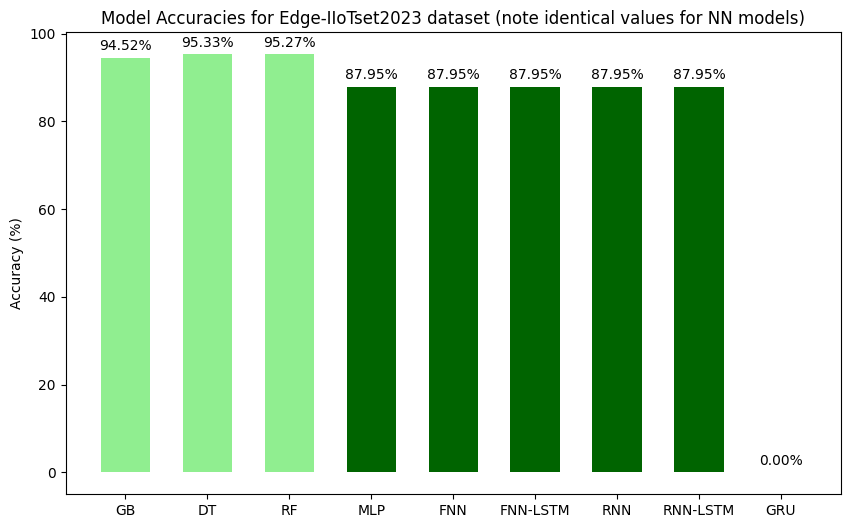

In [142]:
# Create a bar graph that shows the accuracy of the base classifiers and NN classifiers

# Show the values that will be used in the graph
print(f"The following accuracy values will be used for visualization:")
print(f"   GB       {accuracy_gb_optimized:.4f}")
print(f"   DT       {accuracy_dt_optimized:.4f}")
print(f"   RF       {accuracy_rf_optimized:.4f}")
print(f"   MLP      {accuracy_mlp_optimized:.4f}")
print(f"   FNN      {accuracy_sequential_optimized:.4f}")
print(f"   LSTM     {accuracy_lstm_optimized:.4f}")

labels = ["GB", "DT", "RF", "MLP", "FNN", "FNN-LSTM", "RNN", "RNN-LSTM", "GRU"]
values = [accuracy_gb_optimized*100, accuracy_dt_optimized*100, accuracy_rf_optimized*100, accuracy_mlp_optimized*100, accuracy_sequential_optimized*100, accuracy_lstm_optimized*100, accuracy_simplernn_optimized*100, accuracy_simplernn_lstm_optimized*100, accuracy_gru_optimized*100]
#values = [accuracy_gb_optimized*100, accuracy_dt_optimized*100, accuracy_rf_optimized*100, accuracy_mlp_optimized*100, test_accuracy_sequential_optimized*100, test_accuracy_lstm_optimized*100, test_accuracy_simplernn_optimized*100, test_accuracy_simplernn_lstm_optimized*100,test_accuracy_gru_optimized*100]


# Increase the width of the graph
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

# Increase spacing between bars
bar_width = 0.6  # Adjust the width as needed
bar_positions = range(len(labels))

# Create a bar graph
#bars = plt.bar(bar_positions, values, width=bar_width, color='blue')
bars = plt.bar(bar_positions, values, width=bar_width, color=['lightgreen']*3 + ['darkgreen']*6)  # Last 6 bars are darkgreen

# Dynamically set y-axis limits
plt.ylim(min(values*100) - 5, max(values) + 5)

# Add labels and title
plt.xlabel('')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies for Edge-IIoTset2023 dataset (note identical values for NN models)')

# Set x-axis ticks and labels
plt.xticks(bar_positions, labels)

# Annotate each bar with its respective value
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{value:.2f}%', ha='center', va='bottom')

# Save the figure with 600dpi resolution to allow a high-quality image to be imported to a manuscript
plt.savefig('model_accuracies.png', dpi=600)

# Display the bar graph
plt.show()

The following accuracy values will be used for visualization:
   GB       0.9452
   DT       0.9533
   RF       0.9527
   MLP      0.8795
   FNN      0.8795
   LSTM     0.8795


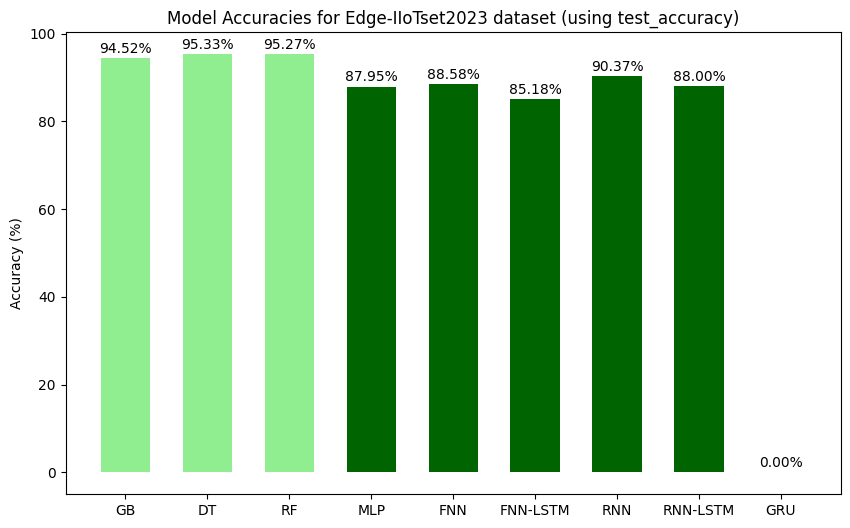

In [143]:
# Create a bar graph that shows the accuracy of the classifiers

# Show the values that will be used in the graph
print(f"The following accuracy values will be used for visualization:")
print(f"   GB       {accuracy_gb_optimized:.4f}")
print(f"   DT       {accuracy_dt_optimized:.4f}")
print(f"   RF       {accuracy_rf_optimized:.4f}")
print(f"   MLP      {accuracy_mlp_optimized:.4f}")
print(f"   FNN      {accuracy_sequential_optimized:.4f}")
print(f"   LSTM     {accuracy_lstm_optimized:.4f}")

labels = ["GB", "DT", "RF", "MLP", "FNN", "FNN-LSTM", "RNN", "RNN-LSTM", "GRU"]
#values = [accuracy_gb_optimized*100, accuracy_dt_optimized*100, accuracy_rf_optimized*100, accuracy_mlp_optimized*100, accuracy_sequential_optimized*100, accuracy_lstm_optimized*100, accuracy_simplernn_optimized*100, accuracy_simplernn_lstm_optimized*100, accuracy_gru_optimized*100]
values = [accuracy_gb_optimized*100, accuracy_dt_optimized*100, accuracy_rf_optimized*100, test_accuracy_mlp_optimized*100, test_accuracy_sequential_optimized*100, test_accuracy_lstm_optimized*100, test_accuracy_simplernn_optimized*100, test_accuracy_simplernn_lstm_optimized*100,test_accuracy_gru_optimized*100]


# Increase the width of the graph
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

# Increase spacing between bars
bar_width = 0.6  # Adjust the width as needed
bar_positions = range(len(labels))

# Create a bar graph
#bars = plt.bar(bar_positions, values, width=bar_width, color='blue')
bars = plt.bar(bar_positions, values, width=bar_width, color=['lightgreen']*3 + ['darkgreen']*6)  # Last 6 bars are darkgreen

# Dynamically set y-axis limits
plt.ylim(min(values*100) - 5, max(values) + 5)

# Add labels and title
plt.xlabel('')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies for Edge-IIoTset2023 dataset (using test_accuracy)')

# Set x-axis ticks and labels
plt.xticks(bar_positions, labels)

# Annotate each bar with its respective value
# Adjust bar.get_height() + ?? to adjust spacing between bar and label above bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{value:.2f}%', ha='center', va='bottom')

# Save the figure with 600dpi resolution to allow a high-quality image to be imported to a manuscript
plt.savefig('model_accuracies.png', dpi=600)

# Display the bar graph
plt.show()

The following accuracy values will be used for visualization:
   GB       0.9452
   DT       0.9533
   RF       0.9527
   MLP      0.8795
   FNN      0.8795
   LSTM     0.8795


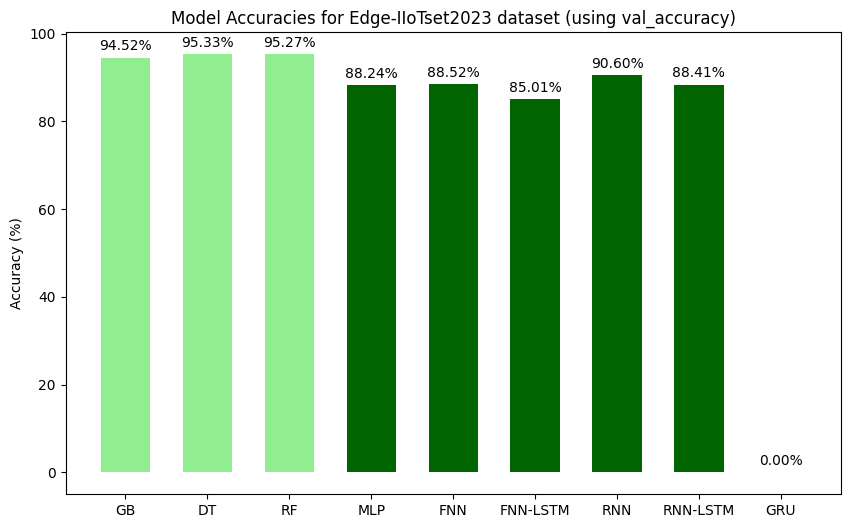

In [144]:
# Create a bar graph that shows the accuracy of the base classifiers and NN classifiers

# Show the values that will be used in the graph
print(f"The following accuracy values will be used for visualization:")
print(f"   GB       {accuracy_gb_optimized:.4f}")
print(f"   DT       {accuracy_dt_optimized:.4f}")
print(f"   RF       {accuracy_rf_optimized:.4f}")
print(f"   MLP      {accuracy_mlp_optimized:.4f}")
print(f"   FNN      {accuracy_sequential_optimized:.4f}")
print(f"   LSTM     {accuracy_lstm_optimized:.4f}")

labels = ["GB", "DT", "RF", "MLP", "FNN", "FNN-LSTM", "RNN", "RNN-LSTM", "GRU"]
#values = [accuracy_gb_optimized*100, accuracy_dt_optimized*100, accuracy_rf_optimized*100, accuracy_mlp_optimized*100, accuracy_sequential_optimized*100, accuracy_lstm_optimized*100, accuracy_simplernn_optimized*100, accuracy_simplernn_lstm_optimized*100, accuracy_gru_optimized*100]
values = [accuracy_gb_optimized*100, accuracy_dt_optimized*100, accuracy_rf_optimized*100, val_accuracy_mlp_optimized*100, val_accuracy_sequential_optimized*100, val_accuracy_lstm_optimized*100, val_accuracy_simplernn_optimized*100, val_accuracy_simplernn_lstm_optimized*100, val_accuracy_gru_optimized*100]


# Increase the width of the graph
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

# Increase spacing between bars
bar_width = 0.6  # Adjust the width as needed
bar_positions = range(len(labels))

# Create a bar graph
#bars = plt.bar(bar_positions, values, width=bar_width, color='blue')
bars = plt.bar(bar_positions, values, width=bar_width, color=['lightgreen']*3 + ['darkgreen']*6)  # Last 6 bars are darkgreen

# Dynamically set y-axis limits
plt.ylim(min(values*100) - 5, max(values) + 5)

# Add labels and title
plt.xlabel('')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies for Edge-IIoTset2023 dataset (using val_accuracy)')

# Set x-axis ticks and labels
plt.xticks(bar_positions, labels)

# Annotate each bar with its respective value
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{value:.2f}%', ha='center', va='bottom')

# Save the figure with 600dpi resolution to allow a high-quality image to be imported to a manuscript
plt.savefig('model_accuracies.png', dpi=600)

# Display the bar graph
plt.show()

The following accuracy values will be used for visualization:
   GB       0.9452
   DT       0.9533
   RF       0.9527
   MLP      0.8795
   FNN      0.8795
   LSTM     0.8795


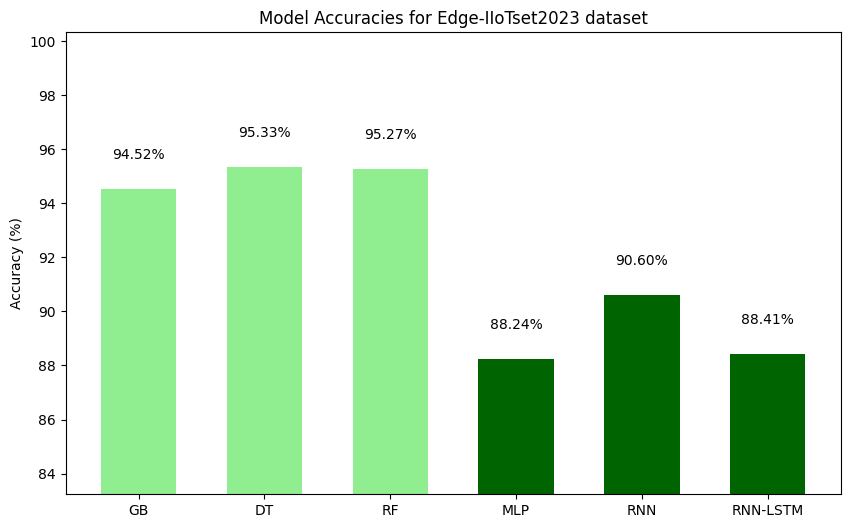

In [145]:
# Create a bar graph that shows the accuracy of the base classifiers and NN classifiers

# Show the values that will be used in the graph
print(f"The following accuracy values will be used for visualization:")
print(f"   GB       {accuracy_gb_optimized:.4f}")
print(f"   DT       {accuracy_dt_optimized:.4f}")
print(f"   RF       {accuracy_rf_optimized:.4f}")
print(f"   MLP      {accuracy_mlp_optimized:.4f}")
print(f"   FNN      {accuracy_sequential_optimized:.4f}")
print(f"   LSTM     {accuracy_lstm_optimized:.4f}")

labels = ["GB", "DT", "RF", "MLP", "RNN", "RNN-LSTM"]
#values = [accuracy_gb_optimized*100, accuracy_dt_optimized*100, accuracy_rf_optimized*100, accuracy_mlp_optimized*100, accuracy_sequential_optimized*100, accuracy_lstm_optimized*100, accuracy_simplernn_optimized*100, accuracy_simplernn_lstm_optimized*100, accuracy_gru_optimized*100]
values = [accuracy_gb_optimized*100, accuracy_dt_optimized*100, accuracy_rf_optimized*100, val_accuracy_mlp_optimized*100, val_accuracy_simplernn_optimized*100, val_accuracy_simplernn_lstm_optimized*100]


# Increase the width of the graph
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

# Increase spacing between bars
bar_width = 0.6  # Adjust the width as needed
bar_positions = range(len(labels))

# Create a bar graph
#bars = plt.bar(bar_positions, values, width=bar_width, color='blue')
bars = plt.bar(bar_positions, values, width=bar_width, color=['lightgreen']*3 + ['darkgreen']*3)  # Last 3 bars are darkgreen

# Dynamically set y-axis limits
plt.ylim(min(values*100) - 5, max(values) + 5)

# Add labels and title
plt.xlabel('')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies for Edge-IIoTset2023 dataset')

# Set x-axis ticks and labels
plt.xticks(bar_positions, labels)

# Annotate each bar with its respective value
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{value:.2f}%', ha='center', va='bottom')

# Save the figure with 600dpi resolution to allow a high-quality image to be imported to a manuscript
plt.savefig('model_accuracies.png', dpi=600)

# Display the bar graph
plt.show()

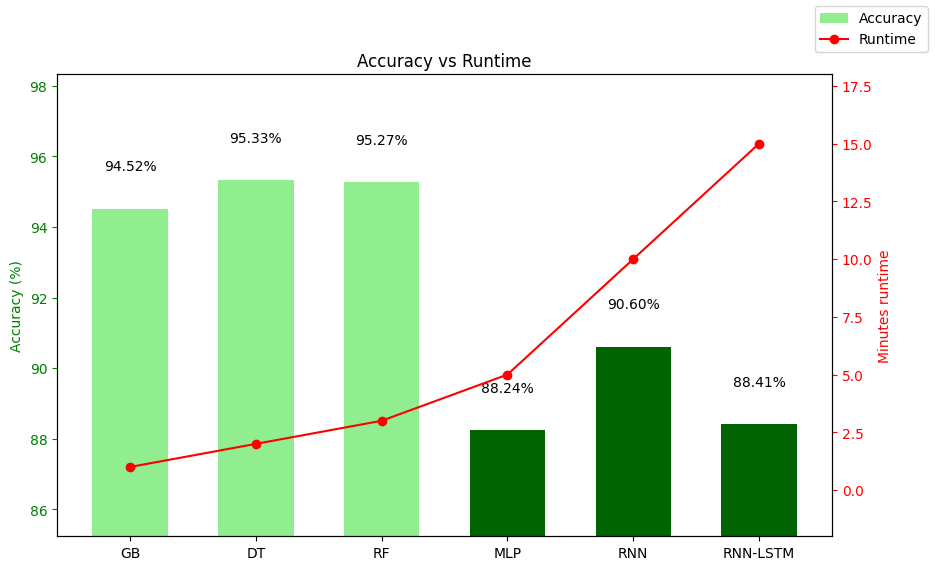

In [146]:
# create a graph that shows model accuracy vs runtime
# this gives us an idea of the tradeoff between speed and accuracy

# dummy values for runtime to be fixed up
gb_runtime = 1
dt_runtime = 2
rf_runtime = 3
mlp_runtime = 5
simplernn_runtime = 10
simplernn_lstm_runtime = 15

labels = ["GB", "DT", "RF", "MLP", "RNN", "RNN-LSTM"]
values_bar  = [accuracy_gb_optimized*100, accuracy_dt_optimized*100, accuracy_rf_optimized*100, val_accuracy_mlp_optimized*100, val_accuracy_simplernn_optimized*100, val_accuracy_simplernn_lstm_optimized*100]
values_line = [gb_runtime, dt_runtime, rf_runtime, mlp_runtime, simplernn_runtime, simplernn_lstm_runtime]


fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

# Increase spacing between bars
bar_width = 0.6  # Adjust the width as needed
bar_positions = range(len(labels))

# Create a bar chart
# Adjust the width and align parameters for bar width and spacing
ax1.bar(labels, values_bar, label='Accuracy', width=bar_width, align='center', color=['lightgreen']*3 + ['darkgreen']*3)  # Last 3 bars are darkgreen

# Dynamically set y-axis limits
ax1.set_ylim(min(values_bar) - 2, max(values_bar) + 2)

# Set label and ticks for the left vertical axis
ax1.set_ylabel('Accuracy (%)', color='g')
ax1.tick_params('y', colors='g')

# Dynamically set y-axis limits
ax1.set_ylim(min(values_bar) - 3, max(values_bar) + 3)

# Annotate each bar with its respective value
for bar, value in zip(bars, values_bar):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{value:.2f}%', ha='center', va='bottom')


# Line graph
ax2 = ax1.twinx()
ax2.plot(labels, values_line, color='r', marker='o', label='Runtime')

# Set label and ticks for the right vertical axis
ax2.set_ylabel('Minutes runtime', color='r')
ax2.tick_params('y', colors='r')

# Dynamically set y-axis limits
ax2.set_ylim(min(values_line) - 3, max(values_line) + 3)

# Title
plt.title('Accuracy vs Runtime')

# Show legend
fig.legend(loc='upper right')

plt.show()


The following Mean and Standard Deviation values will be used for visualization:
   GB       0.9406               0.0104
   DT       0.9472               0.0068
   RF       0.9466               0.0087
   MLP      0.8504              0.0133
   RNN      0.8504        0.0133
   RNN-LSTM 0.8504   0.0133


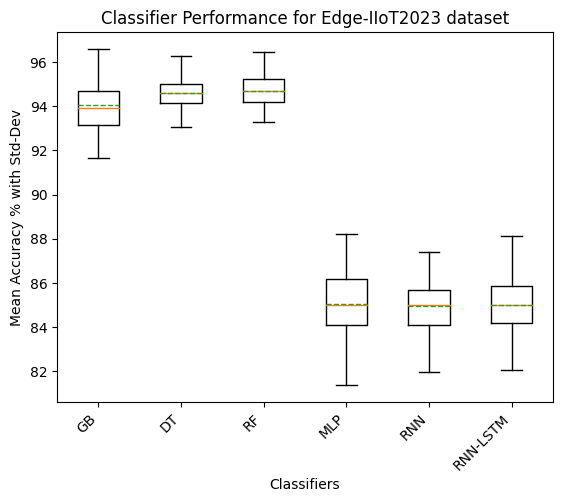

<Figure size 640x480 with 0 Axes>

In [147]:
# NOTE: these box plots use the cross validation scores,
# but perhaps the MLP/RNN/RNN-LSTM models should use their validation accuracy scores instead?
# Make some tweaks in the next cell

# This code generates a box plot with the given mean and standard deviation values for each classifier.
# The showmeans=True option ensures that the means are displayed as red dots, and sym='' removes the outliers for a cleaner representation.
# Adjust the code as needed for your specific requirements.

# Show the values that will be used in the graph
print(f"The following Mean and Standard Deviation values will be used for visualization:")
print(f"   GB       {gb_crossval_score_mean:.4f}               {gb_crossval_score_std:.4f}")
print(f"   DT       {dt_crossval_score_mean:.4f}               {dt_crossval_score_std:.4f}")
print(f"   RF       {rf_crossval_score_mean:.4f}               {rf_crossval_score_std:.4f}")
print(f"   MLP      {mlp_crossval_score_mean:.4f}              {mlp_crossval_score_std:.4f}")
print(f"   RNN      {simplernn_crossval_score_mean:.4f}        {simplernn_crossval_score_std:.4f}")
print(f"   RNN-LSTM {simplernn_lstm_crossval_score_mean:.4f}   {simplernn_lstm_crossval_score_std:.4f}")

# Prepare the data
labels   = ["GB", "DT", "RF", "MLP", "RNN", "RNN-LSTM"]
means    = [gb_crossval_score_mean*100, dt_crossval_score_mean*100, rf_crossval_score_mean*100, mlp_crossval_score_mean*100, simplernn_crossval_score_mean*100, simplernn_lstm_crossval_score_mean*100]
std_devs = [gb_crossval_score_std*100,  dt_crossval_score_std*100,  rf_crossval_score_std*100,  mlp_crossval_score_std*100,  simplernn_crossval_score_std*100,  simplernn_lstm_crossval_score_std*100]

# Create the box plot
fig, ax = plt.subplots()

# Plot the box plots
box_data = [np.random.normal(mean, std, 100) for mean, std in zip(means, std_devs)]
ax.boxplot(box_data, labels=labels, showmeans=True, meanline=True, sym='')

# Rotate the x-axis labels by 45 degrees to make them fit
plt.xticks(rotation=45, ha='right')

# Set labels and title
ax.set_xlabel('Classifiers')
ax.set_ylabel('Mean Accuracy % with Std-Dev')
ax.set_title('Classifier Performance for Edge-IIoT2023 dataset')

# Show the plot
plt.show()

# Save the figure with 600dpi resolution to allow a high-quality image to be imported to a manuscript
plt.savefig('model_performance_boxplots.png', dpi=600)


The following Mean and Standard Deviation values will be used for visualization:
   GB       0.9406               0.0104
   DT       0.9472               0.0068
   RF       0.9466               0.0087
   MLP      0.8824            0.0133
   RNN      0.9060      0.0133
   RNN-LSTM 0.8841 0.0133


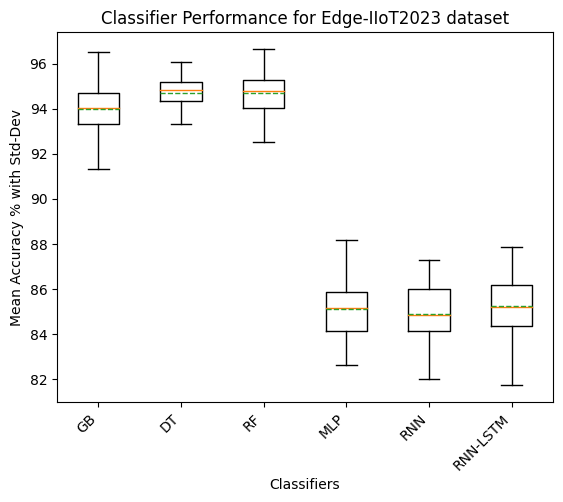

<Figure size 640x480 with 0 Axes>

In [148]:
# NOTE: these box plots use the cross validation scores,
# but perhaps the MLP/RNN/RNN-LSTM models should use their validation accuracy scores instead?
# This cell tweaks the values from the previous cell, see the commented out lines below

# This code generates a box plot with the given mean and standard deviation values for each classifier.
# The showmeans=True option ensures that the means are displayed as red dots, and sym='' removes the outliers for a cleaner representation.
# Adjust the code as needed for your specific requirements.

# Show the values that will be used in the graph
print(f"The following Mean and Standard Deviation values will be used for visualization:")
print(f"   GB       {gb_crossval_score_mean:.4f}               {gb_crossval_score_std:.4f}")
print(f"   DT       {dt_crossval_score_mean:.4f}               {dt_crossval_score_std:.4f}")
print(f"   RF       {rf_crossval_score_mean:.4f}               {rf_crossval_score_std:.4f}")
#print(f"   MLP      {mlp_crossval_score_mean:.4f}              {mlp_crossval_score_std:.4f}")
#print(f"   RNN      {simplernn_crossval_score_mean:.4f}        {simplernn_crossval_score_std:.4f}")
#print(f"   RNN-LSTM {simplernn_lstm_crossval_score_mean:.4f}   {simplernn_lstm_crossval_score_std:.4f}")
print(f"   MLP      {val_accuracy_mlp_optimized:.4f}            {mlp_crossval_score_std:.4f}")
print(f"   RNN      {val_accuracy_simplernn_optimized:.4f}      {simplernn_crossval_score_std:.4f}")
print(f"   RNN-LSTM {val_accuracy_simplernn_lstm_optimized:.4f} {simplernn_lstm_crossval_score_std:.4f}")



# Prepare the data
labels   = ["GB", "DT", "RF", "MLP", "RNN", "RNN-LSTM"]
means    = [gb_crossval_score_mean*100, dt_crossval_score_mean*100, rf_crossval_score_mean*100, mlp_crossval_score_mean*100, simplernn_crossval_score_mean*100, simplernn_lstm_crossval_score_mean*100]
#std_devs = [gb_crossval_score_std*100,  dt_crossval_score_std*100,  rf_crossval_score_std*100,  mlp_crossval_score_std*100,  simplernn_crossval_score_std*100,  simplernn_lstm_crossval_score_std*100]
std_devs = [gb_crossval_score_std*100,  dt_crossval_score_std*100,  rf_crossval_score_std*100,  val_accuracy_mlp_optimized*100,  val_accuracy_simplernn_optimized*100,  val_accuracy_simplernn_lstm_optimized*100]

# Create the box plot
fig, ax = plt.subplots()

# Plot the box plots
box_data = [np.random.normal(mean, std, 100) for mean, std in zip(means, std_devs)]
ax.boxplot(box_data, labels=labels, showmeans=True, meanline=True, sym='')

# Rotate the x-axis labels by 45 degrees to make them fit
plt.xticks(rotation=45, ha='right')

# Set labels and title
ax.set_xlabel('Classifiers')
ax.set_ylabel('Mean Accuracy % with Std-Dev')
ax.set_title('Classifier Performance for Edge-IIoT2023 dataset')

# Show the plot
plt.show()

# Save the figure with 600dpi resolution to allow a high-quality image to be imported to a manuscript
plt.savefig('model_performance_boxplots.png', dpi=600)


In [149]:
# create table showing model performance

from tabulate import tabulate
# Define headers for the table
headers = ["Metric", "GB", "DT", "RF", "MLP", "RNN", "RNN-LSTM"]
# Define data for the trable
data = [
    ["Accuracy",    accuracy_gb_optimized,      accuracy_dt_optimized,      accuracy_rf_optimized,      accuracy_mlp_optimized,      accuracy_simplernn_optimized,      accuracy_simplernn_lstm_optimized],
    ["Sensitivity", sensitivity_gb_optimized,   sensitivity_dt_optimized,   sensitivity_rf_optimized,   sensitivity_mlp_optimized,   sensitivity_simplernn_optimized,   sensitivity_simplernn_lstm_optimized],
    ["Specificity", specificity_gb_optimized,   specificity_dt_optimized,   specificity_rf_optimized,   specificity_mlp_optimized,   specificity_simplernn_optimized,   specificity_simplernn_lstm_optimized],
    ["GeoMean",     geometricmean_gb_optimized, geometricmean_dt_optimized, geometricmean_rf_optimized, geometricmean_mlp_optimized, geometricmean_simplernn_optimized, geometricmean_simplernn_lstm_optimized],
    ["Precision",   precision_gb_optimized,     precision_dt_optimized,     precision_rf_optimized,     precision_mlp_optimized,     precision_simplernn_optimized,     precision_simplernn_lstm_optimized],
    ["Recall",      recall_gb_optimized,        recall_dt_optimized,        recall_rf_optimized,        recall_mlp_optimized,        recall_simplernn_optimized,        recall_simplernn_lstm_optimized],
    ["F1-score",    f1_gb_optimized,            f1_dt_optimized,            f1_rf_optimized,            f1_mlp_optimized,            f1_simplernn_optimized,            f1_simplernn_lstm_optimized]
]

# Round all floats in the data list to 4 decimal places
data_rounded = [[elem if isinstance(elem, str) else round(elem, 4) for elem in row] for row in data]

# Generate the table
table = tabulate(data_rounded, headers=headers, tablefmt="fancy_grid")

# Print the table
print(table)


╒═════════════╤════════╤════════╤════════╤════════╤════════╤════════════╕
│ Metric      │     GB │     DT │     RF │    MLP │    RNN │   RNN-LSTM │
╞═════════════╪════════╪════════╪════════╪════════╪════════╪════════════╡
│ Accuracy    │ 0.9452 │ 0.9533 │ 0.9527 │ 0.8795 │ 0.8795 │     0.8795 │
├─────────────┼────────┼────────┼────────┼────────┼────────┼────────────┤
│ Sensitivity │ 0.946  │ 0.9546 │ 0.9395 │ 0.7559 │ 0.7559 │     0.7559 │
├─────────────┼────────┼────────┼────────┼────────┼────────┼────────────┤
│ Specificity │ 0.9449 │ 0.9528 │ 0.9575 │ 0.9245 │ 0.9245 │     0.9245 │
├─────────────┼────────┼────────┼────────┼────────┼────────┼────────────┤
│ GeoMean     │ 0.9455 │ 0.9537 │ 0.9485 │ 0.836  │ 0.836  │     0.836  │
├─────────────┼────────┼────────┼────────┼────────┼────────┼────────────┤
│ Precision   │ 0.9483 │ 0.9556 │ 0.954  │ 0.8782 │ 0.8782 │     0.8782 │
├─────────────┼────────┼────────┼────────┼────────┼────────┼────────────┤
│ Recall      │ 0.9452 │ 0.9533 │ 0.95

In [150]:
# create table showing cross-fold validation scores

from tabulate import tabulate
# Define headers for the table
headers = ["Fold", "GB", "DT", "RF", "MLP", "RNN", "RNN-LSTM"]
# Define data for the trable
data = [
    ["1",      gb_crossval_score_all[0], dt_crossval_score_all[0], rf_crossval_score_all[0], mlp_crossval_score_all[0], simplernn_crossval_score_all[0], simplernn_lstm_crossval_score_all[0] ],
    ["2",      gb_crossval_score_all[1], dt_crossval_score_all[1], rf_crossval_score_all[1], mlp_crossval_score_all[1], simplernn_crossval_score_all[1], simplernn_lstm_crossval_score_all[1] ],
    ["3",      gb_crossval_score_all[2], dt_crossval_score_all[2], rf_crossval_score_all[2], mlp_crossval_score_all[2], simplernn_crossval_score_all[2], simplernn_lstm_crossval_score_all[2] ],
    ["4",      gb_crossval_score_all[3], dt_crossval_score_all[3], rf_crossval_score_all[3], mlp_crossval_score_all[3], simplernn_crossval_score_all[3], simplernn_lstm_crossval_score_all[3] ],
    ["5",      gb_crossval_score_all[4], dt_crossval_score_all[4], rf_crossval_score_all[4], mlp_crossval_score_all[4], simplernn_crossval_score_all[4], simplernn_lstm_crossval_score_all[4] ],
    ["6",      gb_crossval_score_all[5], dt_crossval_score_all[5], rf_crossval_score_all[5], mlp_crossval_score_all[5], simplernn_crossval_score_all[5], simplernn_lstm_crossval_score_all[5] ],
    ["7",      gb_crossval_score_all[6], dt_crossval_score_all[6], rf_crossval_score_all[6], mlp_crossval_score_all[6], simplernn_crossval_score_all[6], simplernn_lstm_crossval_score_all[6] ],
    ["8",      gb_crossval_score_all[7], dt_crossval_score_all[7], rf_crossval_score_all[7], mlp_crossval_score_all[7], simplernn_crossval_score_all[7], simplernn_lstm_crossval_score_all[7] ],
    ["9",      gb_crossval_score_all[8], dt_crossval_score_all[8], rf_crossval_score_all[8], mlp_crossval_score_all[8], simplernn_crossval_score_all[8], simplernn_lstm_crossval_score_all[8] ],
    ["10",     gb_crossval_score_all[9], dt_crossval_score_all[9], rf_crossval_score_all[9], mlp_crossval_score_all[9], simplernn_crossval_score_all[9], simplernn_lstm_crossval_score_all[9] ],
    ["Mean",   gb_crossval_score_mean,   dt_crossval_score_mean,   rf_crossval_score_mean,   mlp_crossval_score_mean,   simplernn_crossval_score_mean,   simplernn_lstm_crossval_score_mean   ],
    ["StdDev", gb_crossval_score_std,    dt_crossval_score_std,    rf_crossval_score_std,    mlp_crossval_score_std,    simplernn_crossval_score_std,    simplernn_lstm_crossval_score_std    ]
]

# Round all floats in the data list to 4 decimal places
data_rounded = [[elem if isinstance(elem, str) else round(elem, 4) for elem in row] for row in data]

# Generate the table
table = tabulate(data_rounded, headers=headers, tablefmt="fancy_grid")

# Print the table
print(table)


╒════════╤════════╤════════╤════════╤════════╤════════╤════════════╕
│ Fold   │     GB │     DT │     RF │    MLP │    RNN │   RNN-LSTM │
╞════════╪════════╪════════╪════════╪════════╪════════╪════════════╡
│ 1      │ 0.9367 │ 0.9499 │ 0.9499 │ 0.8364 │ 0.8364 │     0.8364 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────────┤
│ 2      │ 0.9459 │ 0.9512 │ 0.9551 │ 0.8628 │ 0.8628 │     0.8628 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────────┤
│ 3      │ 0.9538 │ 0.9564 │ 0.9564 │ 0.8732 │ 0.8732 │     0.8732 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────────┤
│ 4      │ 0.9538 │ 0.9551 │ 0.959  │ 0.8494 │ 0.8494 │     0.8494 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────────┤
│ 5      │ 0.9538 │ 0.9498 │ 0.9485 │ 0.8534 │ 0.8534 │     0.8534 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────────┤
│ 6      │ 0.93   │ 0.9406 │ 0.9366 │ 0.8349 │ 0.8349 │     0.8349 │
├────────┼────────┼────────┼──────

In [151]:
# show a running total of elapsed time for the entire notebook
show_elapsed_time()

Current Time: 2024-05-10 14:33:41
The entire notebook runtime so far is 21 minutes
